<a href="https://colab.research.google.com/github/HaikalFrds/New-Project-1-SynergyTeam/blob/main/New_Project_1_SynergyTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; max-width: 700px; margin: auto; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">

# <b><span style='color:#E1B12D'>FlipWise: Property Identification System for Flip Opportunities</span></b>  
## Project 1 — Synergy Team  
### House Pricing Prediction — Real Estate Industry

---

<span style="color:#27AE60; font-size: 1.2em;"><b>Data Task</b></span>  
Haikal Firdaus  
Adhi Kurniawan  
  
<br>

<span style="color:#2980B9; font-size: 1.2em;"><b>Modeling Task</b></span>  
I Putu Ferry Wistika  
Lukas Yuliyanto Gunawan  
Muhammad Egalingga Zainuri

</div>


Industri real estate di Indonesia berkembang pesat, namun para investor masih menghadapi tantangan dalam mengidentifikasi properti dengan potensi peningkatan nilai yang optimal. Meskipun data pasar tersedia, pendekatan tradisional dalam valuasi sering kali tidak cukup efisien untuk mengungkap peluang investasi terbaik.

Perusahaan menyadari bahwa pendekatan tradisional dalam valuasi properti tidaklah cukup efisien. Para investor kesulitan memastikan properti mana yang benar-benar memiliki spesifikasi dengan potensi peningkatan nilai optimal.

Kami memutuskan mengadopsi solusi berbasis machine learning. Dengan menganalisis data historis properti, karakteristik fisik, dan faktor lokasi, kami yakin dapat mengembangkan model untuk memprediksi harga properti dan mengidentifikasi peluang flip terbaik.

Objective: Meningkatkan efisiensi investasi properti dengan memprediksi potensi peningkatan nilai rumah menggunakan model machine learning.




# <span style="font-size:1.6em; color:#E1B12D;"><b>Data Extraction</b></span>

The dataset used in this project is the **Ames Housing Dataset**, which contains detailed information on home sales in **Ames, Iowa** from 2006 to 2010. This dataset includes:

- 🗂️ `train.csv` — training data that includes property information **along with sale prices**  
- 🗂️ `test.csv` — testing data that includes **property features only** (target: to be predicted)

---

The dataset provides a wide range of features describing various aspects of residential properties:

- 🏠 **Physical characteristics** — size, number of rooms, construction quality, etc.  
- 📍 **Location-related features** — neighborhood, zoning, etc.  
- 🛠️ **Additional details** — garage, basement, exterior features, etc.  
- 📆 **Sales information** — year sold, sale condition, and more


In [ ]:
descriptive_names = {
        'OverallQual': 'Kualitas Material dan Finishing Rumah',
        'OverallCond': 'Kondisi Umum Rumah',
        'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
        'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
        'GarageArea': 'Luas Garasi (sq.ft)',
        'YearBuilt': 'Tahun Pembangunan Rumah',
        'YearRemodAdd': 'Tahun Renovasi Terakhir',
        'SalePrice': 'Harga Jual (USD)',
        '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
        '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
        'LotArea': 'Luas Lahan (sq.ft)',
        'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
        'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
        'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
        'Fireplaces': 'Jumlah Perapian',
        'GarageCars': 'Kapasitas Garasi (Mobil)',
        'FullBath': 'Jumlah Kamar Mandi Lengkap',
        'HalfBath': 'Jumlah Kamar Mandi Setengah',
        'MoSold': 'Bulan Terjual',
        'YrSold': 'Tahun Terjual',
        'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
        'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    }

## **Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

# Pengaturan display pandas untuk lebih mudah dibaca
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Pengaturan style plot
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (12, 8)

## **Ekstraksi Data**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
print("Dataset Training:")
print(f"Jumlah baris: {train_data.shape[0]}, Jumlah kolom: {train_data.shape[1]}")
train_data.head()

Dataset Training:
Jumlah baris: 1460, Jumlah kolom: 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
print("Dataset Testing:")
print(f"Jumlah baris: {test_data.shape[0]}, Jumlah kolom: {test_data.shape[1]}")
test_data.head()

Dataset Testing:
Jumlah baris: 1459, Jumlah kolom: 80


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## **Mengakses Informasi Umum pada Data**

Sebelum melakukan analisis lebih lanjut, kita perlu memahami karakteristik dasar dataset yang kita miliki. Informasi ini meliputi tipe data, statistik deskriptif, dan identifikasi nilai yang hilang.


In [ ]:
print("Informasi Data Training:")
train_data.info()

Informasi Data Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

In [ ]:
# Statistik deskriptif data training
train_data.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.685     443.640  ...      94.245   
std       30.203        20.645     181.066     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [ ]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

print(f"Jumlah kolom numerik: {len(numeric_cols)}")
print(f"Jumlah kolom kategorikal: {len(categorical_cols)}")

# Lihat beberapa kolom dari masing-masing tipe
print("\nBeberapa kolom numerik:")
print(numeric_cols[:10])
print("\nBeberapa kolom kategorikal:")
print(categorical_cols[:10])


# Dictionary untuk nama deskriptif fitur
descriptive_names = {
    'OverallQual': 'Kualitas Material dan Finishing Rumah',
    'OverallCond': 'Kondisi Umum Rumah',
    'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
    'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
    'GarageArea': 'Luas Garasi (sq.ft)',
    'YearBuilt': 'Tahun Pembangunan Rumah',
    'YearRemodAdd': 'Tahun Renovasi Terakhir',
    'SalePrice': 'Harga Jual (USD)',
    '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
    '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
    'LotArea': 'Luas Lahan (sq.ft)',
    'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
    'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
    'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
    'Fireplaces': 'Jumlah Perapian',
    'GarageCars': 'Kapasitas Garasi (Mobil)',
    'FullBath': 'Jumlah Kamar Mandi Lengkap',
    'HalfBath': 'Jumlah Kamar Mandi Setengah',
    'MoSold': 'Bulan Terjual',
    'YrSold': 'Tahun Terjual',
    'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
    'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    'MSZoning': 'Klasifikasi Zoning',
    'Street': 'Tipe Jalan',
    'Alley': 'Tipe Gang',
    'LotShape': 'Bentuk Lahan',
    'LandContour': 'Kontur Lahan',
    'Utilities': 'Utilitas yang Tersedia',
    'LotConfig': 'Konfigurasi Lahan',
    'LandSlope': 'Kemiringan Lahan',
    'Neighborhood': 'Lingkungan Tempat Tinggal',
    'Condition1': 'Kedekatan dengan Kondisi Utama',
    'Condition2': 'Kedekatan dengan Kondisi Sekunder',
    'BldgType': 'Tipe Bangunan',
    'HouseStyle': 'Gaya Rumah',
    'RoofStyle': 'Gaya Atap',
    'RoofMatl': 'Material Atap',
    'Exterior1st': 'Material Eksterior Utama',
    'Exterior2nd': 'Material Eksterior Sekunder',
    'MasVnrType': 'Tipe Veneer Batu',
    'ExterQual': 'Kualitas Material Eksterior',
    'ExterCond': 'Kondisi Eksterior',
    'Foundation': 'Tipe Pondasi',
    'BsmtQual': 'Kualitas Basement',
    'BsmtCond': 'Kondisi Basement',
    'BsmtExposure': 'Eksposur Basement',
    'BsmtFinType1': 'Tipe Finishing Basement Utama',
    'BsmtFinType2': 'Tipe Finishing Basement Sekunder',
    'Heating': 'Tipe Pemanas',
    'HeatingQC': 'Kualitas dan Kondisi Pemanas',
    'CentralAir': 'Pendingin Udara Sentral',
    'Electrical': 'Sistem Kelistrikan',
    'KitchenQual': 'Kualitas Dapur',
    'Functional': 'Fungsionalitas Rumah',
    'FireplaceQu': 'Kualitas Perapian',
    'GarageType': 'Tipe Garasi',
    'GarageFinish': 'Finishing Interior Garasi',
    'GarageQual': 'Kualitas Garasi',
    'GarageCond': 'Kondisi Garasi',
    'PavedDrive': 'Jalan Masuk Beraspal',
    'PoolQC': 'Kualitas Kolam Renang',
    'Fence': 'Kualitas Pagar',
    'MiscFeature': 'Fitur Lainnya',
    'SaleType': 'Tipe Penjualan',
    'SaleCondition': 'Kondisi Penjualan'
}

Jumlah kolom numerik: 38
Jumlah kolom kategorikal: 43

Beberapa kolom numerik:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']

Beberapa kolom kategorikal:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']


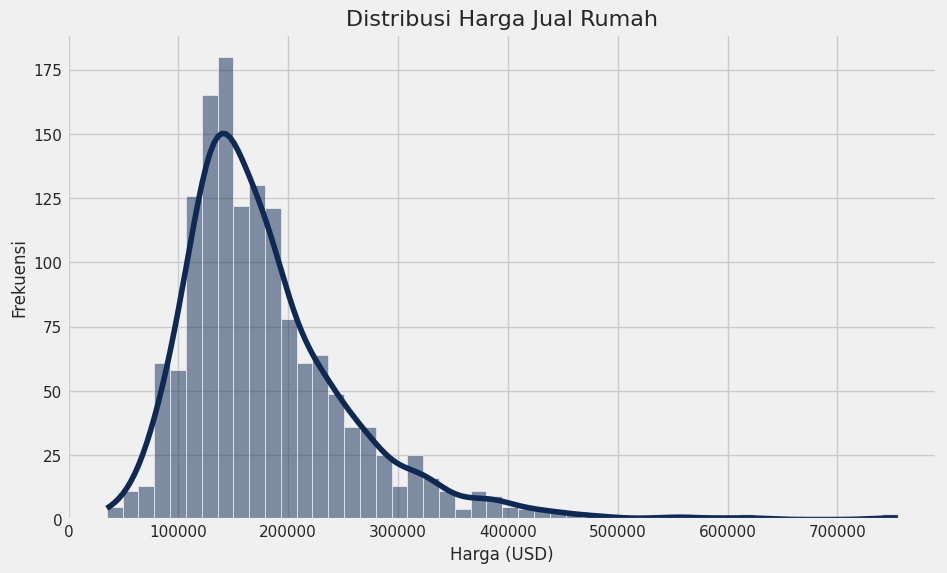

In [ ]:
# Melihat distribusi variabel target (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=50, color='#0E2954')
plt.title('Distribusi Harga Jual Rumah', fontsize=16)
plt.xlabel('Harga (USD)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

# **Transformasi Data**

**Berdasarkan informasi umum yang telah kita peroleh, kita perlu melakukan beberapa transformasi pada data:**
* Mengecek dan menangani missing values
* Mengubah beberapa tipe data yang tidak sesuai
* Menangani outliers jika diperlukan

## **Pengecekan Missing Values**

In [ ]:
# Cek missing values pada data training
missing_train = train_data.isnull().sum()
print("Jumlah Missing Values pada Data Training:")
print(missing_train[missing_train > 0].sort_values(ascending=False))


Jumlah Missing Values pada Data Training:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


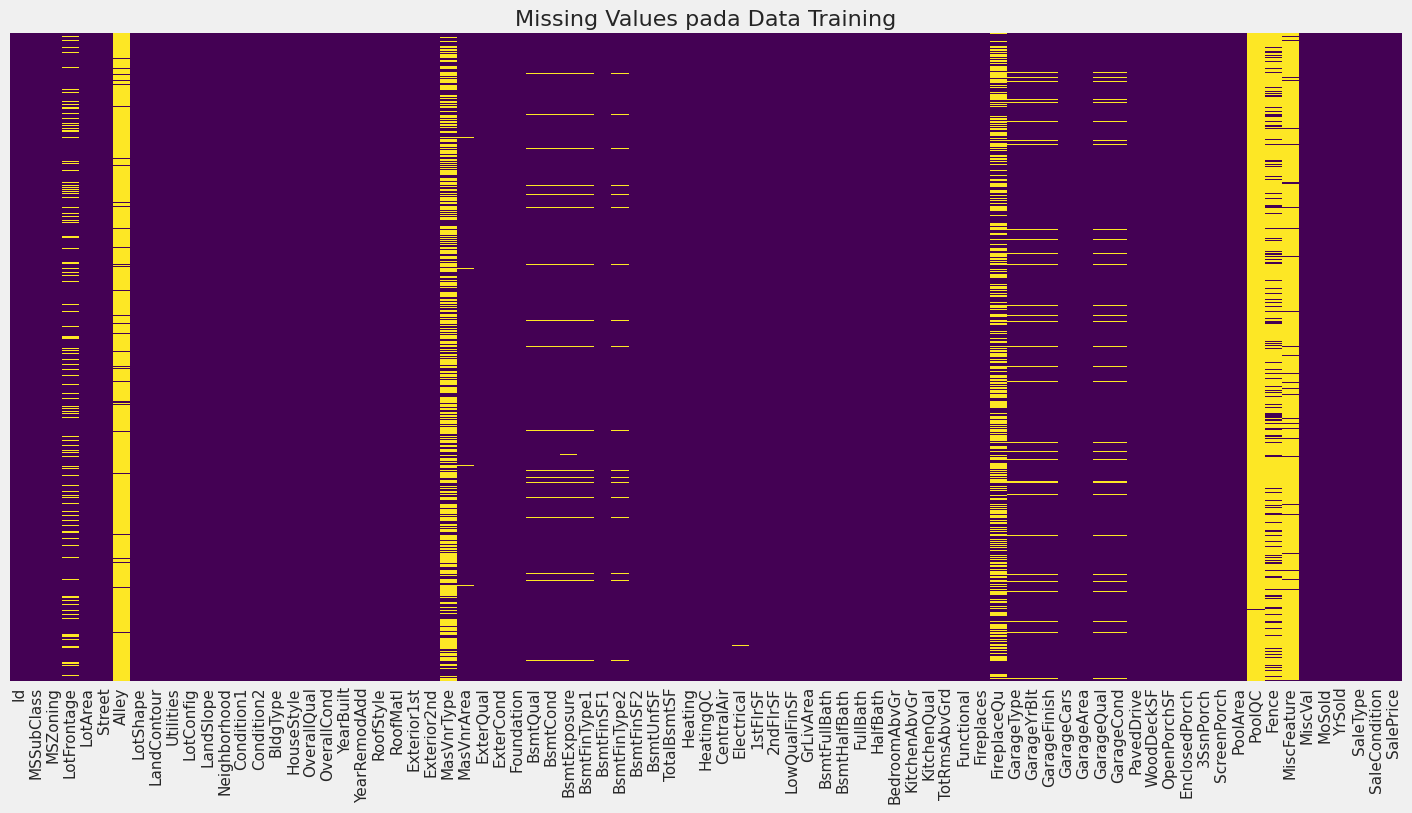

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Missing Values pada Data Training', fontsize=16)
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## **Handling Missing Values**

Beberapa kolom memiliki nilai missing yang cukup banyak. Kita perlu menentukan strategi untuk menangani missing values tersebut:

- Untuk kolom seperti 'PoolQC', 'MiscFeature', 'Alley', 'Fence', nilai NA sebenarnya menunjukkan tidak adanya fitur tersebut, bukan data yang hilang.
- Untuk kolom numerik, kita bisa mengisi dengan nilai median atau mean.
- Untuk kolom kategorikal, kita bisa mengisi dengan modus atau kategori yang sesuai.


In [ ]:
# Kita akan menangani missing values untuk kedua dataset (train dan test) sekaligus
# Gabungkan dataset untuk preprocessing (tanpa kolom SalePrice dari training)
train_ID = train_data['Id']
test_ID = test_data['Id']
y_train = train_data['SalePrice']

# Gabungkan data untuk preprocessing
all_data = pd.concat([train_data.drop(['Id', 'SalePrice'], axis=1),
                      test_data.drop(['Id'], axis=1)])


In [ ]:
# Kategorikan kolom-kolom berdasarkan jenis missing values
# Kolom dimana NA berarti "Tidak Ada"
na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           'MasVnrType']

# Isi nilai NA pada kolom-kolom tersebut dengan "None"
for col in na_cols:
    all_data[col].fillna('None', inplace=True)

In [ ]:
# Isi missing values pada kolom numerik yang berhubungan dengan area
# Kebanyakan nilai NA disini berarti 0 (tidak ada)
area_cols = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MasVnrArea']

for col in area_cols:
    all_data[col].fillna(0, inplace=True)

In [ ]:
# Cek missing values yang tersisa
remaining_missing = all_data.isnull().sum()
print("Jumlah Missing Values yang Tersisa:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Jumlah Missing Values yang Tersisa:
LotFrontage    486
MSZoning         4
Utilities        2
Functional       2
Exterior1st      1
Exterior2nd      1
Electrical       1
KitchenQual      1
SaleType         1
dtype: int64


In [ ]:
# Untuk kolom LotFrontage, kita pakai median per neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# MSZoning - isi dengan modus
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities - isi dengan modus
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

# Exterior1st dan Exterior2nd - isi dengan modus
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# KitchenQual - isi dengan modus
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Functional - isi dengan modus
all_data['Functional'] = all_data['Functional'].fillna('Typ')  # Typical functionality

# SaleType - isi dengan modus
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# Electrical - isi dengan modus
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [ ]:
# Cek missing values setelah handling
remaining_missing = all_data.isnull().sum()
print("Jumlah Missing Values Setelah Handling:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Jumlah Missing Values Setelah Handling:
Series([], dtype: int64)


In [ ]:
# Pisahkan kembali menjadi train dan test
n_train = train_data.shape[0]
train_preprocessed = all_data[:n_train]
test_preprocessed = all_data[n_train:]

# Tambahkan kembali kolom Id dan SalePrice
train_preprocessed['Id'] = train_ID.values
train_preprocessed['SalePrice'] = y_train.values
test_preprocessed['Id'] = test_ID.values

# Atur ulang urutan kolom agar Id di depan (opsional)
cols = ['Id'] + [col for col in train_preprocessed.columns if col not in ['Id', 'SalePrice']] + ['SalePrice']
train_preprocessed = train_preprocessed[cols]
test_preprocessed = test_preprocessed[['Id'] + [col for col in test_preprocessed.columns if col != 'Id']]

# Cek hasil akhir
print("Train set shape:", train_preprocessed.shape)
print("Test set shape:", test_preprocessed.shape)


Train set shape: (1460, 81)
Test set shape: (1459, 80)


In [ ]:
# Cek missing values setelah handling
remaining_missing = train_preprocessed.isnull().sum()
print("Jumlah Missing Values Setelah Handling:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Jumlah Missing Values Setelah Handling:
Series([], dtype: int64)


Analysis :

In [ ]:
train_data = train_preprocessed
test_data = test_preprocessed

## **Handling Duplicated Data**

Selanjutnya, kita perlu memeriksa apakah terdapat data duplikat dalam dataset kita. Data duplikat bisa menyebabkan bias dalam model dan analisis kita.

In [ ]:
# Periksa data duplikat pada data training
duplicate_train = train_data.duplicated().sum()
print(f"Jumlah data duplikat pada data training: {duplicate_train}")


Jumlah data duplikat pada data training: 0


## **Deteksi Outliers**

Selanjutnya kita akan memeriksa apakah terdapat outliers dalam data, terutama pada variabel target kita (SalePrice).

In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Fitur-fitur utama untuk deteksi outlier
key_features_outlier = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd']

# Definisikan warna yang digunakan
color = ['#ff6d00', '#ff8500', '#ff9e00', '#240046', '#5a189a', '#9d4edd']

# Dictionary untuk nama fitur yang lebih deskriptif
descriptive_names_outlier = {
    'OverallQual': 'Kualitas Material dan Finishing Rumah',
    'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
    'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
    'GarageArea': 'Luas Garasi (sq.ft)',
    'YearBuilt': 'Tahun Pembangunan Rumah',
    'YearRemodAdd': 'Tahun Renovasi Terakhir'
}

for i in range(len(key_features_outlier)):
    # Create the horizontal box plot
    fig = px.box(
        train_data,
        x=key_features_outlier[i],
        orientation='h',
        color_discrete_sequence=[color[i % len(color)]]
    )

    # Update layout and display the plot
    fig.update_layout(
        title=f'<b>Deteksi Outlier pada {descriptive_names_outlier[key_features_outlier[i]]}</b>',
        yaxis=dict(
            title='',
            showgrid=False,
            showline=False,
            showticklabels=False,
            zeroline=False,
        ),
        xaxis=dict(
            title=descriptive_names_outlier[key_features_outlier[i]],
            showgrid=False,
            showline=True,
            showticklabels=True,
            zeroline=False,
        )
    )

    fig.show()

In [ ]:
# Histogram dengan boxplot untuk SalePrice
import plotly.express as px

fig = px.histogram(
    train_data,
    x='SalePrice',
    marginal='box',
    color_discrete_sequence=['#0E2954'],
    nbins=50
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='white'
)

fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title=dict(
        text="<b>Distribusi <span style='color:#0E2954'>Harga Jual</b>",
        font=dict(
            size=28,
            color='#757882'
        ),
        y=0.92,
        x=0.5
    ),
    yaxis=dict(
        title='',
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    margin=dict(
        t=80,
        b=10,
        r=20
    )
)

fig.show()

In [ ]:
# Deteksi outlier pada GrLivArea
import plotly.express as px

fig = px.histogram(
    train_data,
    x='GrLivArea',
    marginal='box',
    color_discrete_sequence=['#0E2954'],
    nbins=50
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='white'
)

fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title=dict(
        text="<b>Distribusi <span style='color:#0E2954'>Living Area</b>",
        font=dict(
            size=28,
            color='#757882'
        ),
        y=0.92,
        x=0.5
    ),
    yaxis=dict(
        title='',
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    margin=dict(
        t=80,
        b=10,
        r=20
    )
)

fig.show()

## **Handling Outlier**

In [ ]:
# Fungsi untuk mengidentifikasi outlier menggunakan metode IQR (Interquartile Range)
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers, lower_bound, upper_bound

# Fungsi untuk mengidentifikasi outlier menggunakan Z-score
def identify_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    outliers = df[column].iloc[outlier_indices]

    return outliers

# Fungsi untuk menangani outlier
def handle_outliers(df, column, method='cap', detection_method='iqr'):
    df_copy = df.copy()

    if detection_method == 'iqr':
        outliers, lower_bound, upper_bound = identify_outliers_iqr(df_copy, column)
    elif detection_method == 'zscore':
        # Untuk zscore, kita perlu memperkirakan bounds
        mean = df_copy[column].mean()
        std = df_copy[column].std()
        threshold = 3
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        outliers = identify_outliers_zscore(df_copy, column, threshold)

    if method == 'cap':
        # Capping: mengganti outlier dengan nilai batas
        df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    elif method == 'remove':
        # Menghapus baris dengan outlier
        if detection_method == 'iqr':
            df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
        else:
            outlier_indices = outliers.index
            df_copy = df_copy.drop(outlier_indices)
    elif method == 'impute_mean':
        # Mengganti outlier dengan rata-rata
        mean_value = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)][column].mean()
        df_copy.loc[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound), column] = mean_value
    elif method == 'impute_median':
        # Mengganti outlier dengan median
        median_value = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)][column].median()
        df_copy.loc[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound), column] = median_value

    return df_copy

# Fungsi untuk visualisasi outlier dengan boxplot
def visualize_outliers(df, column, title=None):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {descriptive_names.get(column, column)}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {descriptive_names.get(column, column)}')

    if title:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menangani outlier pada semua kolom numerik
def handle_all_numeric_outliers(df, columns, method='cap', detection_method='iqr', visualize=True):
    df_cleaned = df.copy()
    results = {}

    for column in columns:
        # Skip kolom yang tidak ingin diproses (misalnya ID atau timestamp)
        if column in ['Id', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']:
            continue

        # Tampilkan distribusi data sebelum handling outlier
        if visualize:
            visualize_outliers(df_cleaned, column, f'Sebelum handling outlier - {descriptive_names.get(column, column)}')

        # Identifikasi outlier
        if detection_method == 'iqr':
            outliers, _, _ = identify_outliers_iqr(df_cleaned, column)
        else:
            outliers = identify_outliers_zscore(df_cleaned, column)

        # Simpan informasi outlier
        results[column] = {
            'jumlah_outlier': len(outliers),
            'persentase_outlier': len(outliers) / len(df_cleaned) * 100
        }

        # Handle outlier jika ada
        if len(outliers) > 0:
            df_cleaned = handle_outliers(df_cleaned, column, method, detection_method)

            # Tampilkan distribusi data setelah handling outlier
            if visualize:
                visualize_outliers(df_cleaned, column, f'Setelah handling outlier - {descriptive_names.get(column, column)}')

    # Tampilkan hasil identifikasi outlier
    result_df = pd.DataFrame.from_dict(results, orient='index')
    print("Hasil identifikasi outlier:")
    print(result_df.sort_values(by='jumlah_outlier', ascending=False))

    return df_cleaned, result_df

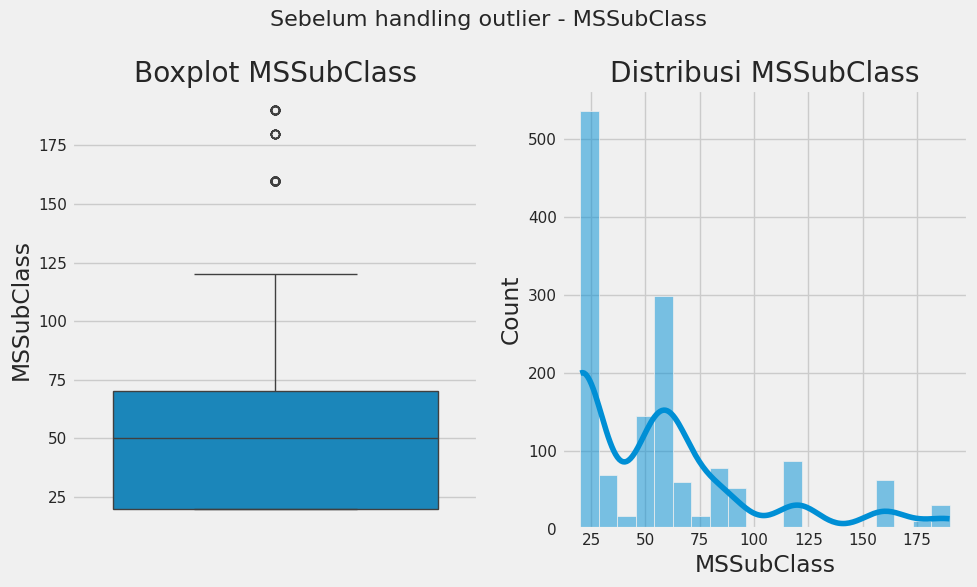

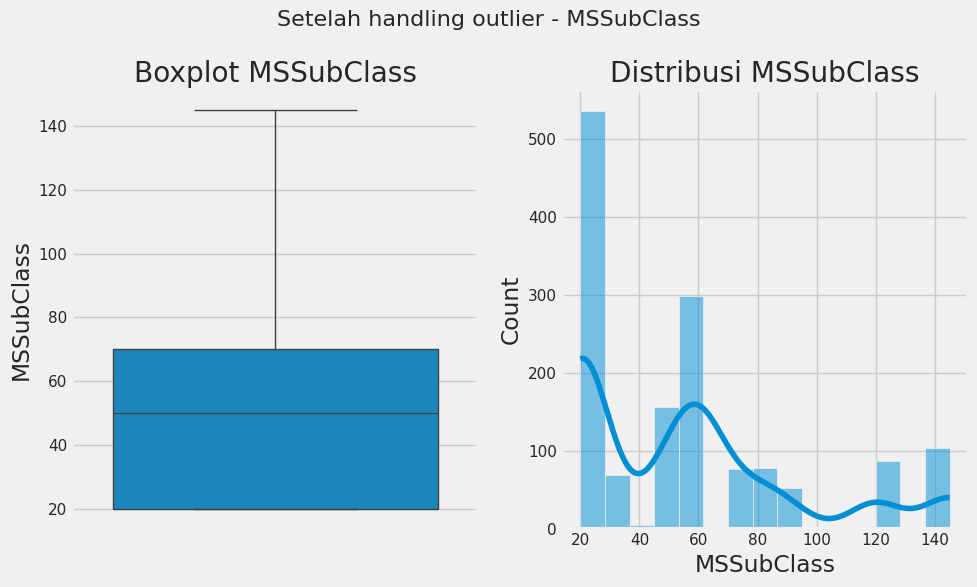

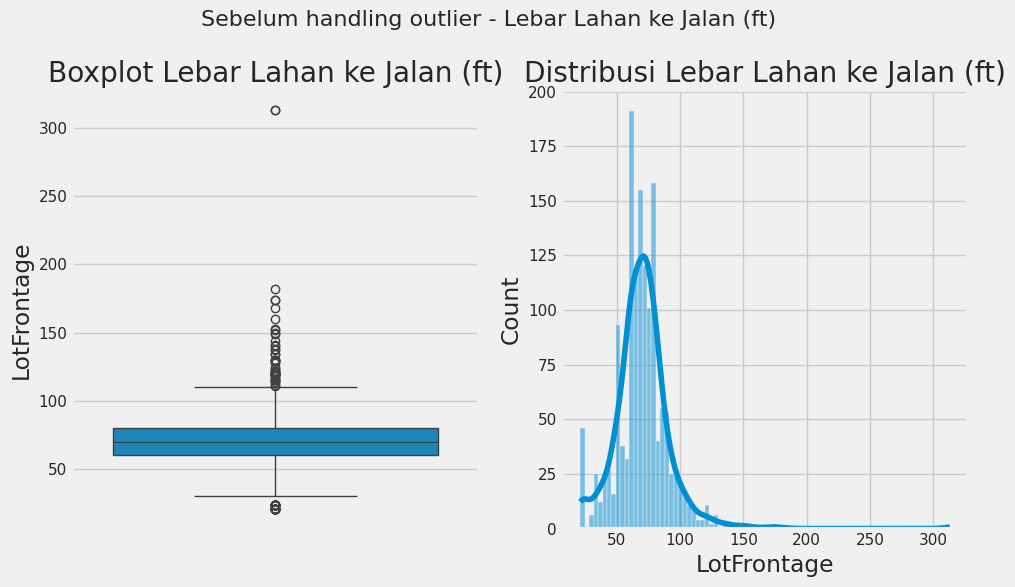

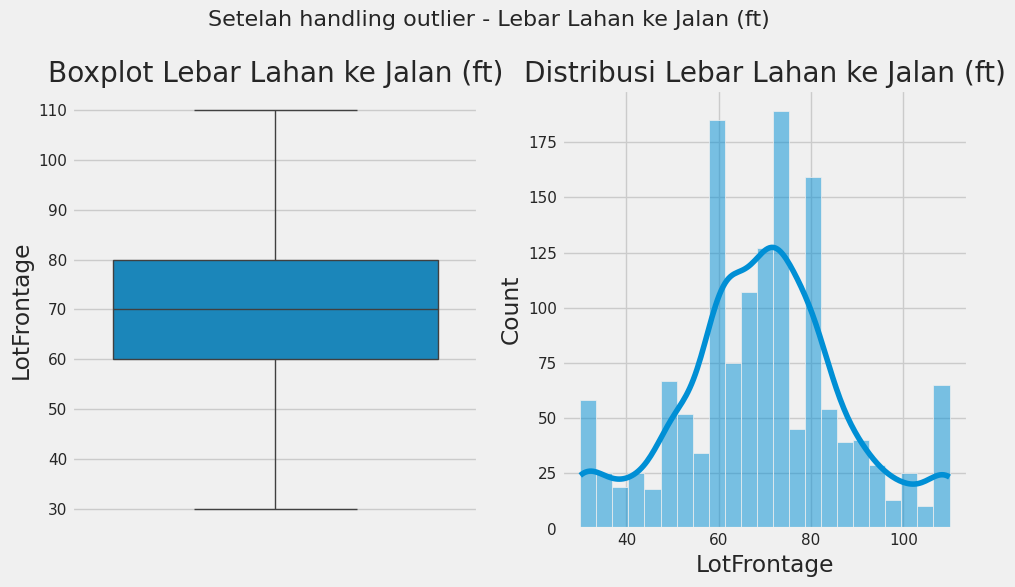

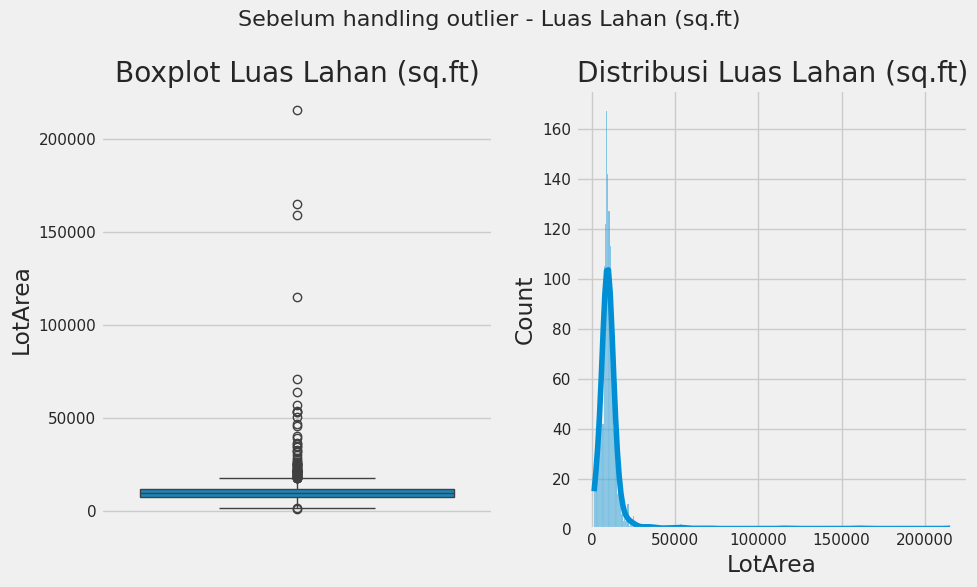

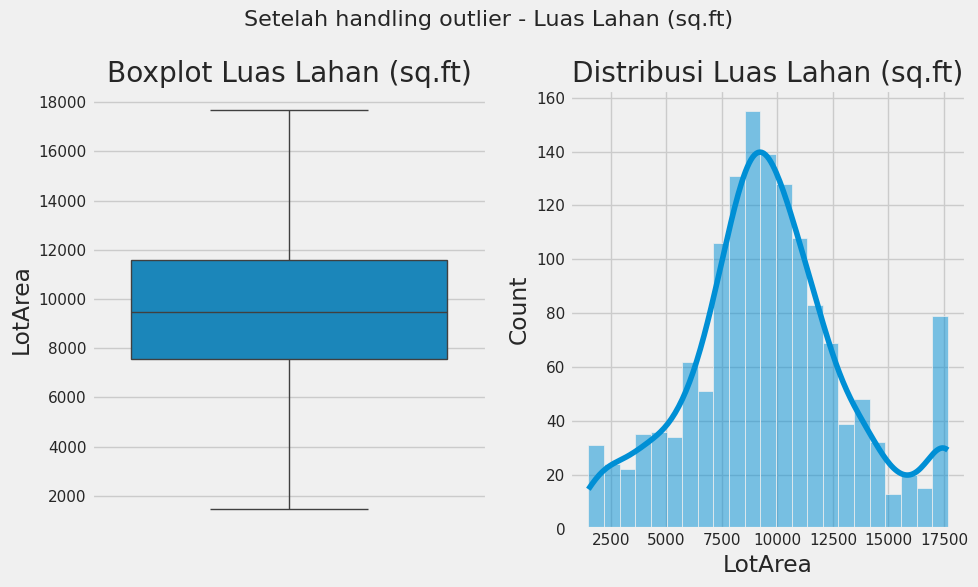

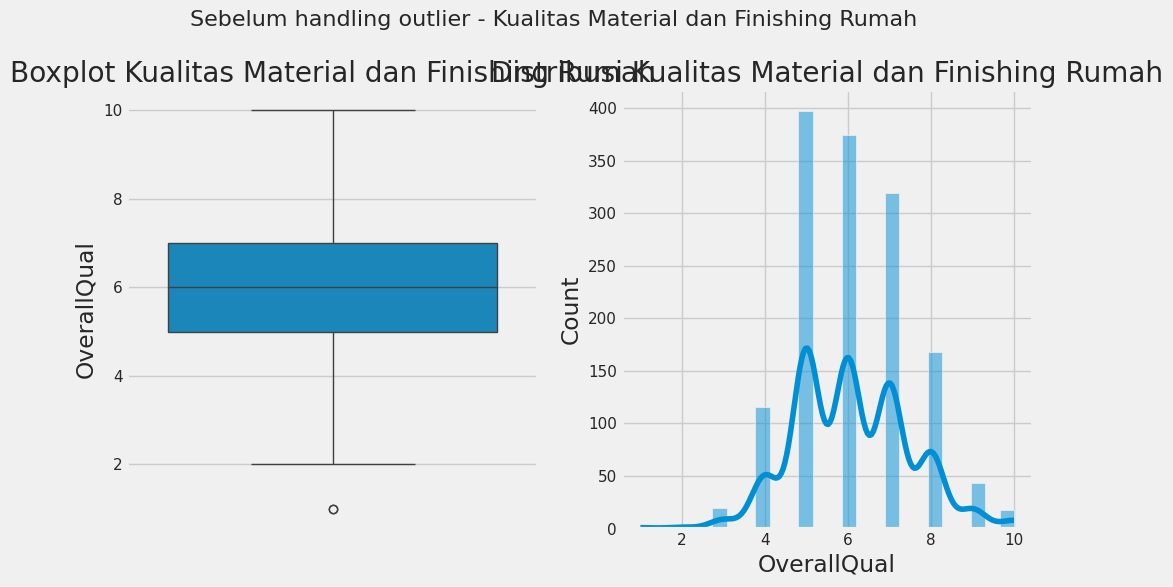

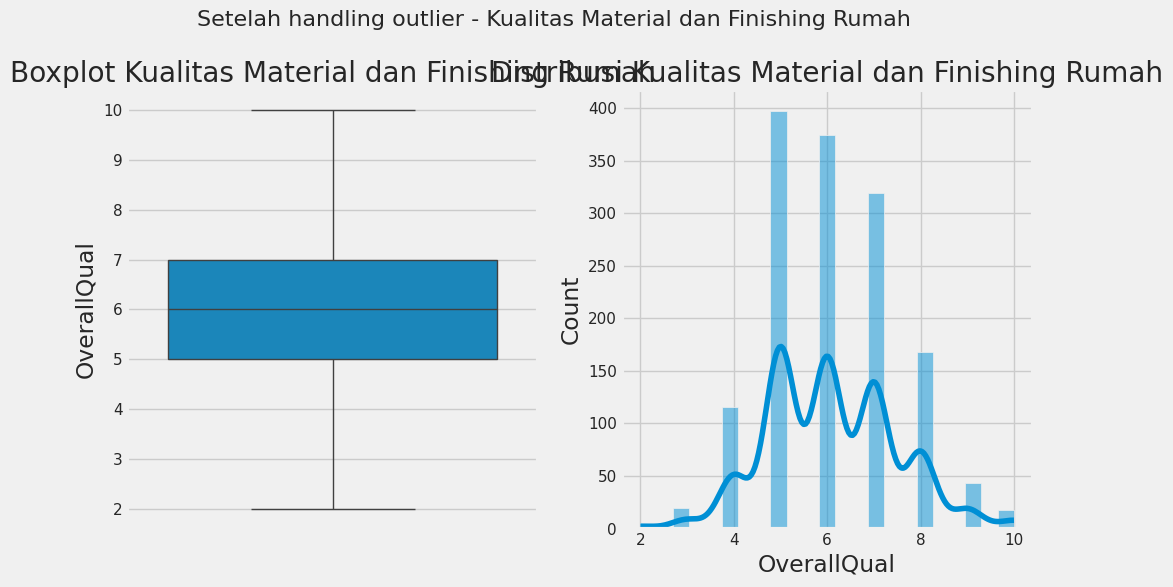

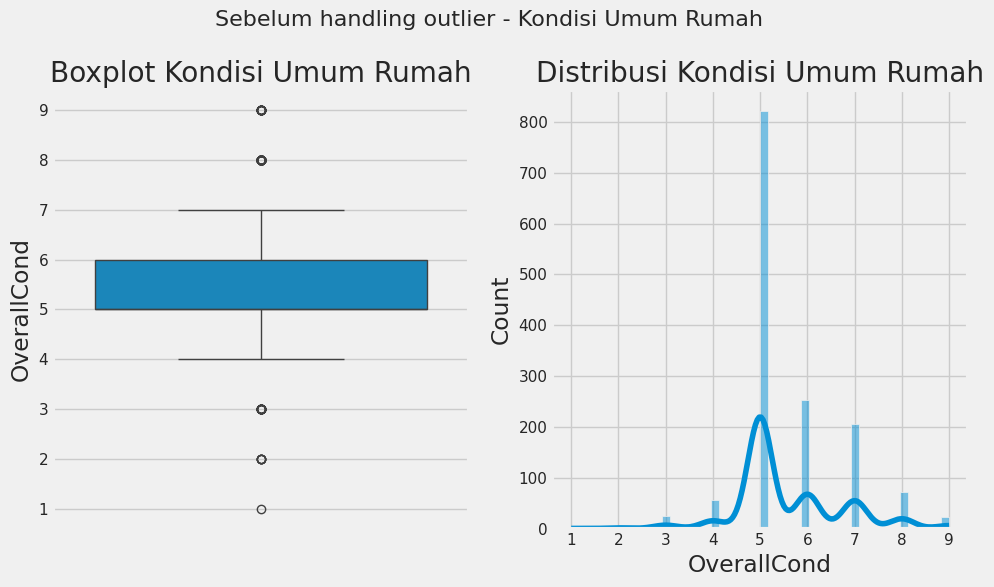

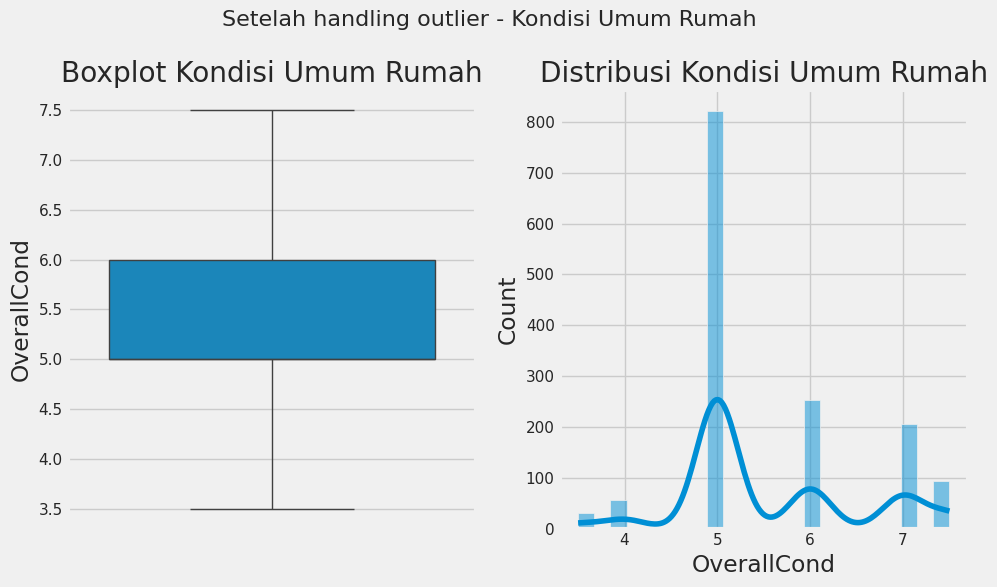

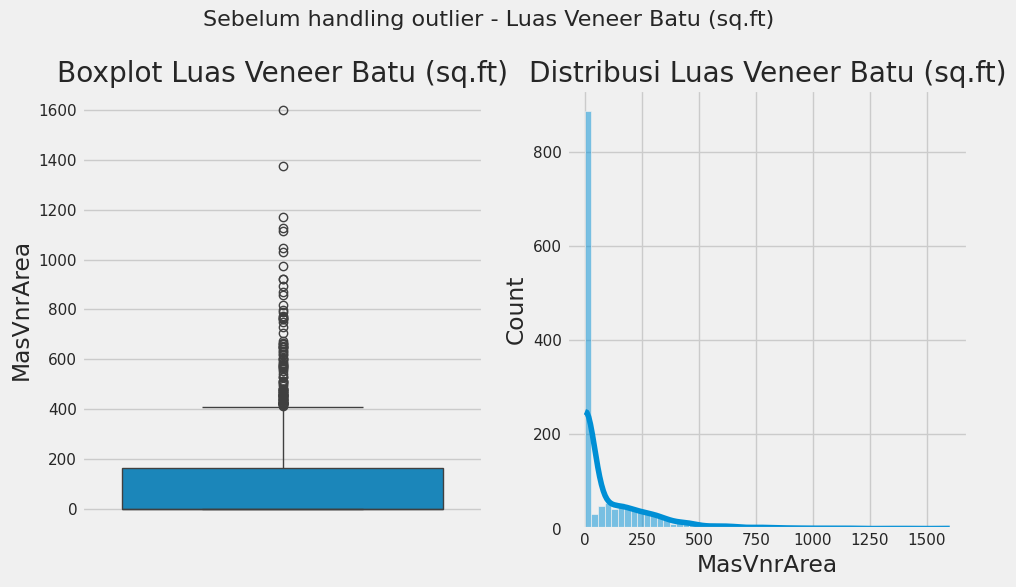

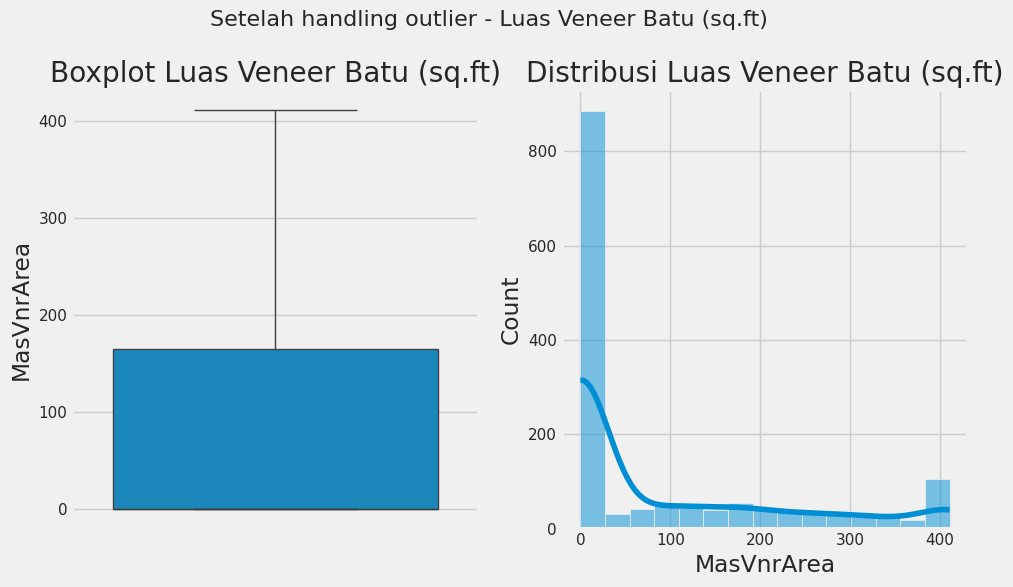

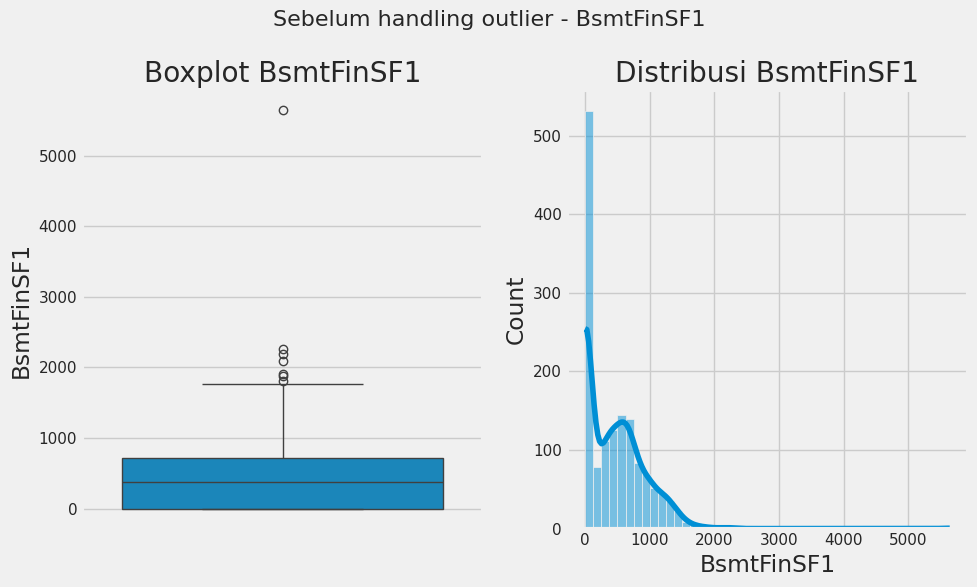

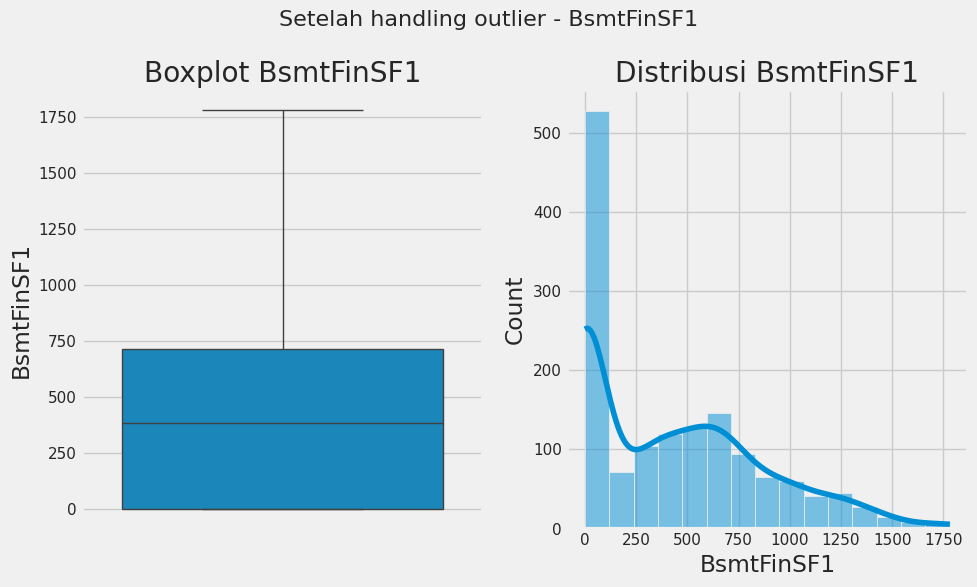

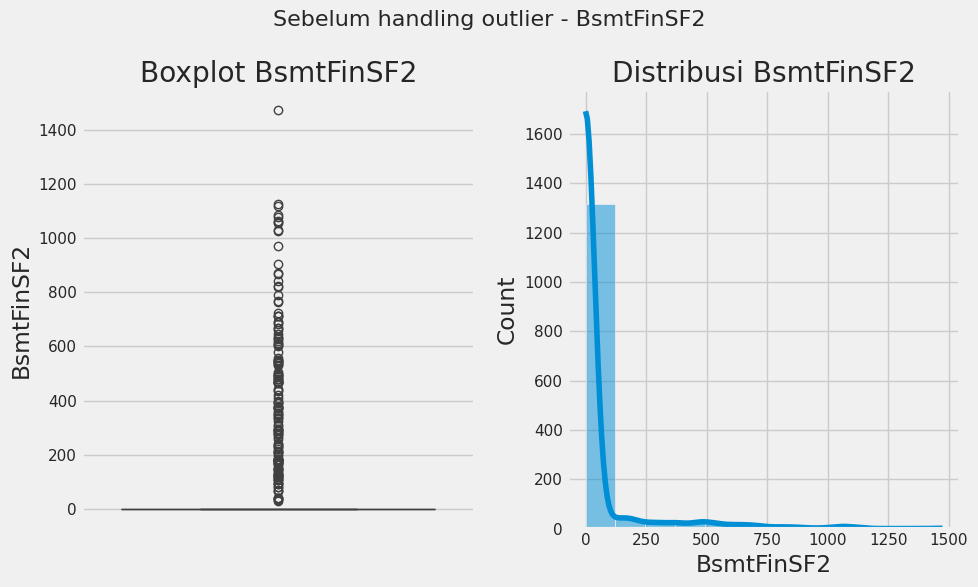

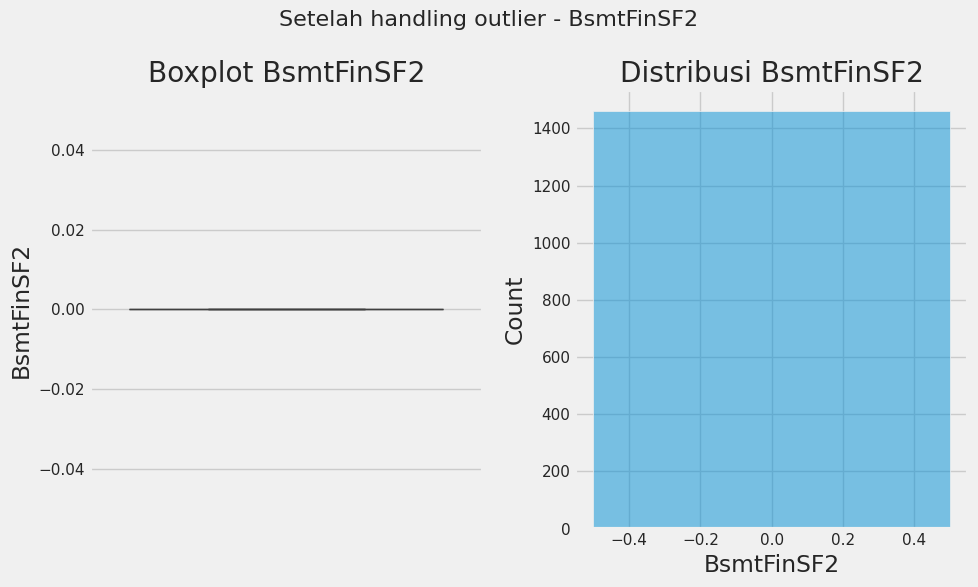

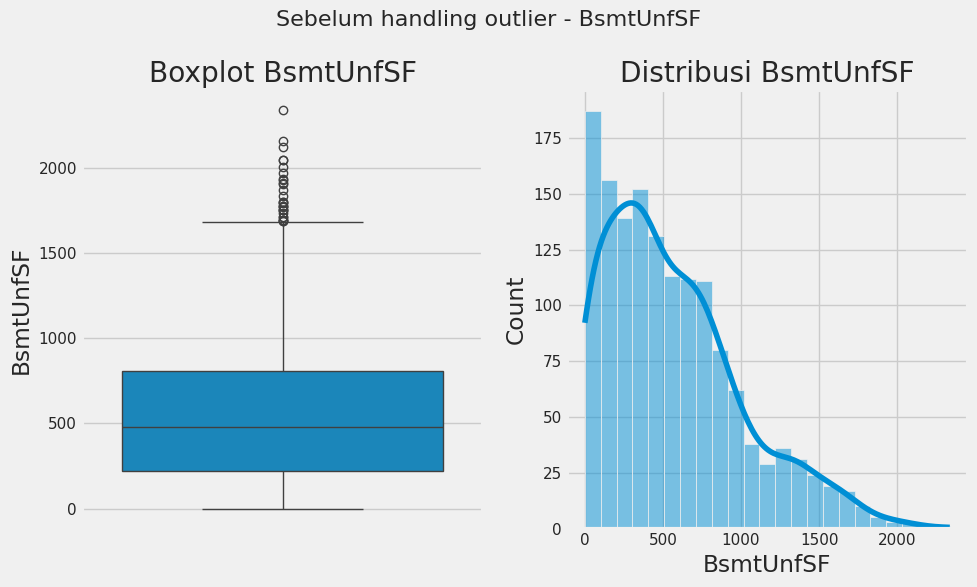

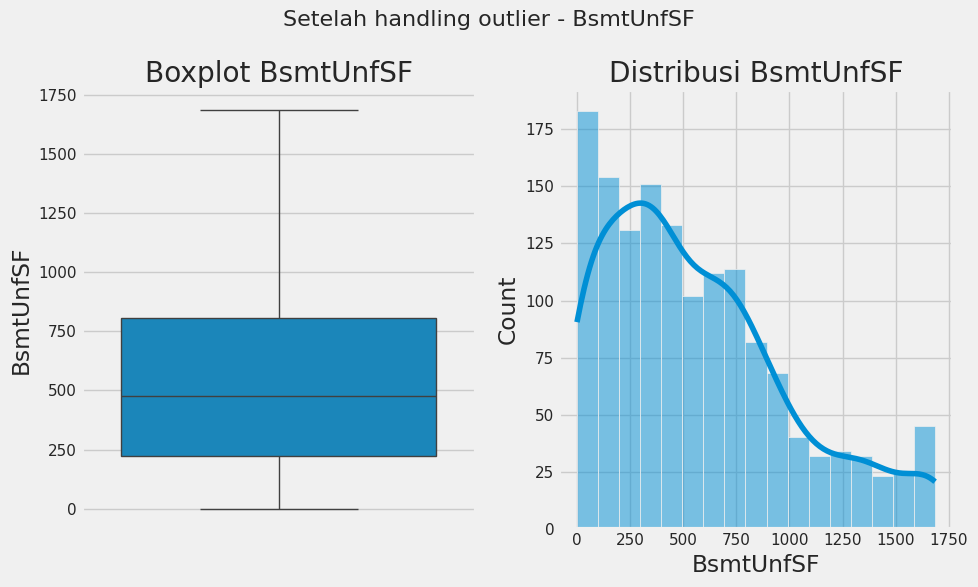

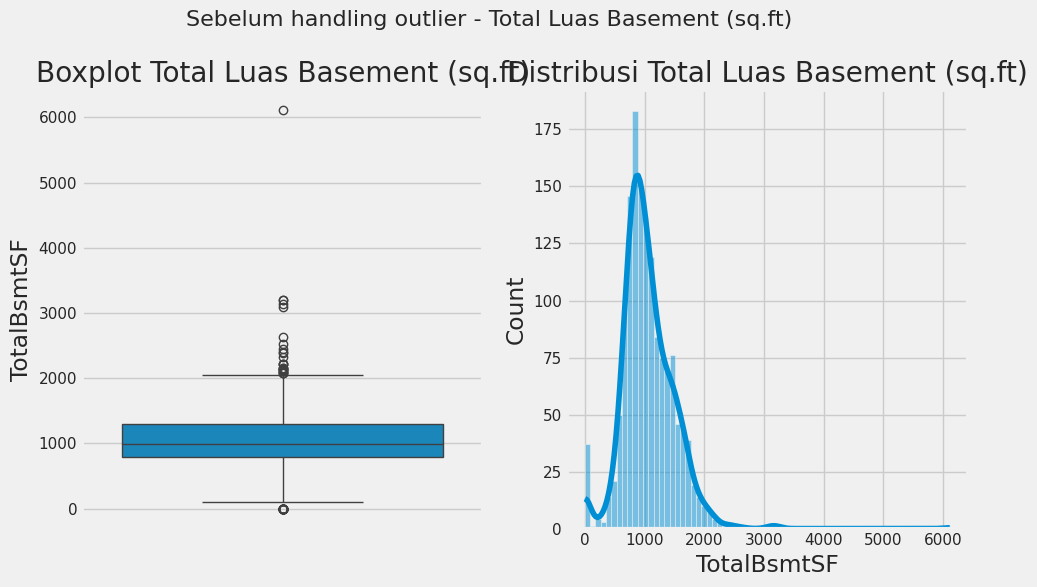

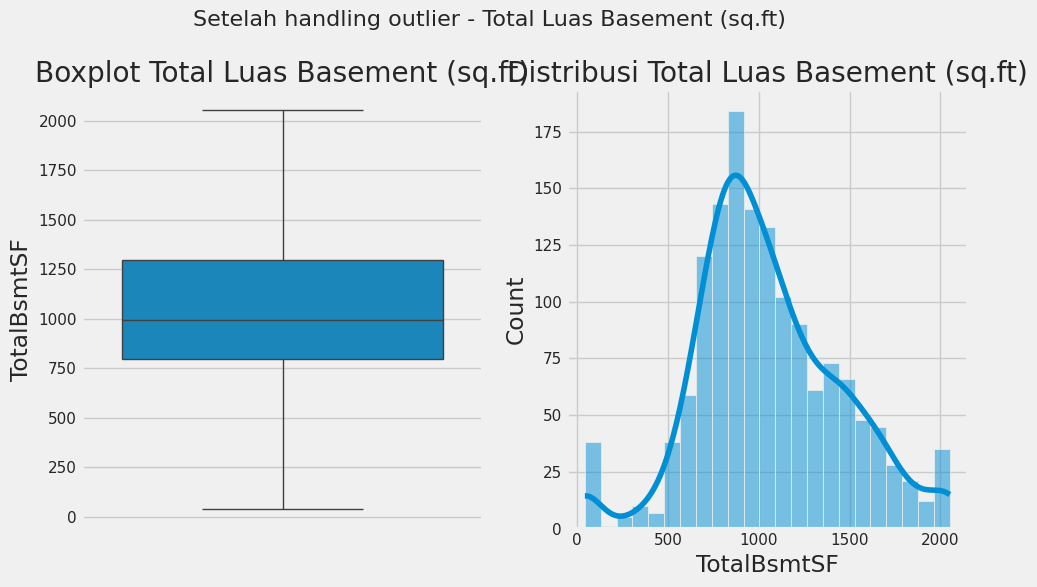

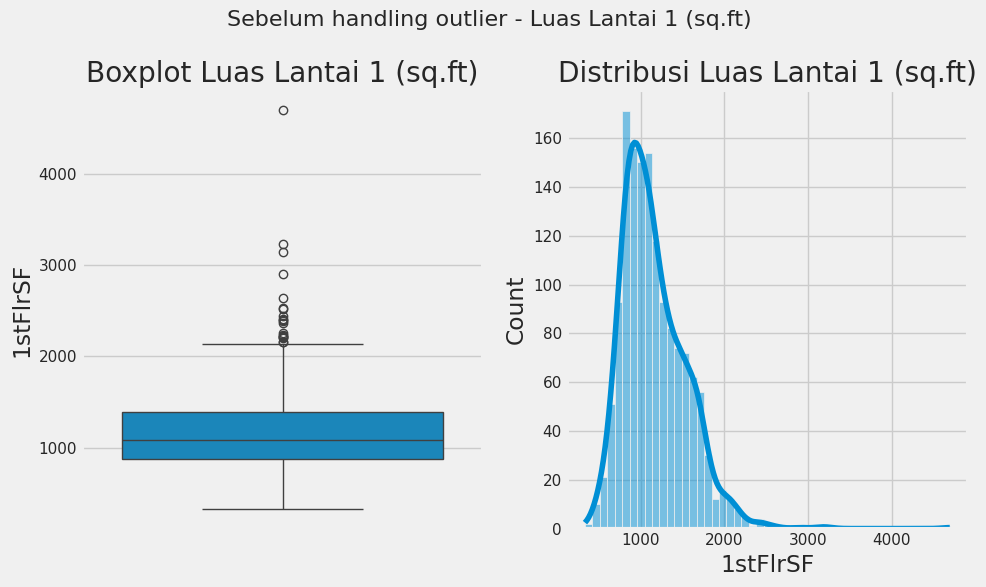

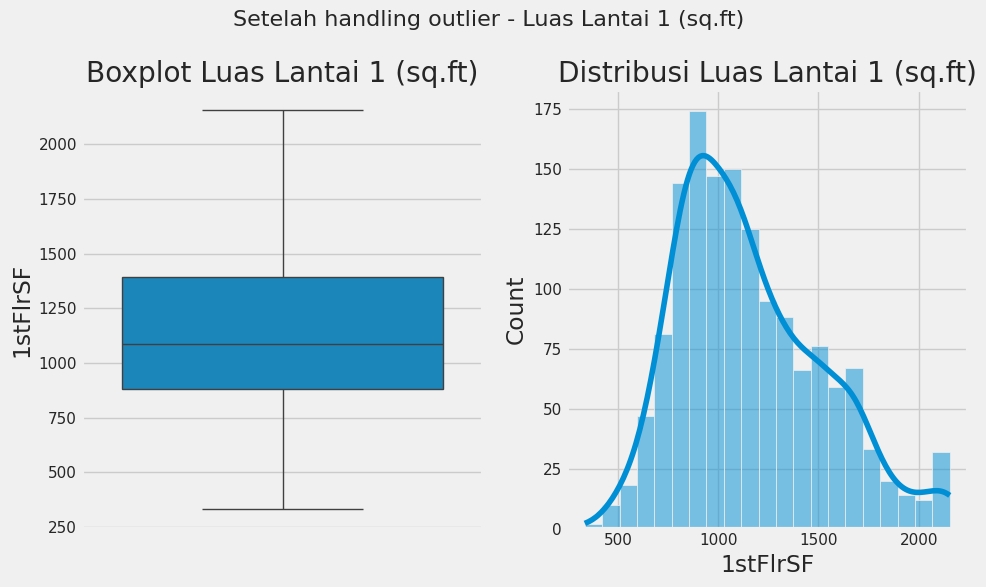

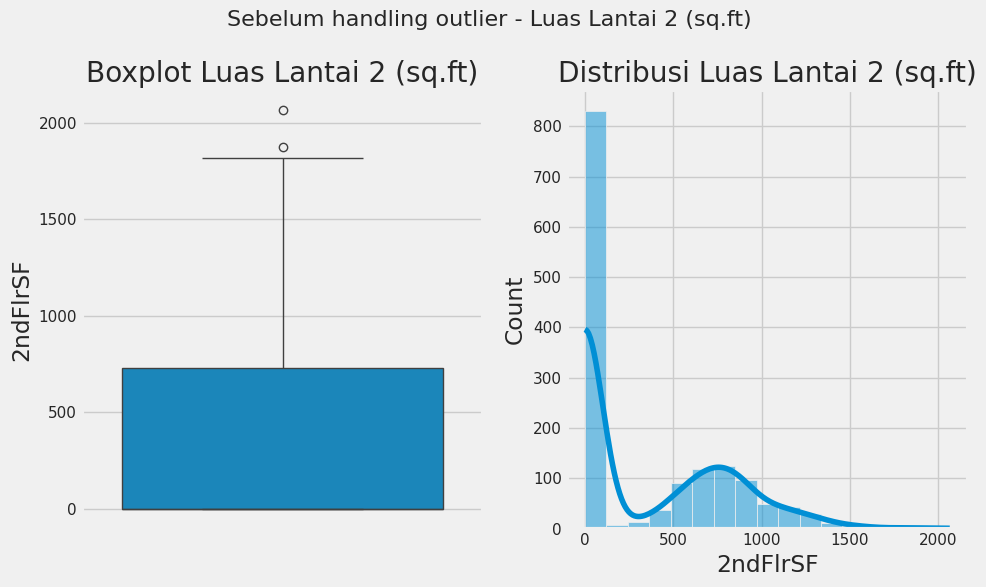

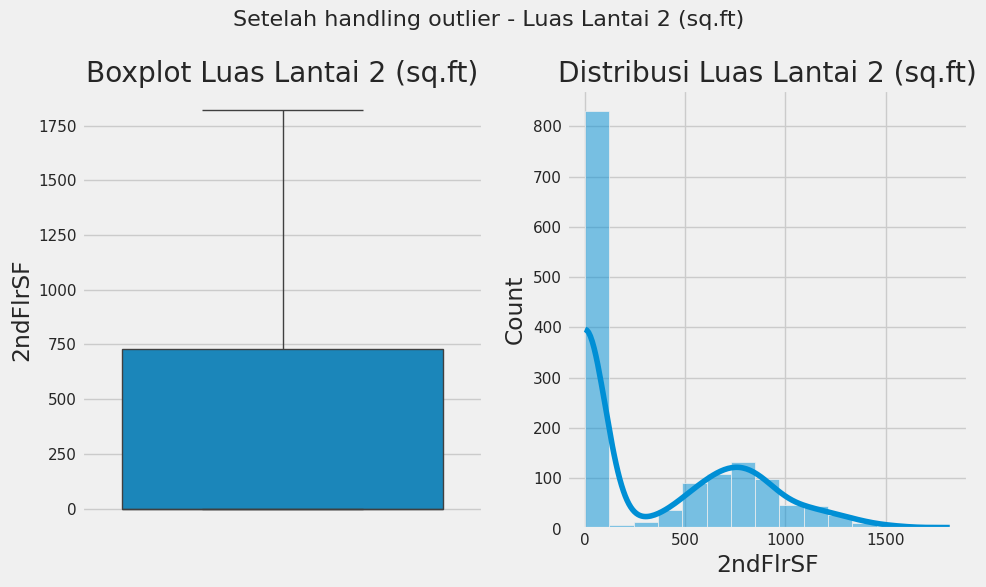

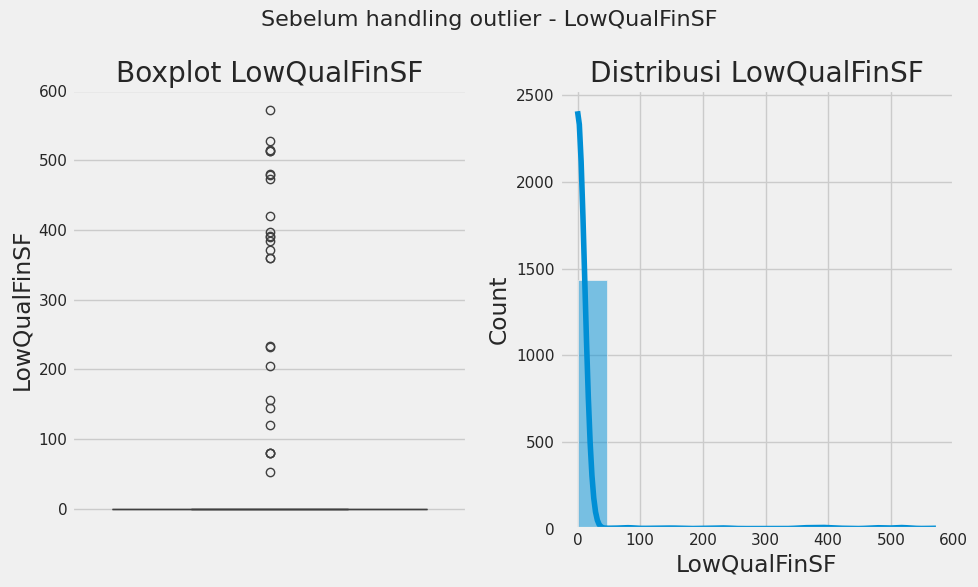

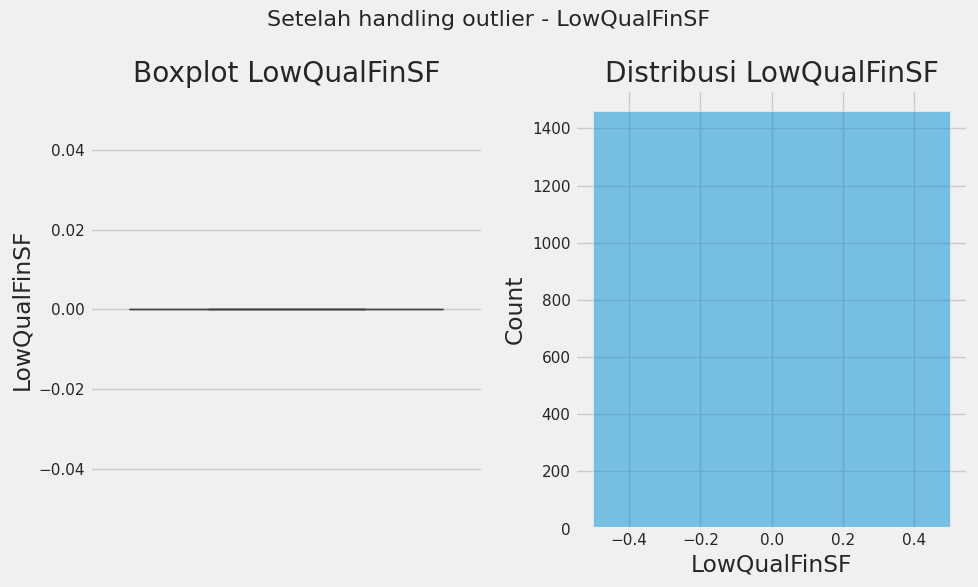

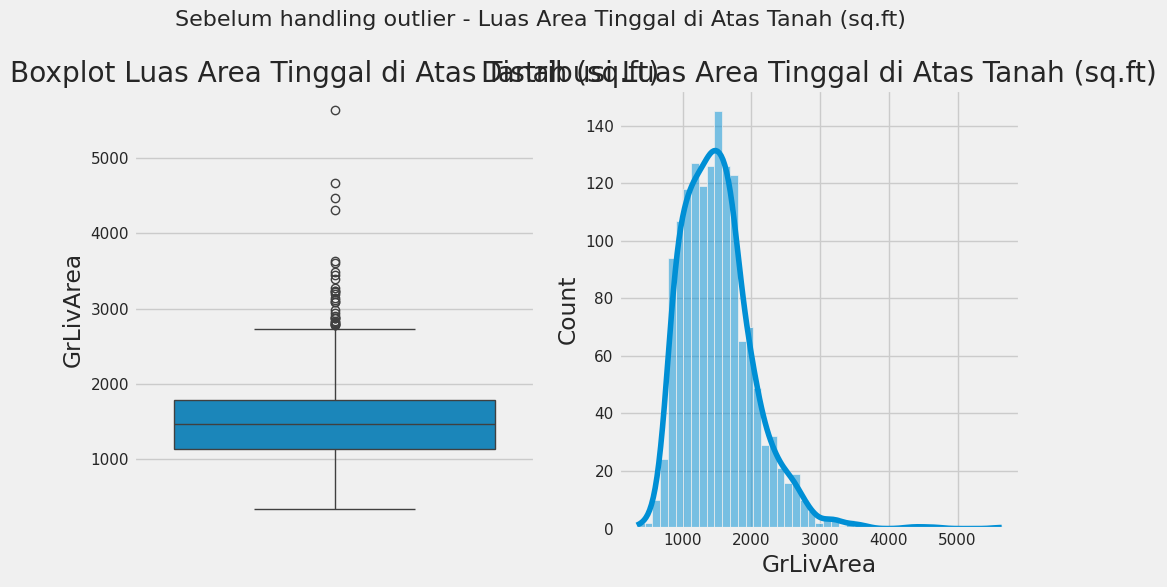

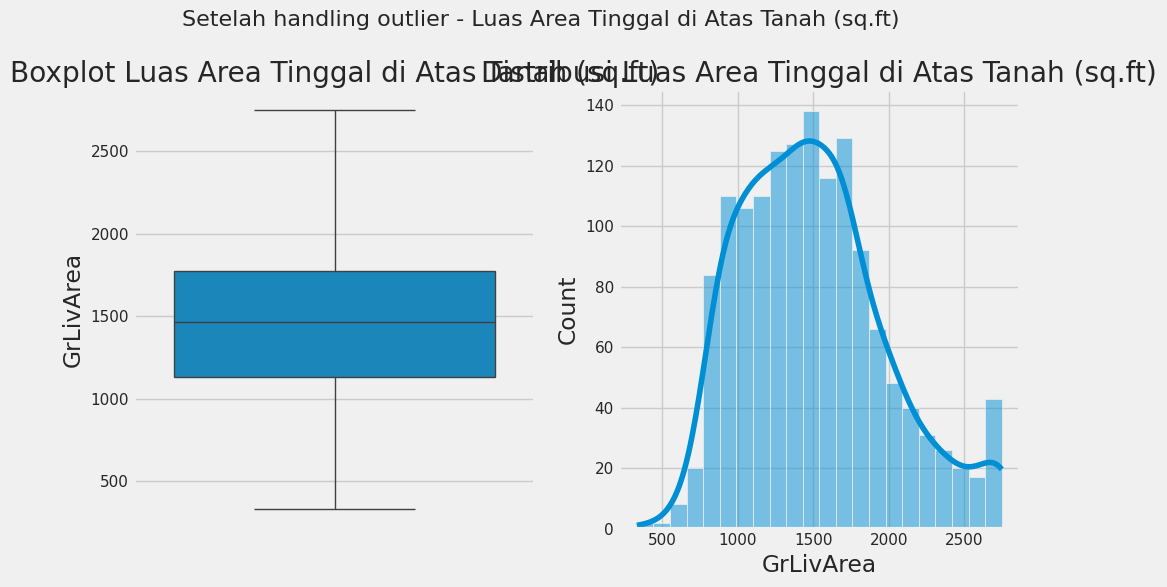

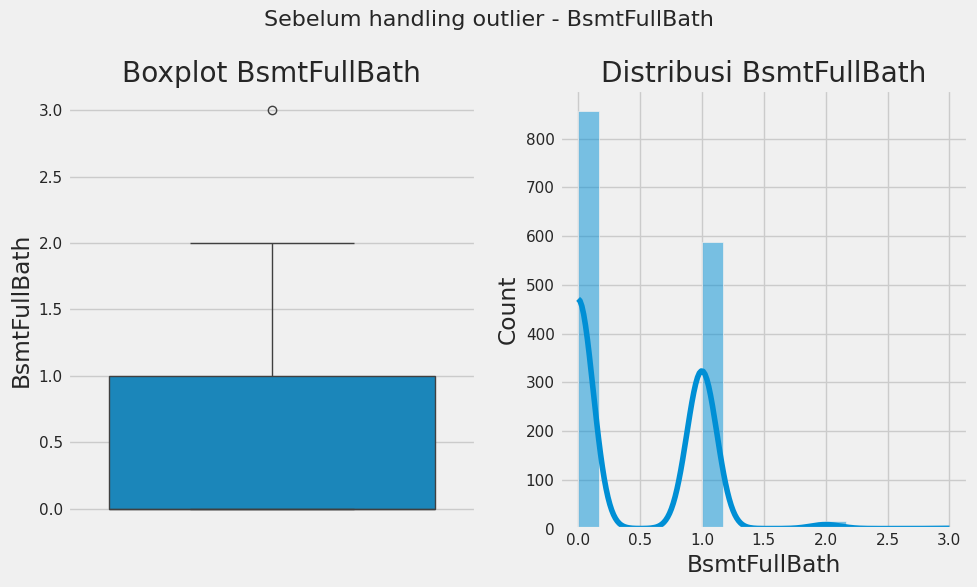

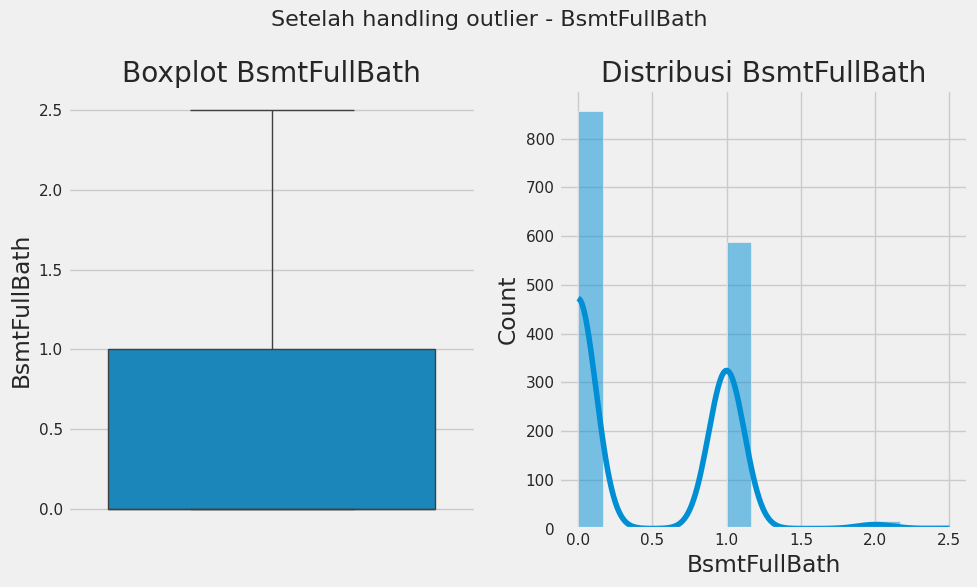

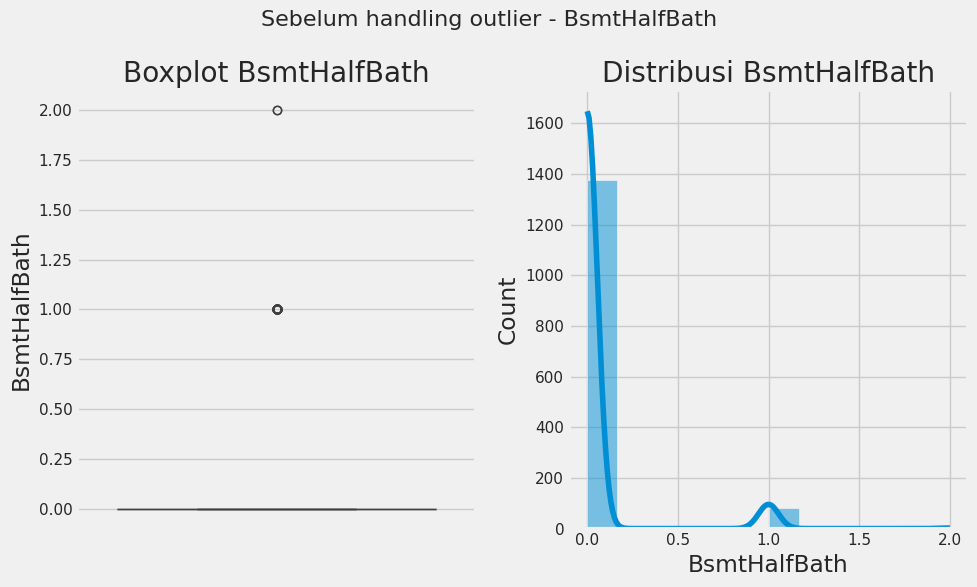

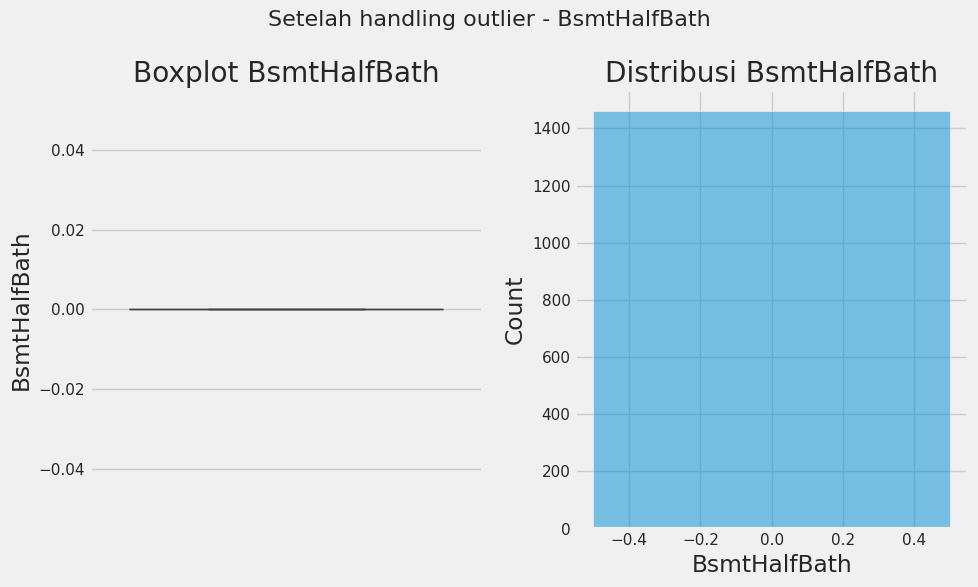

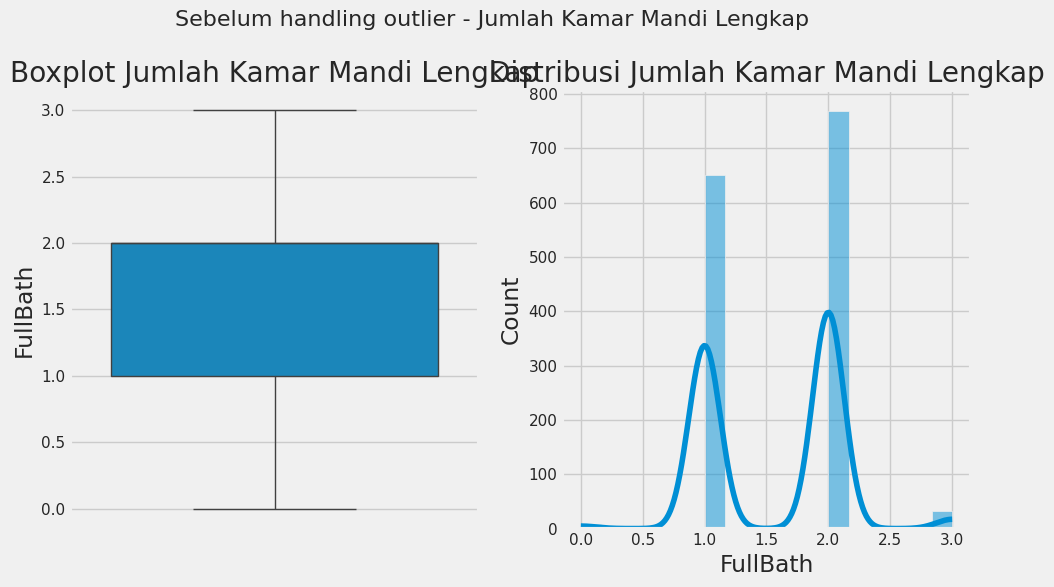

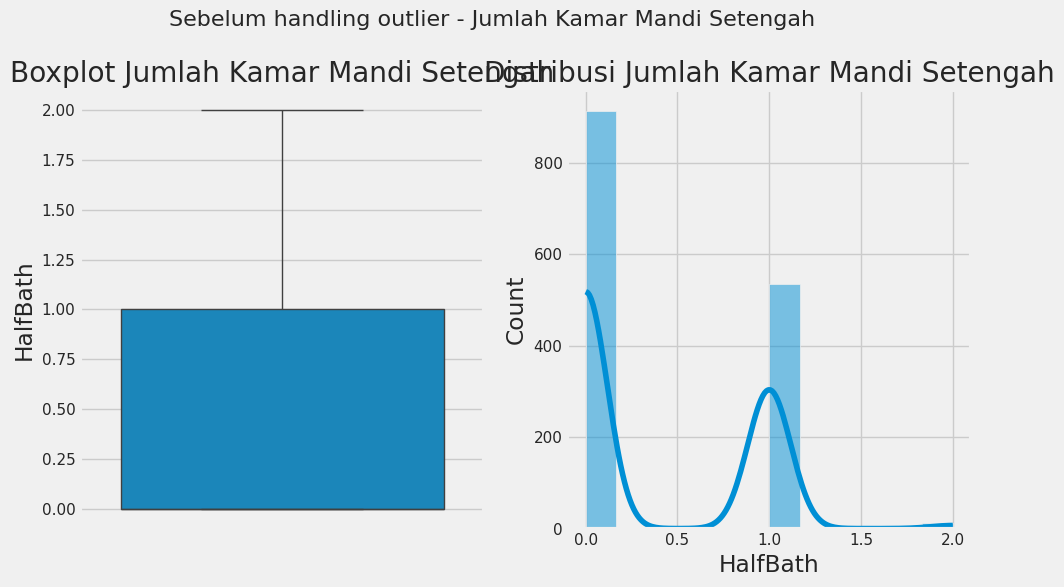

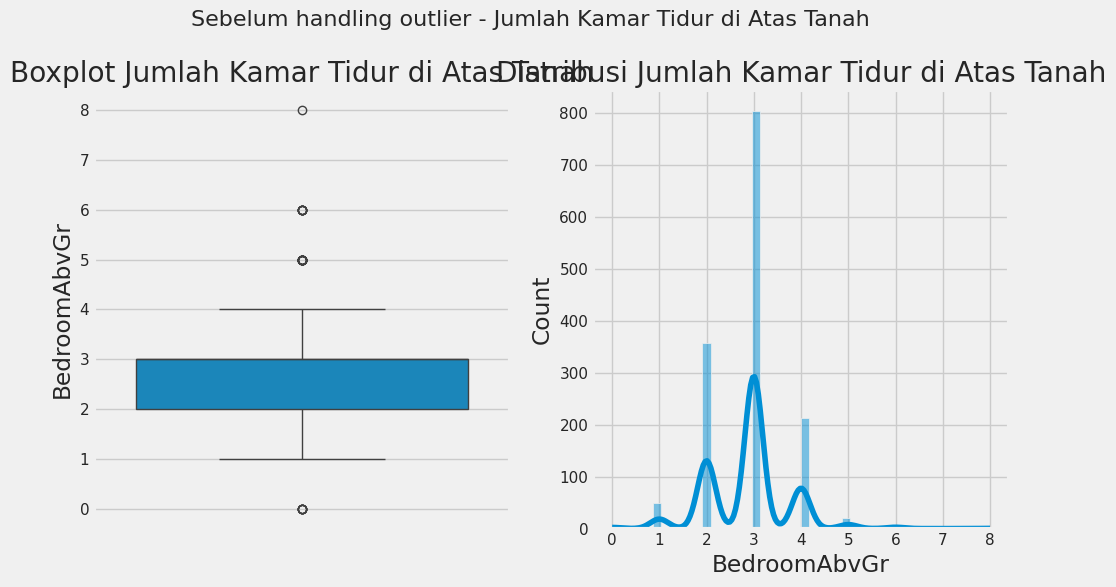

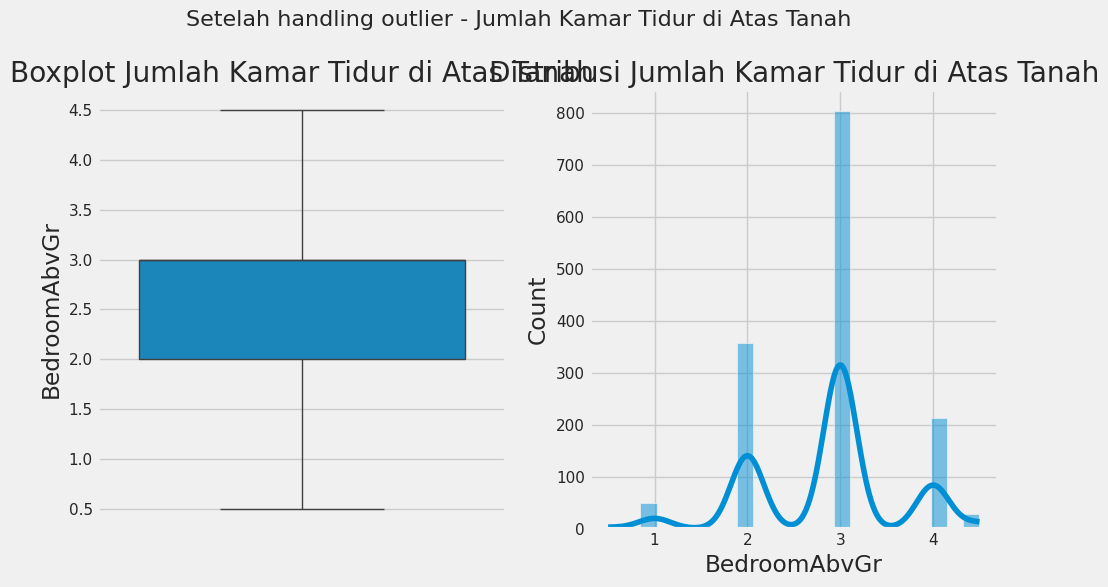

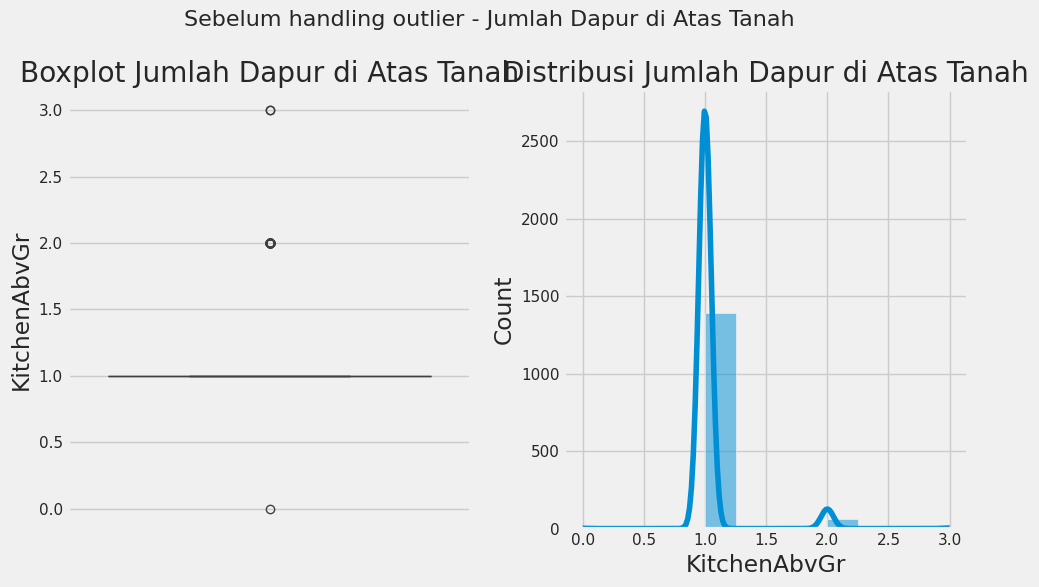

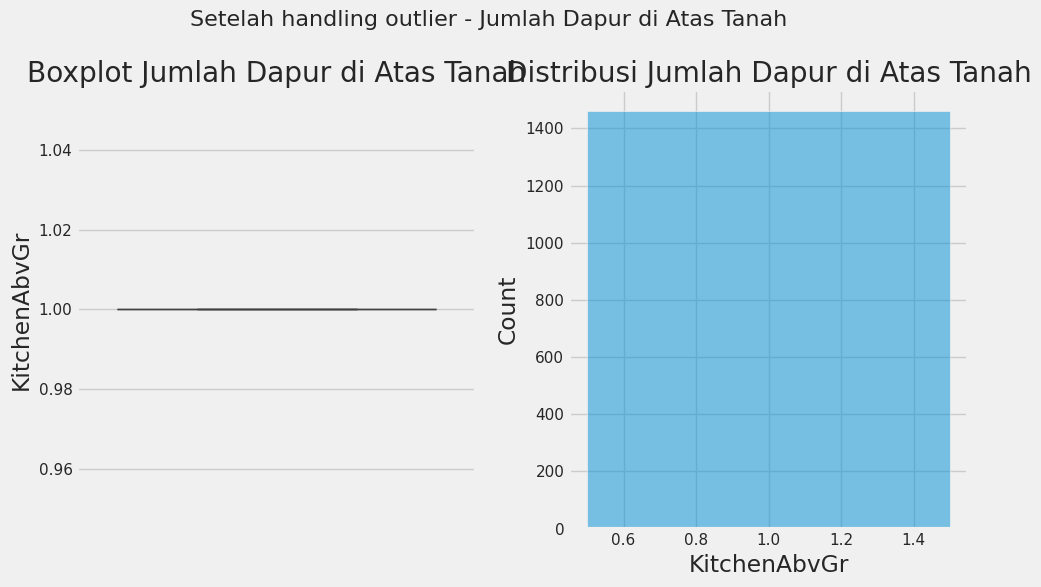

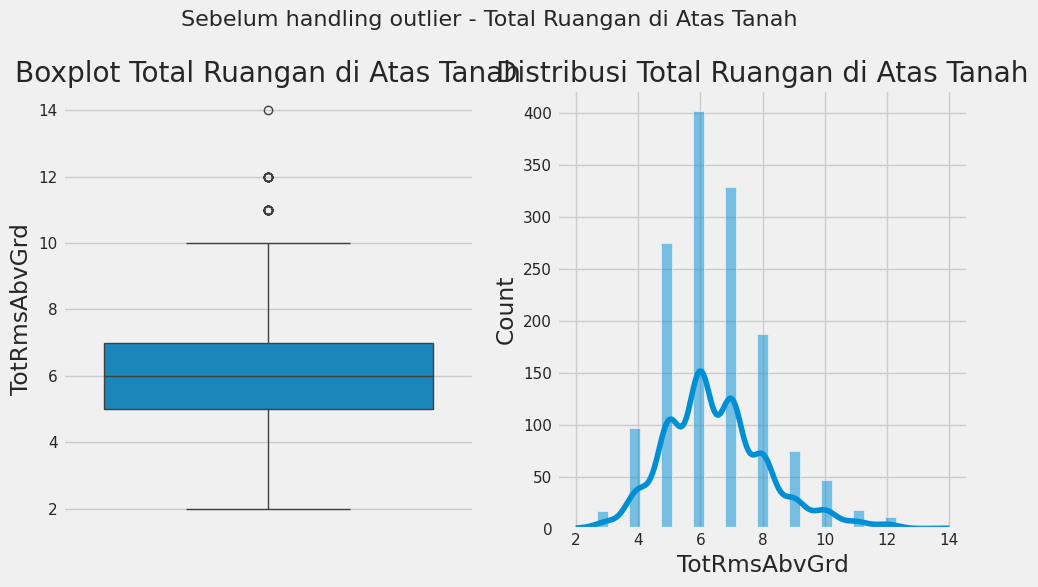

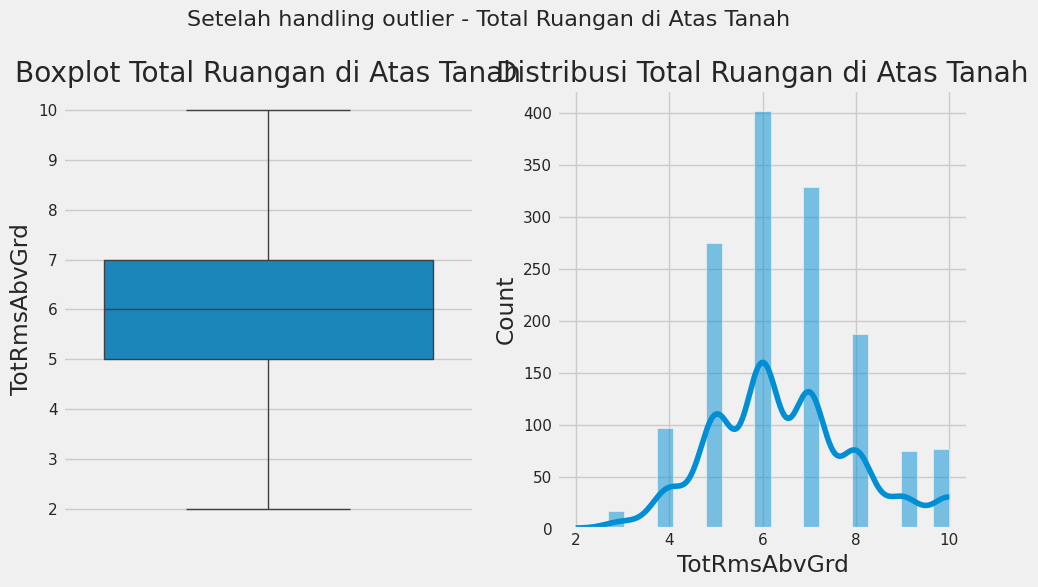

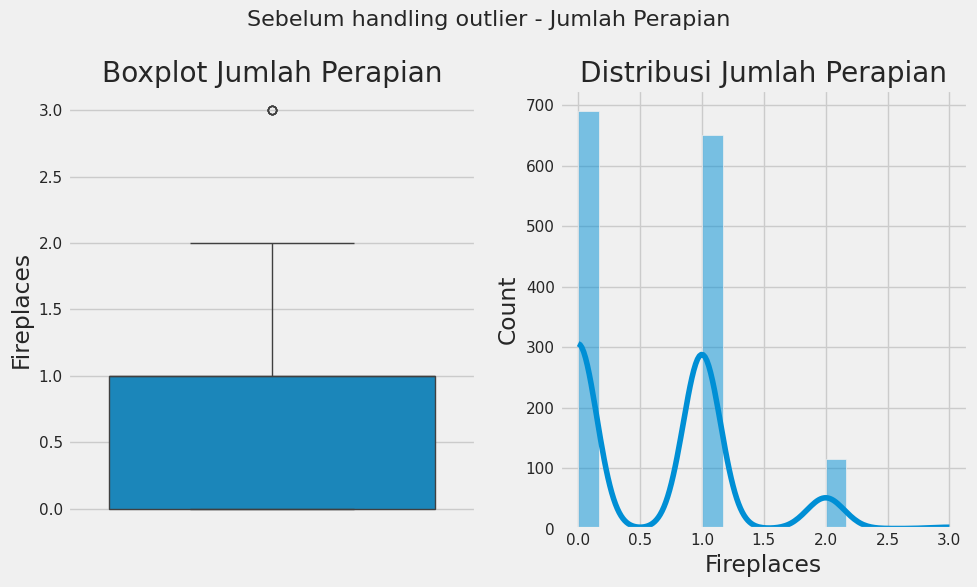

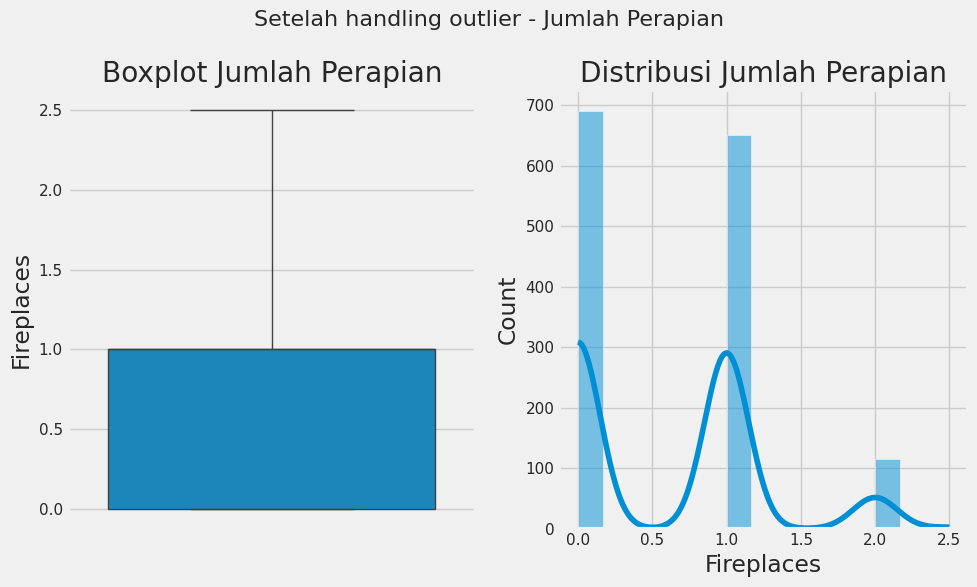

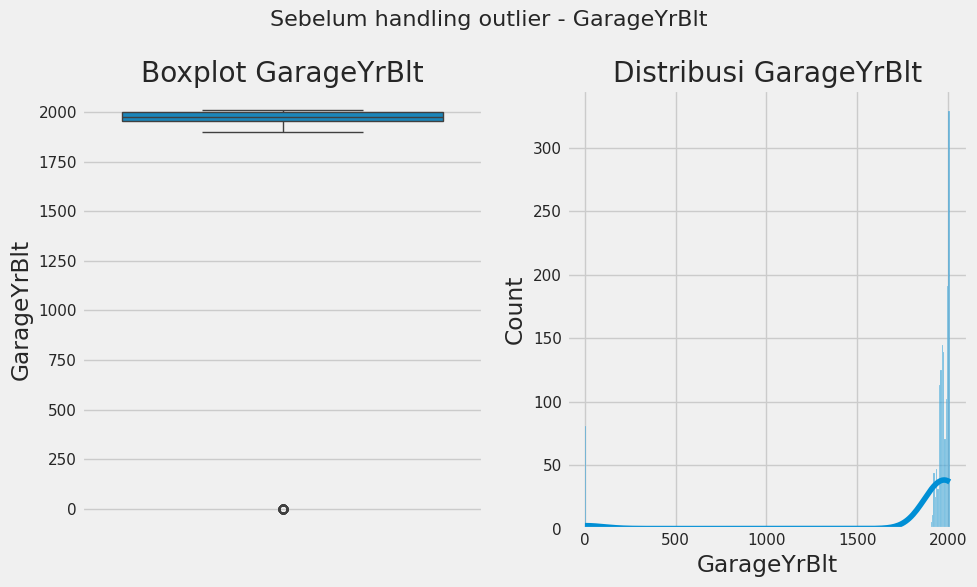

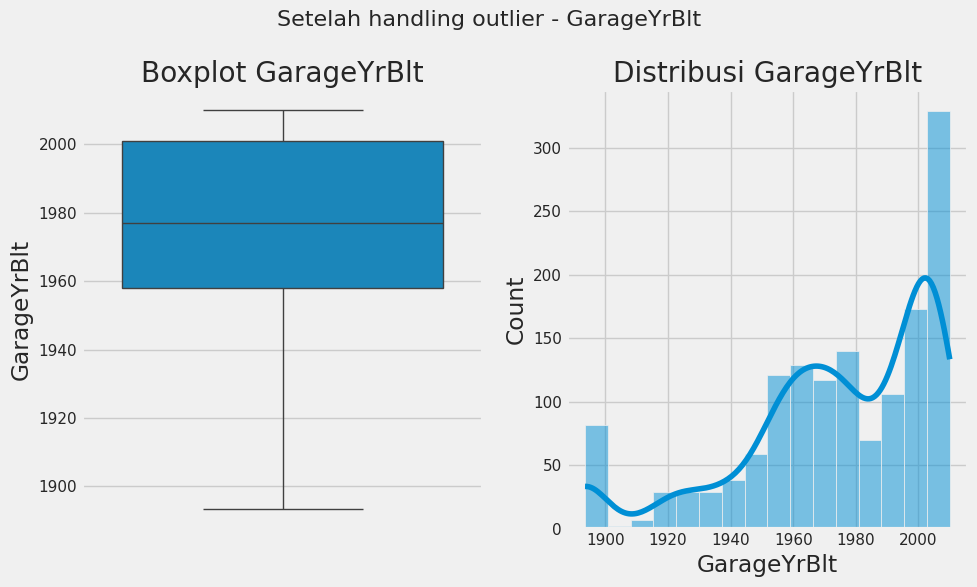

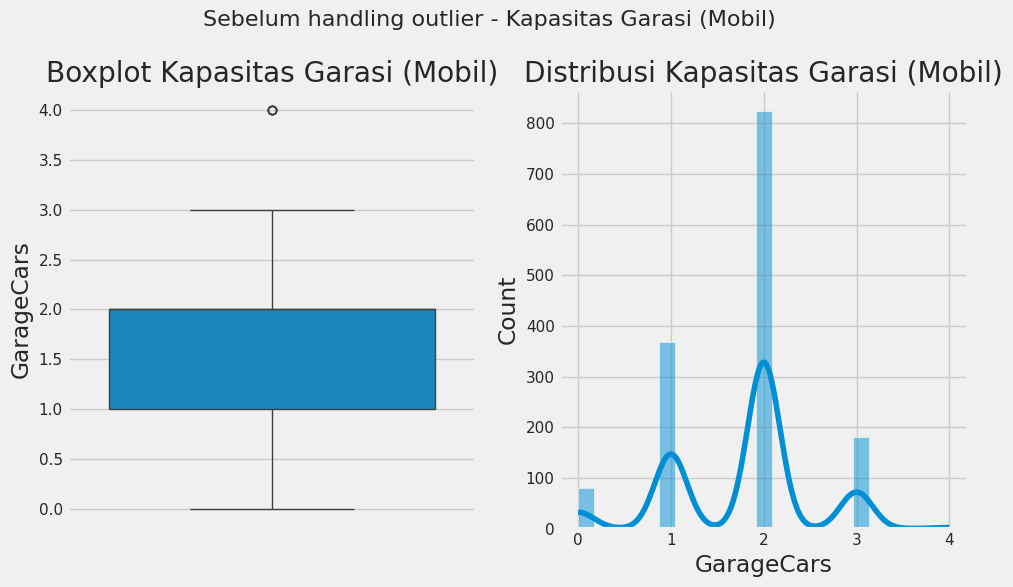

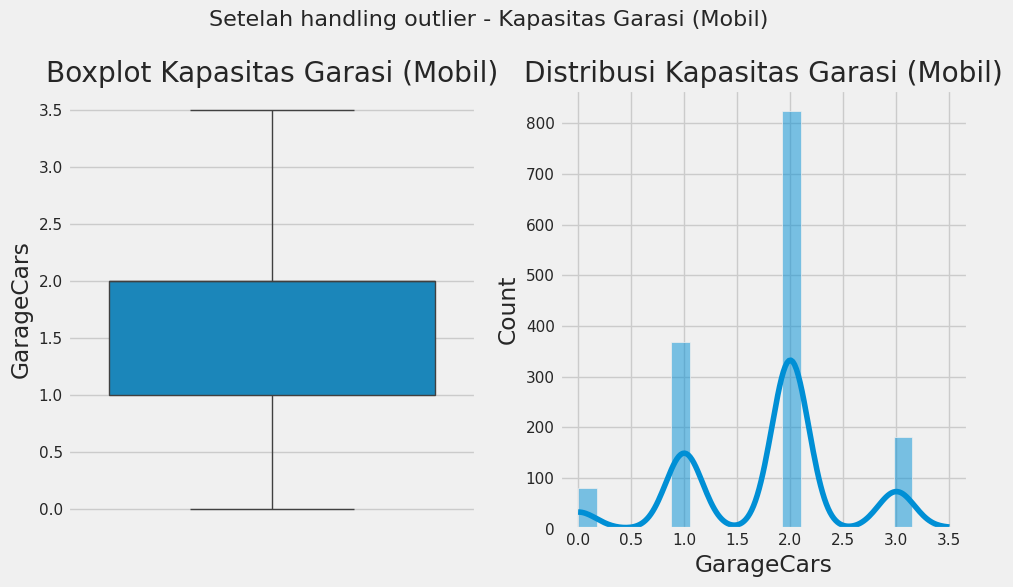

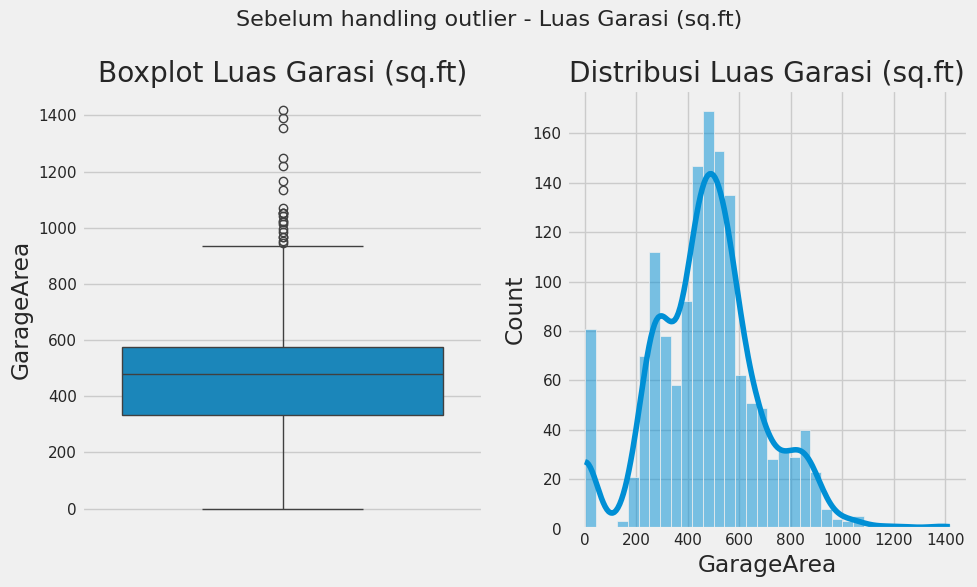

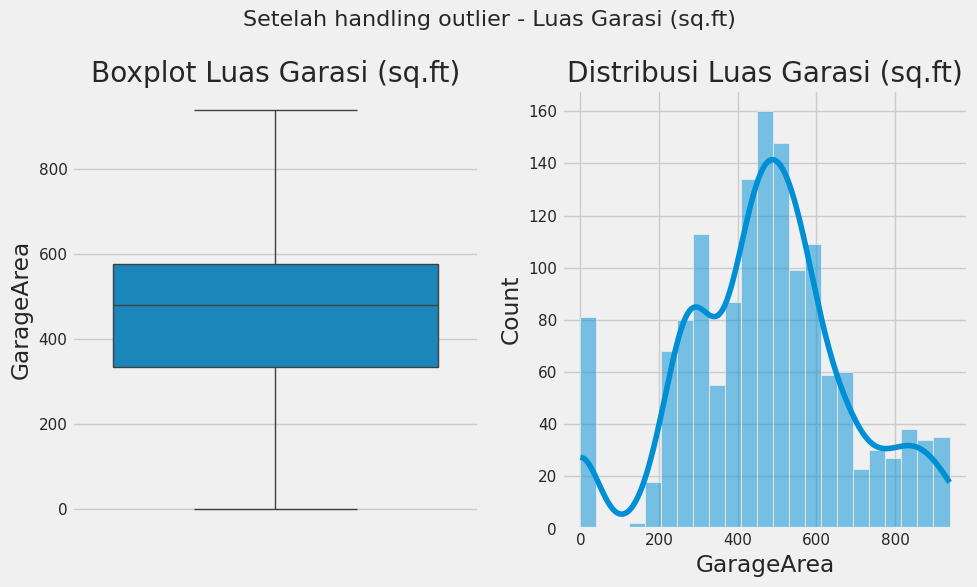

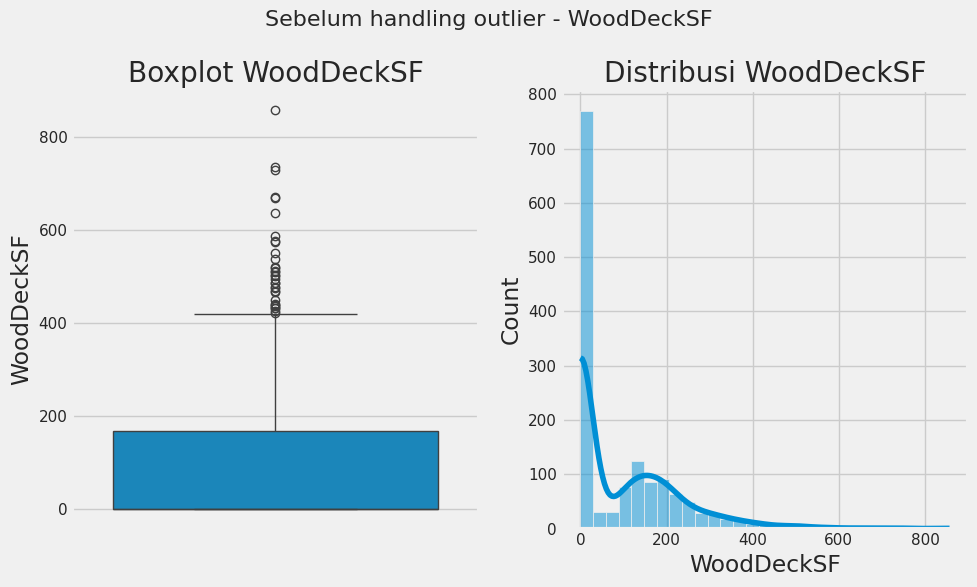

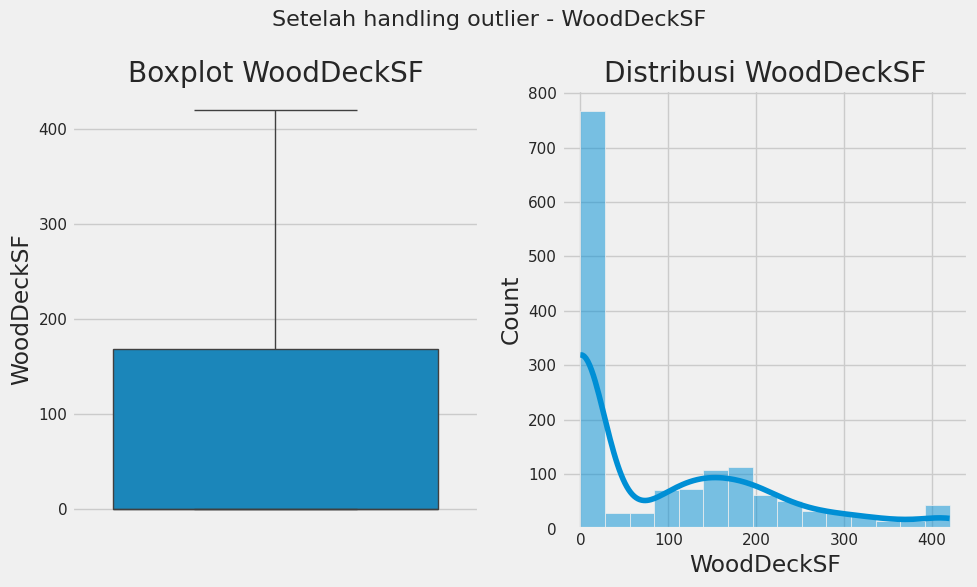

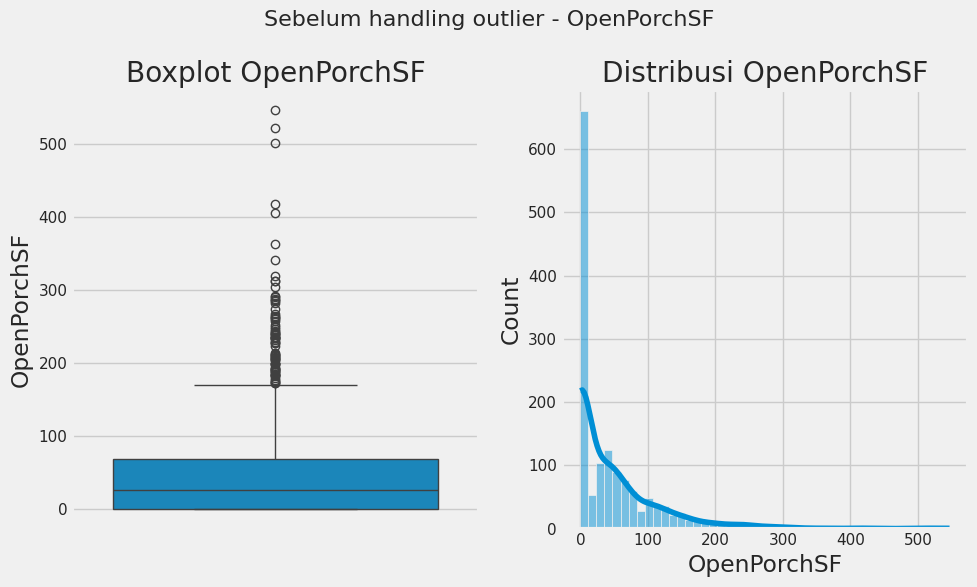

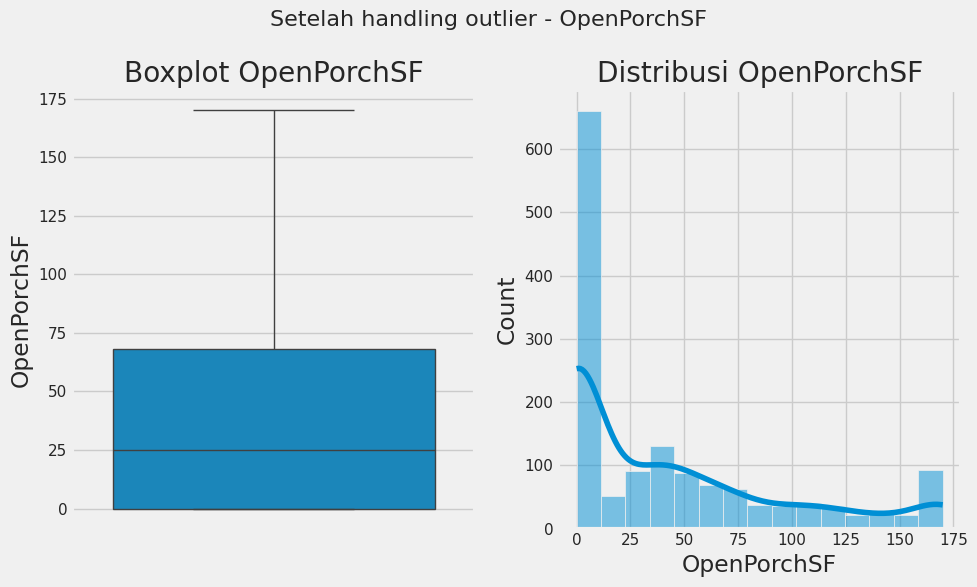

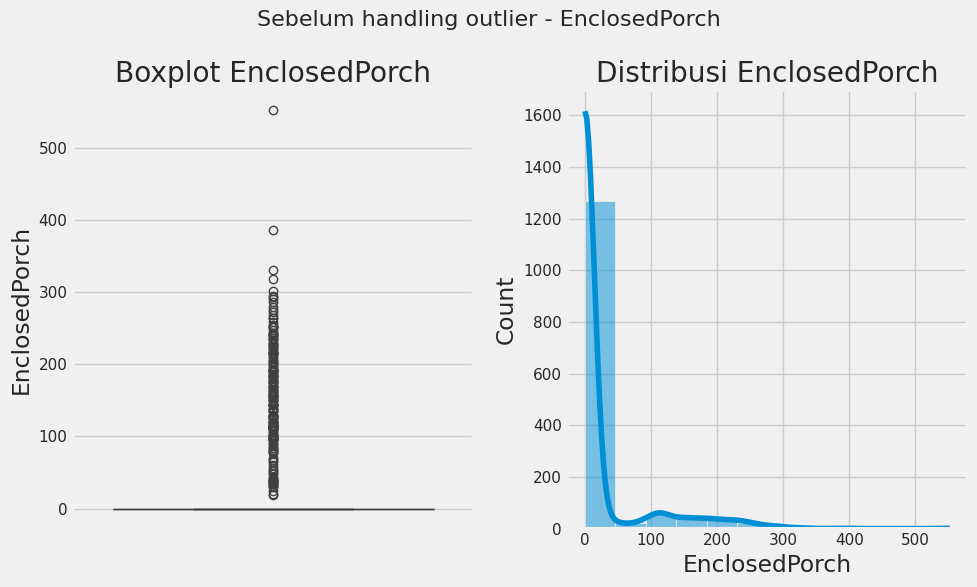

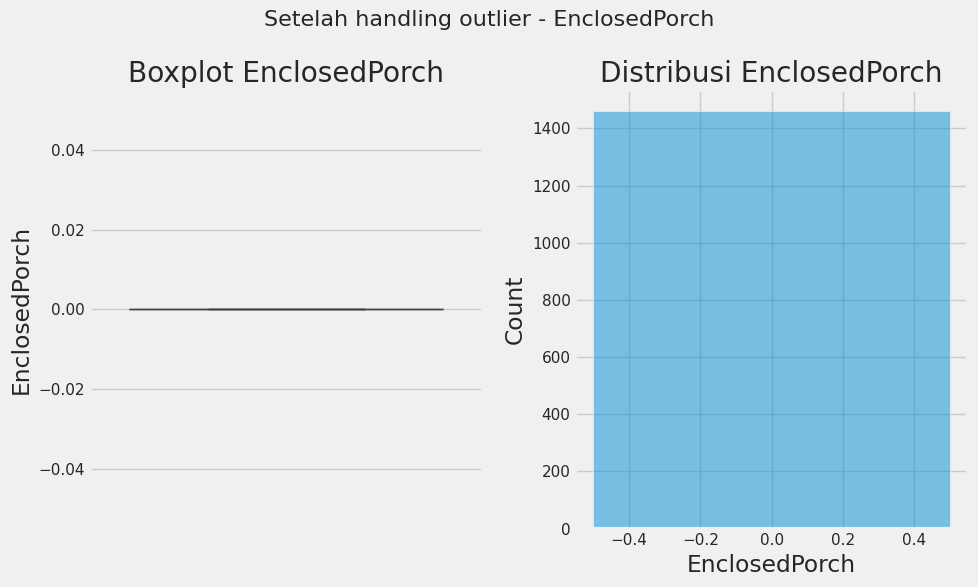

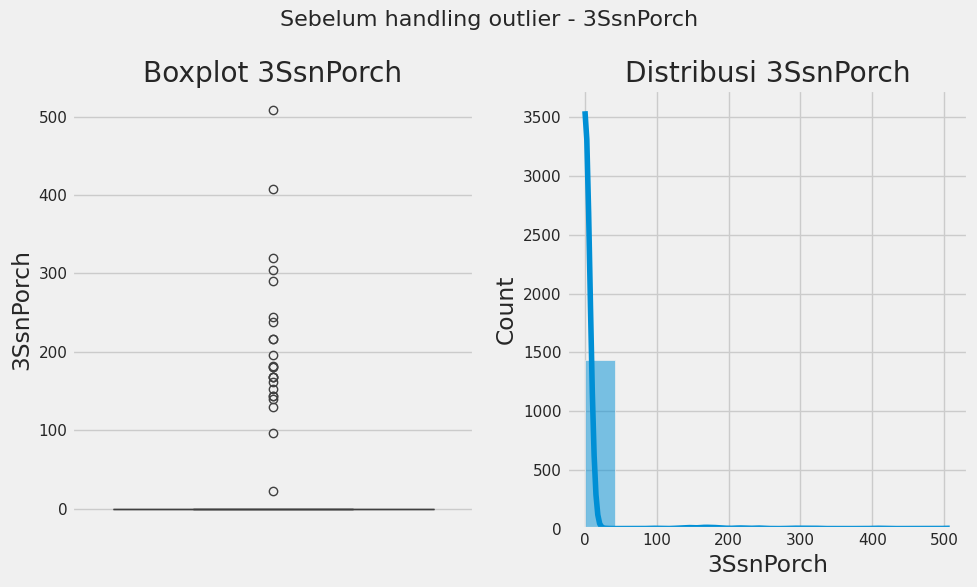

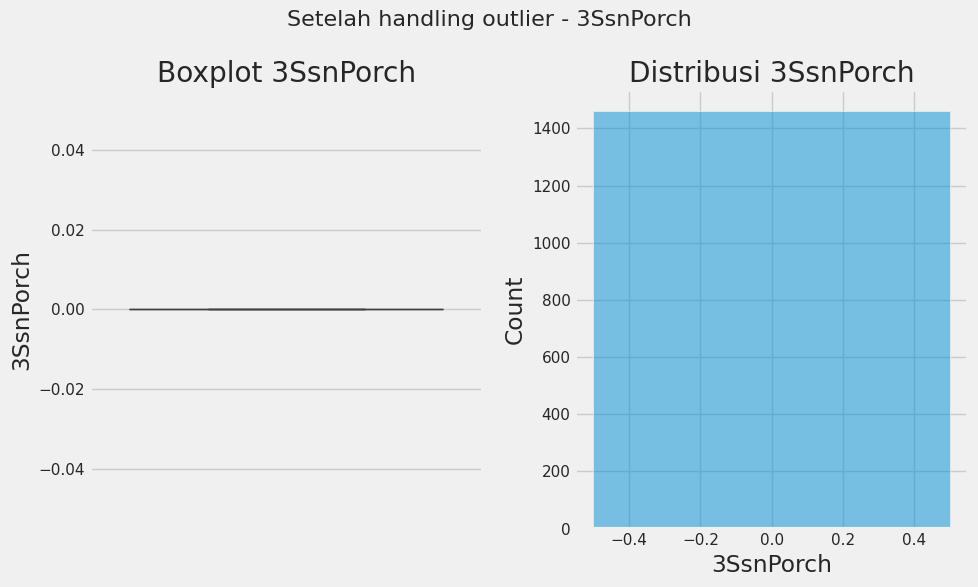

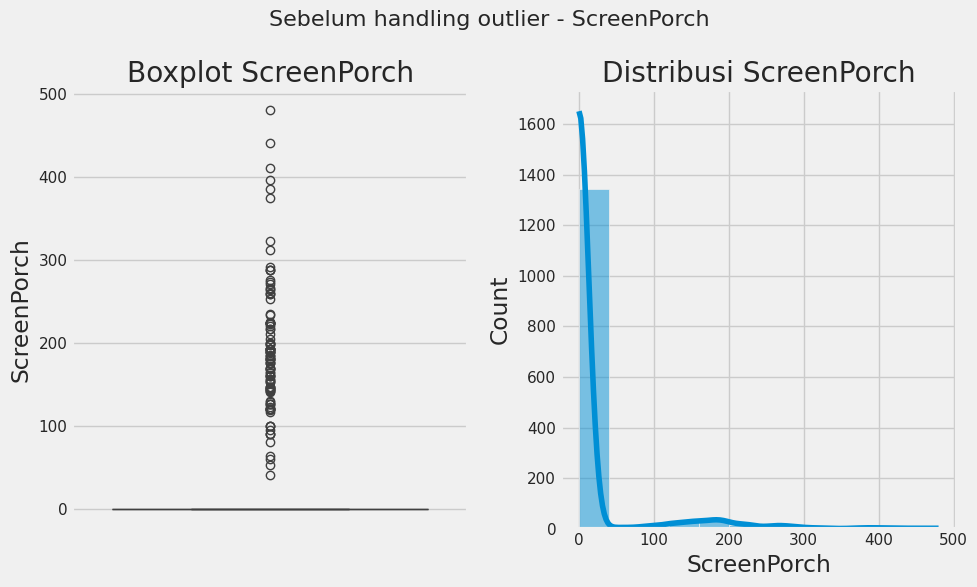

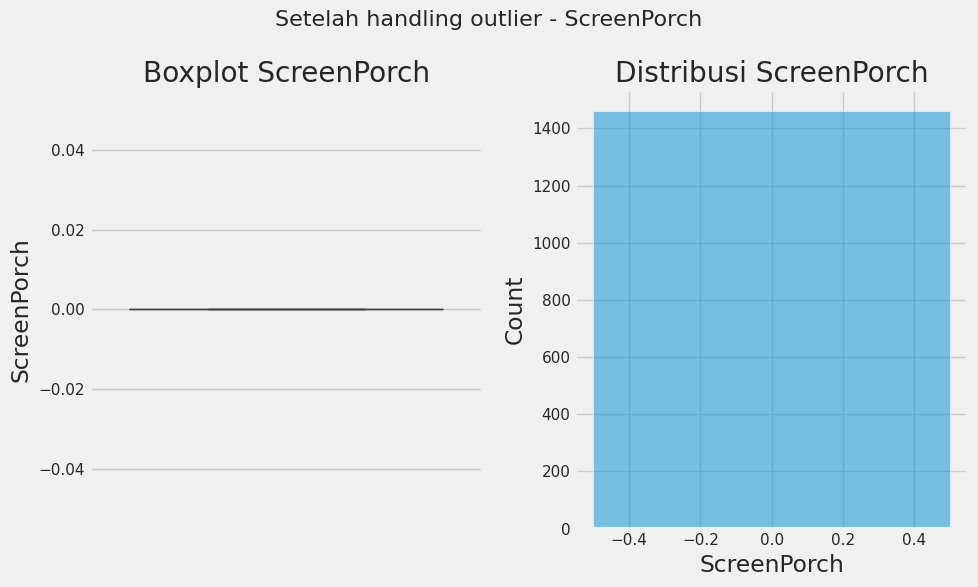

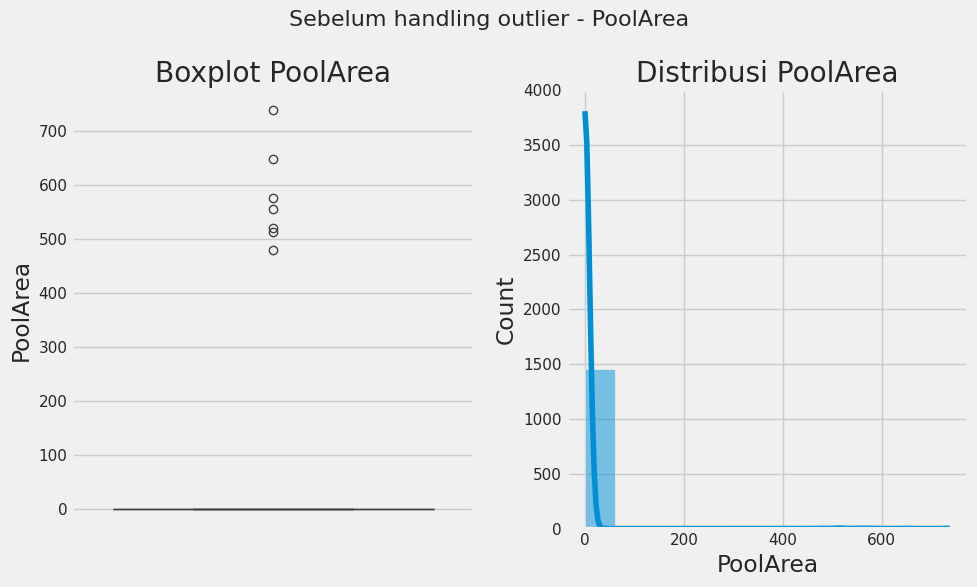

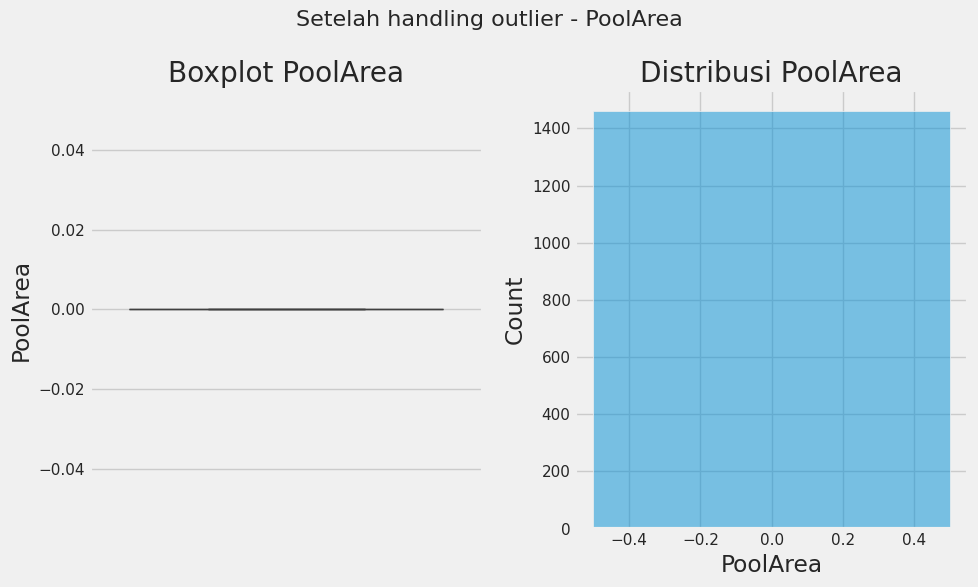

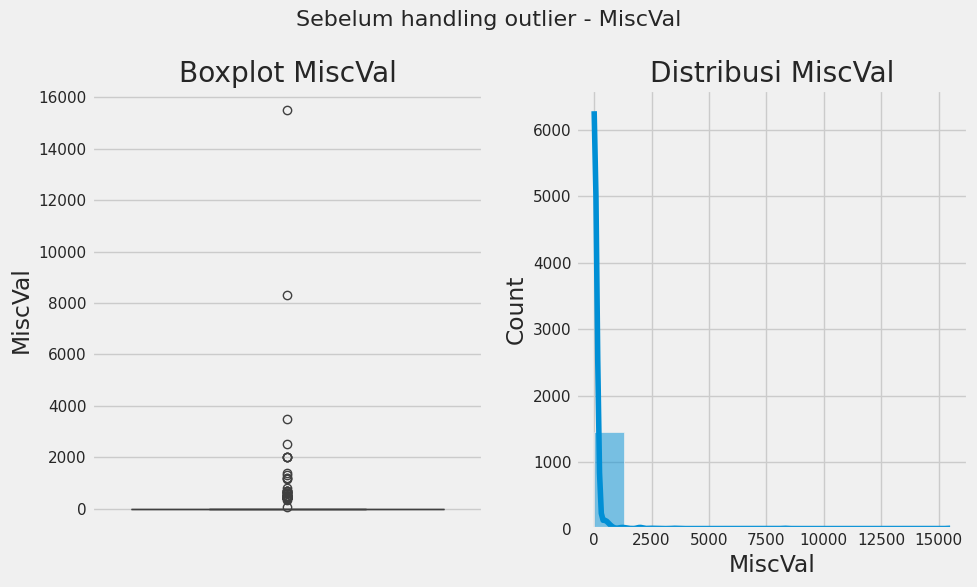

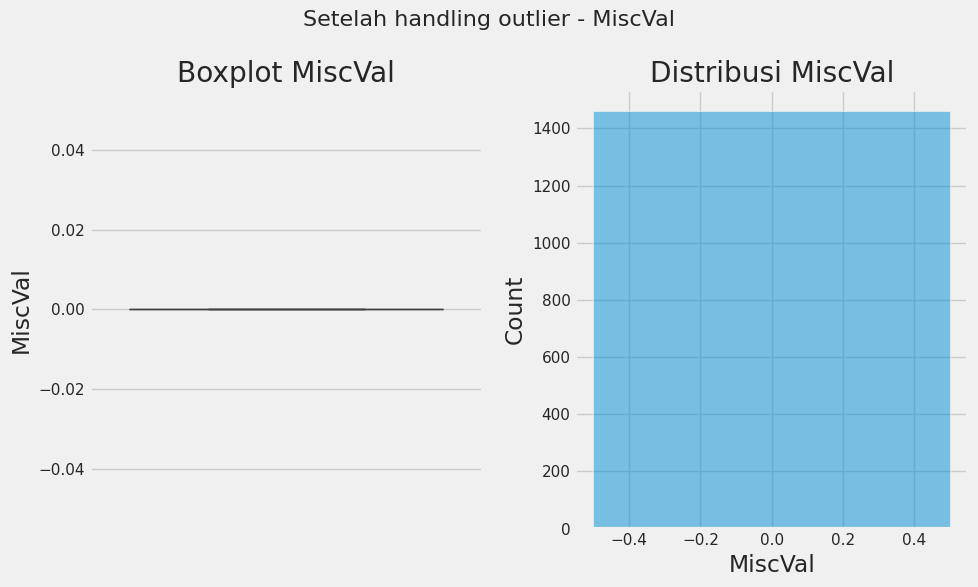

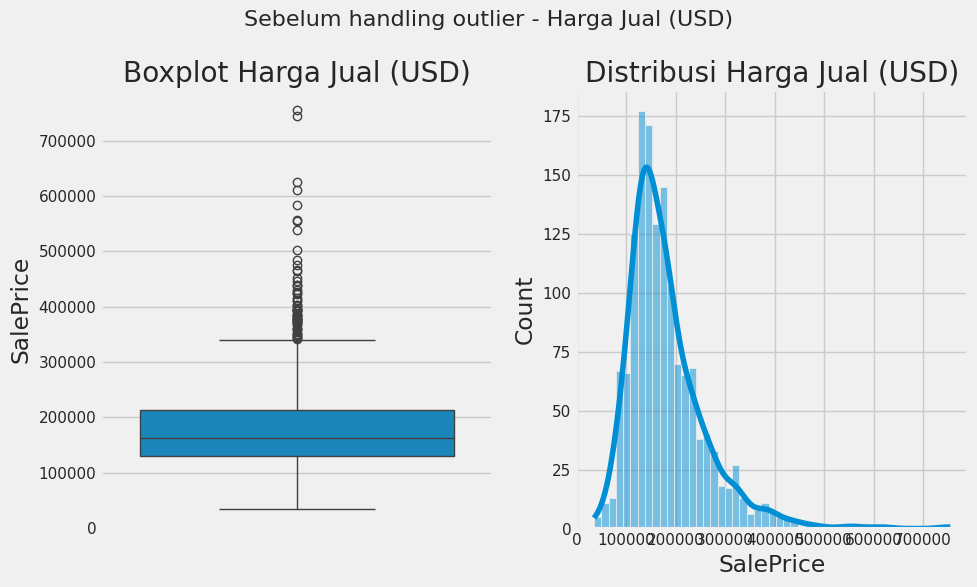

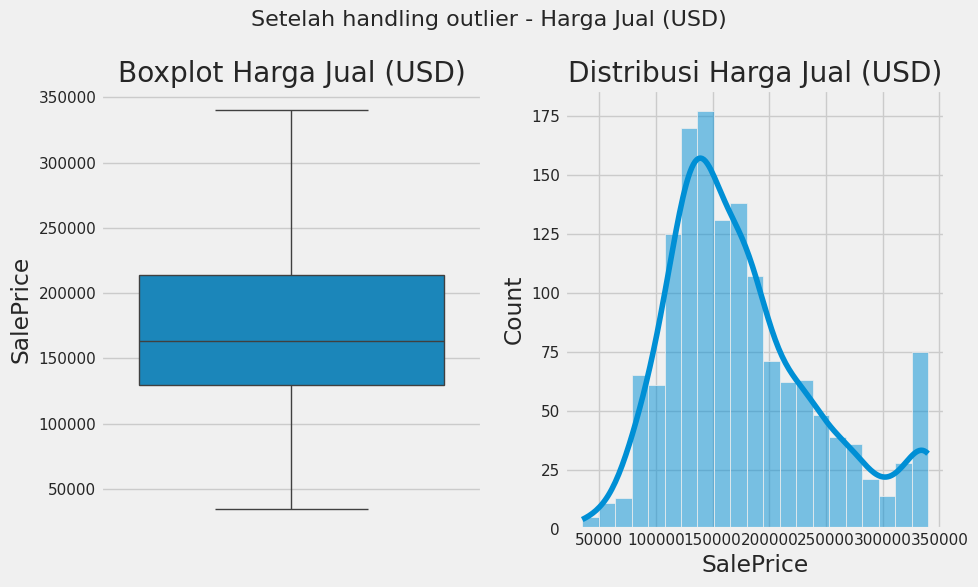

Hasil identifikasi outlier:
               jumlah_outlier  persentase_outlier
EnclosedPorch             208              14.247
BsmtFinSF2                167              11.438
OverallCond               125               8.562
ScreenPorch               116               7.945
MSSubClass                103               7.055
MasVnrArea                 98               6.712
LotFrontage                93               6.370
BsmtHalfBath               82               5.616
GarageYrBlt                81               5.548
OpenPorchSF                77               5.274
LotArea                    69               4.726
KitchenAbvGr               68               4.658
SalePrice                  61               4.178
TotalBsmtSF                61               4.178
MiscVal                    52               3.562
BedroomAbvGr               35               2.397
WoodDeckSF                 32               2.192
GrLivArea                  31               2.123
TotRmsAbvGrd          

In [ ]:
cleaned_data, outlier_summary = handle_all_numeric_outliers(
    train_data,
    numeric_cols,
    method='cap',  # bisa diganti dengan 'remove', 'impute_mean', atau 'impute_median'
    detection_method='iqr',  # bisa diganti dengan 'zscore'
    visualize=True  # set False jika tidak ingin visualisasi
)

In [ ]:
# Bandingkan statistik sebelum dan sesudah handling outlier
print("\nStatistik sebelum handling outlier:")
(train_data[numeric_cols].describe())


Statistik sebelum handling outlier:


Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1460.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.176  10516.828        6.099        5.575   
std    421.610      42.301       22.433   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       60.000   7553.500        5.000        5.000   
50%    730.500      50.000       70.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1460.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.117     443.640  ...      94.245   
std       30.203        20.645     180.731     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     164.250     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [ ]:
print("\nStatistik setelah handling outlier:")
(cleaned_data[numeric_cols].describe())


Statistik setelah handling outlier:


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1460.000  1460.000     1460.000     1460.000   
mean   730.500      55.086       69.468  9647.388        6.101        5.543   
std    421.610      37.508       18.024  3594.356        1.378        0.964   
min      1.000      20.000       30.000  1481.500        2.000        3.500   
25%    365.750      20.000       60.000  7553.500        5.000        5.000   
50%    730.500      50.000       70.000  9478.500        6.000        5.000   
75%   1095.250      70.000       80.000 11601.500        7.000        6.000   
max   1460.000     145.000      110.000 17673.500       10.000        7.500   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1460.000    1460.000  ...    1460.000   
mean    1971.268      1984.866      89.406     439.998  ...      91.807   
std       30.203        20.645     134.018     433.219  ...     116.658   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     164.250     712.250  ...     168.000   
max     2010.000      2010.000     410.625    1780.625  ...     420.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000 1460.000   
mean        42.603          0.000      0.000        0.000     0.000    0.000   
std         52.502          0.000      0.000        0.000     0.000    0.000   
min          0.000          0.000      0.000        0.000     0.000    0.000   
25%          0.000          0.000      0.000        0.000     0.000    0.000   
50%         25.000          0.000      0.000        0.000     0.000    0.000   
75%         68.000          0.000      0.000        0.000     0.000    0.000   
max        170.000          0.000      0.000        0.000     0.000    0.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 177331.526  
std      2.704    1.328  67205.836  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 340037.500  

[8 rows x 38 columns]

# **Univariate Analysis**

In [ ]:
def create_histograms_for_numeric(dataframe, numeric_cols, selected_cols=None, skip_cols=None):
    """
    Create histograms with boxplots for selected numeric columns in a dataframe

    Parameters:
    dataframe (pandas.DataFrame): The dataframe containing the data
    numeric_cols (list): List of numeric column names
    selected_cols (list, optional): Specific columns to visualize. Defaults to None (uses all numeric columns).
    skip_cols (list, optional): Columns to skip. Defaults to None.
    """
    # Filter columns
    if selected_cols is not None:
        cols_to_plot = [col for col in selected_cols if col in numeric_cols]
    else:
        cols_to_plot = numeric_cols.copy()

    # Skip specified columns
    if skip_cols is not None:
        cols_to_plot = [col for col in cols_to_plot if col not in skip_cols]

    for col in cols_to_plot:
        # Skip Id column
        if col.lower() == 'id':
            continue

        # Create histogram with boxplot
        fig = px.histogram(
            dataframe,
            x=col,
            marginal='box',
            color_discrete_sequence=['#0E2954'],
            nbins=50
        )

        fig.update_traces(
            marker_line_width=1,
            marker_line_color='white'
        )

        # Create descriptive title
        if col in descriptive_names:
            col_title = descriptive_names[col]
        else:
            col_title = col.replace('_', ' ').title()

        fig.update_layout(
            plot_bgcolor='rgba(0, 0, 0, 0)',
            title=dict(
                text=f"<b>Distribusi dan Nilai Ekstrim <span style='color:#0E2954'>{col_title}</b>",
                font=dict(
                    size=28,
                    color='#757882'
                ),
                y=0.92,
                x=0.5
            ),
            yaxis=dict(
                title='Frekuensi',
                showgrid=False,
                showline=False,
                showticklabels=True,
                zeroline=False,
            ),
            xaxis=dict(
                title=col_title,
                showgrid=False,
                showline=True,
                showticklabels=True,
                zeroline=False,
            ),
            margin=dict(
                t=80,
                b=10,
                r=20
            )
        )

        fig.show()

def create_countplots_for_categorical(dataframe, cat_cols, selected_cols=None, skip_cols=None, top_n=10):
    """
    Create countplots for selected categorical columns in a dataframe

    Parameters:
    dataframe (pandas.DataFrame): The dataframe containing the data
    cat_cols (list): List of categorical column names
    selected_cols (list, optional): Specific columns to visualize. Defaults to None (uses all categorical columns).
    skip_cols (list, optional): Columns to skip. Defaults to None.
    top_n (int, optional): Top N categories to display. Defaults to 10.
    """
    # Filter columns
    if selected_cols is not None:
        cols_to_plot = [col for col in selected_cols if col in cat_cols]
    else:
        cols_to_plot = cat_cols.copy()

    # Skip specified columns
    if skip_cols is not None:
        cols_to_plot = [col for col in cols_to_plot if col not in skip_cols]

    for col in cols_to_plot:
        # Count values
        value_counts = dataframe[col].value_counts()

        # Limit to top N if too many categories
        if len(value_counts) > top_n:
            # Get top categories
            value_counts = value_counts.head(top_n)
            title_suffix = f" (Top {top_n})"
        else:
            title_suffix = ""

        # Create the barplot
        fig = px.bar(
            x=value_counts.values,
            y=value_counts.index,
            orientation='h',
            color_discrete_sequence=['#0E2954']
        )

        # Create descriptive title
        if col in descriptive_names:
            col_title = descriptive_names[col]
        else:
            col_title = col.replace('_', ' ').title()

        fig.update_layout(
            plot_bgcolor='rgba(0, 0, 0, 0)',
            title=dict(
                text=f"<b>Distribusi <span style='color:#0E2954'>{col_title}{title_suffix}</b>",
                font=dict(
                    size=28,
                    color='#757882'
                ),
                y=0.92,
                x=0.5
            ),
            yaxis=dict(
                title=col_title,
                showgrid=False,
                showline=False,
                showticklabels=True,
                zeroline=False,
            ),
            xaxis=dict(
                title='Jumlah',
                showgrid=False,
                showline=True,
                showticklabels=True,
                zeroline=False,
            ),
            margin=dict(
                t=80,
                b=10,
                r=20
            )
        )

        # Add values on bars
        fig.update_traces(
            texttemplate='%{x}',
            textposition='outside'
        )

        fig.show()

# 5. FUNGSI UNTUK PLOT KORELASI ANTAR FITUR NUMERIK
# Fungsi untuk visualisasi matriks korelasi dengan Plotly

def plot_correlation_matrix_plotly(df, columns=None, min_correlation=0,
                                  include_target=True, target_col='SalePrice',
                                  width=1000, height=900):
    """
    Membuat heatmap korelasi interaktif untuk fitur-fitur numerik menggunakan Plotly

    Parameters:
    df (pandas.DataFrame): DataFrame yang berisi data
    columns (list, optional): Kolom-kolom yang akan diplot. Default: semua kolom numerik
    min_correlation (float, optional): Filter korelasi dengan nilai absolut minimal. Default: 0
    include_target (bool, optional): Apakah harus menyertakan kolom target. Default: True
    target_col (str, optional): Nama kolom target. Default: 'SalePrice'
    width (int, optional): Lebar plot. Default: 1000
    height (int, optional): Tinggi plot. Default: 900

    Returns:
    plotly.graph_objects.Figure: Figure Plotly yang dapat ditampilkan
    """
    import plotly.express as px
    import numpy as np
    import pandas as pd

    # Jika tidak ada kolom yang ditentukan, gunakan semua kolom numerik kecuali Id
    if columns is None:
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'Id' in numeric_cols:
            numeric_cols.remove('Id')
        columns = numeric_cols

    # Pastikan target_col ada dalam columns jika include_target=True
    if include_target and target_col not in columns and target_col in df.columns:
        columns = columns + [target_col]

    # Hitung korelasi
    correlation = df[columns].corr()

    # Filter korelasi berdasarkan nilai minimum
    if min_correlation > 0:
        # Buat mask untuk nilai korelasi yang lebih rendah dari min_correlation
        mask = np.abs(correlation) < min_correlation
        # Ganti nilai yang masuk mask dengan NaN
        correlation_filtered = correlation.copy()
        correlation_filtered = correlation_filtered.mask(mask)
        # Tetap jaga diagonal (korelasi diri sendiri = 1)
        np.fill_diagonal(correlation_filtered.values, 1)
        # Filter kolom-kolom yang memiliki minimal satu korelasi signifikan dengan kolom lain
        # Ini untuk menghindari kolom yang sepenuhnya NaN
        valid_columns = ~correlation_filtered.isna().all()
        valid_columns = valid_columns[valid_columns].index.tolist()

        # Jika include_target=True, pastikan target_col tetap ada
        if include_target and target_col not in valid_columns and target_col in df.columns:
            valid_columns = valid_columns + [target_col]

        # Filter correlation matrix
        correlation = correlation.loc[valid_columns, valid_columns]

    # Buat dictionary untuk nama deskriptif untuk setiap kolom
    descriptive_names = {
        'OverallQual': 'Kualitas Material dan Finishing Rumah',
        'OverallCond': 'Kondisi Umum Rumah',
        'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
        'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
        'GarageArea': 'Luas Garasi (sq.ft)',
        'YearBuilt': 'Tahun Pembangunan Rumah',
        'YearRemodAdd': 'Tahun Renovasi Terakhir',
        'SalePrice': 'Harga Jual (USD)',
        '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
        '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
        'LotArea': 'Luas Lahan (sq.ft)',
        'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
        'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
        'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
        'Fireplaces': 'Jumlah Perapian',
        'GarageCars': 'Kapasitas Garasi (Mobil)',
        'FullBath': 'Jumlah Kamar Mandi Lengkap',
        'HalfBath': 'Jumlah Kamar Mandi Setengah',
        'MoSold': 'Bulan Terjual',
        'YrSold': 'Tahun Terjual',
        'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
        'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    }

    # Buat label yang lebih deskriptif untuk axes
    labels = {col: descriptive_names.get(col, col.replace('_', ' ').title()) for col in correlation.columns}

    # Susun data untuk heatmap
    heat_data = correlation.values

    # Buat heatmap dengan Plotly
    fig = px.imshow(
        heat_data,
        x=correlation.columns,
        y=correlation.columns,
        color_continuous_scale='RdBu_r',  # Skala warna merah-biru terbalik
        zmin=-1,
        zmax=1,
        labels=dict(x="Fitur", y="Fitur", color="Korelasi"),
        width=width,
        height=height
    )

    # Tambahkan informasi korelasi pada hover
    hover_text = []
    for yi, yy in enumerate(correlation.columns):
        hover_text.append([])
        for xi, xx in enumerate(correlation.columns):
            hover_text[-1].append(f'{labels[yy]} vs {labels[xx]}<br>Korelasi: {correlation.iloc[yi, xi]:.2f}')

    fig.update(data=[{
        'hovertemplate': '%{hovertext}<extra></extra>',
        'text': hover_text,
        'hovertext': hover_text
    }])

    # Tambahkan nilai korelasi pada sel
    annotations = []
    for i, row in enumerate(correlation.columns):
        for j, col in enumerate(correlation.columns):
            if i >= j:  # Hanya tampilkan nilai di segitiga bawah dan diagonal
                annotations.append(
                    dict(
                        x=j,
                        y=i,
                        text=str(round(correlation.iloc[i, j], 2)),
                        showarrow=False,
                        font=dict(
                            color="black" if abs(correlation.iloc[i, j]) < 0.7 else "white"
                        )
                    )
                )

    fig.update_layout(
        title="Matriks Korelasi Antar Fitur",
        title_font_size=24,
        annotations=annotations,
        xaxis=dict(
            tickangle=-45,
            tickfont=dict(size=10),
            tickvals=list(range(len(correlation.columns))),
            ticktext=[labels[col] for col in correlation.columns]
        ),
        yaxis=dict(
            tickfont=dict(size=10),
            tickvals=list(range(len(correlation.columns))),
            ticktext=[labels[col] for col in correlation.columns]
        )
    )

    # Tampilkan heatmap
    return fig

# %%
# 6. FUNGSI UNTUK PLOT HUBUNGAN FITUR NUMERIK DENGAN TARGET
def plot_numeric_vs_target(df, target, features=None, n_cols=3, figsize=(20, 15)):
    """
    Membuat scatter plot untuk melihat hubungan antara fitur numerik dan target

    Parameters:
    df (pandas.DataFrame): DataFrame yang berisi data
    target (str): Nama kolom target
    features (list, optional): Kolom-kolom yang akan diplot. Default: semua kolom numerik
    n_cols (int, optional): Jumlah kolom dalam grid plot. Default: 3
    figsize (tuple, optional): Ukuran gambar. Default: (20, 15)
    """
    # Jika tidak ada fitur yang ditentukan, gunakan semua kolom numerik kecuali Id dan target
    if features is None:
        features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'Id' in features:
            features.remove('Id')
        if target in features:
            features.remove(target)

    # Hitung jumlah baris yang diperlukan dalam grid
    n_rows = (len(features) + n_cols - 1) // n_cols

    # Buat plot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ratakan axes jika perlu
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()

    # Loop untuk membuat plot untuk setiap fitur
    for i, feature in enumerate(features):
        # Dapatkan indeks untuk subplot
        if n_rows == 1 and n_cols == 1:
            ax = axes[0]
        elif n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            ax = axes[row_idx, col_idx]

        # Gunakan nama deskriptif jika ada
        feature_title = descriptive_names.get(feature, feature.replace('_', ' ').title())
        target_title = descriptive_names.get(target, target.replace('_', ' ').title())

        # Buat scatter plot
        sns.scatterplot(x=feature, y=target, data=df, alpha=0.5, color='#0E2954', ax=ax)

        # Tambahkan garis regresi
        sns.regplot(x=feature, y=target, data=df, scatter=False, color='red', ax=ax)

        # Set judul dan label
        ax.set_title(f'Hubungan {feature_title} dan {target_title}', fontsize=12)
        ax.set_xlabel(feature_title, fontsize=10)
        ax.set_ylabel(target_title, fontsize=10)

    # Sembunyikan plot yang tidak digunakan
    total_subplots = n_rows * n_cols
    for i in range(len(features), total_subplots):
        if n_rows == 1 and n_cols == 1:
            # Tidak perlu menyembunyikan jika hanya 1 subplot
            pass
        elif n_rows == 1 or n_cols == 1:
            axes[i].set_visible(False)
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            axes[row_idx, col_idx].set_visible(False)

    plt.tight_layout(h_pad=5, w_pad=3)
    plt.show()

# %%
# 7. FUNGSI UNTUK PLOT HUBUNGAN FITUR KATEGORIKAL DENGAN TARGET
def plot_categorical_vs_target(df, target, features=None, n_cols=3, figsize=(20, 15), top_n=10):
    """
    Membuat boxplot untuk melihat hubungan antara fitur kategorikal dan target

    Parameters:
    df (pandas.DataFrame): DataFrame yang berisi data
    target (str): Nama kolom target
    features (list, optional): Kolom-kolom yang akan diplot. Default: semua kolom kategorikal
    n_cols (int, optional): Jumlah kolom dalam grid plot. Default: 3
    figsize (tuple, optional): Ukuran gambar. Default: (20, 15)
    top_n (int, optional): Jumlah kategori teratas yang ditampilkan. Default: 10
    """
    # Jika tidak ada fitur yang ditentukan, gunakan semua kolom kategorikal
    if features is None:
        features = df.select_dtypes(include=['object']).columns.tolist()

    # Hitung jumlah baris yang diperlukan dalam grid
    n_rows = (len(features) + n_cols - 1) // n_cols

    # Buat plot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ratakan axes jika perlu
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()

    # Loop untuk membuat plot untuk setiap fitur
    for i, feature in enumerate(features):
        # Dapatkan indeks untuk subplot
        if n_rows == 1 and n_cols == 1:
            ax = axes[0]
        elif n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            ax = axes[row_idx, col_idx]

        # Gunakan nama deskriptif jika ada
        feature_title = descriptive_names.get(feature, feature.replace('_', ' ').title())
        target_title = descriptive_names.get(target, target.replace('_', ' ').title())

        # Hitung value counts
        value_counts = df[feature].value_counts()

        # Batasi jumlah kategori jika terlalu banyak
        if len(value_counts) > top_n:
            top_categories = value_counts.head(top_n).index
            # Buat kategori baru untuk "Lainnya"
            df_plot = df.copy()
            df_plot[feature] = df_plot[feature].apply(lambda x: x if x in top_categories else 'Lainnya')
            # Plot
            sns.boxplot(x=feature, y=target, data=df_plot, ax=ax, palette='Blues',
                       order=df_plot[feature].value_counts().index)
            ax.set_title(f'Hubungan {feature_title} dan {target_title} (Top {top_n})', fontsize=12)
        else:
            # Plot semua kategori jika jumlahnya tidak terlalu banyak
            sns.boxplot(x=feature, y=target, data=df, ax=ax, palette='Blues',
                      order=df[feature].value_counts().index)
            ax.set_title(f'Hubungan {feature_title} dan {target_title}', fontsize=12)

        # Set label
        ax.set_xlabel(feature_title, fontsize=10)
        ax.set_ylabel(target_title, fontsize=10)

        # Rotate x-axis labels if needed
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Sembunyikan plot yang tidak digunakan
    total_subplots = n_rows * n_cols
    for i in range(len(features), total_subplots):
        if n_rows == 1 and n_cols == 1:
            # Tidak perlu menyembunyikan jika hanya 1 subplot
            pass
        elif n_rows == 1 or n_cols == 1:
            axes[i].set_visible(False)
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            axes[row_idx, col_idx].set_visible(False)

    plt.tight_layout(h_pad=5, w_pad=3)
    plt.show()

# %%
# 8. FUNGSI UNTUK SCATTER PLOT 3D (PLOTLY)
def create_3d_scatter(dataframe, x_col, y_col, z_col, color_col=None):
    """
    Create 3D scatter plot to visualize relationships between 3 numerical features

    Parameters:
    dataframe (pandas.DataFrame): The dataframe containing the data
    x_col (str): Column name for X axis
    y_col (str): Column name for Y axis
    z_col (str): Column name for Z axis
    color_col (str, optional): Column name for color coding. Defaults to None.
    """
    # Get descriptive titles
    x_title = descriptive_names.get(x_col, x_col.replace('_', ' ').title())
    y_title = descriptive_names.get(y_col, y_col.replace('_', ' ').title())
    z_title = descriptive_names.get(z_col, z_col.replace('_', ' ').title())

    # Create 3D scatter plot
    if color_col:
        color_title = descriptive_names.get(color_col, color_col.replace('_', ' ').title())
        fig = px.scatter_3d(
            dataframe,
            x=x_col,
            y=y_col,
            z=z_col,
            color=color_col,
            labels={
                x_col: x_title,
                y_col: y_title,
                z_col: z_title,
                color_col: color_title
            },
            title=f"Hubungan 3D antara {x_title}, {y_title}, dan {z_title}"
        )
    else:
        fig = px.scatter_3d(
            dataframe,
            x=x_col,
            y=y_col,
            z=z_col,
            labels={
                x_col: x_title,
                y_col: y_title,
                z_col: z_title
            },
            title=f"Hubungan 3D antara {x_title}, {y_title}, dan {z_title}"
        )

    fig.update_layout(
        title_font_size=20,
        scene=dict(
            xaxis_title=x_title,
            yaxis_title=y_title,
            zaxis_title=z_title
        )
    )

    fig.show()

In [ ]:
additional_numeric_features = ['SalePrice','1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr']
create_histograms_for_numeric(
    cleaned_data,
    numeric_cols,
    selected_cols=additional_numeric_features,
    skip_cols=['Id']
)

In [ ]:
# Contoh penggunaan fungsi untuk visualisasi kategorikal dengan plotly
additional_categorical_features = ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageType', 'SaleCondition']
create_countplots_for_categorical(
    cleaned_data,
    categorical_cols,
    selected_cols=additional_categorical_features,
    top_n=10
)

# **Multivariate Analysis**

In [ ]:
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
fig2 = plot_correlation_matrix_plotly(cleaned_data, columns=key_features, min_correlation=0)
fig2.show()

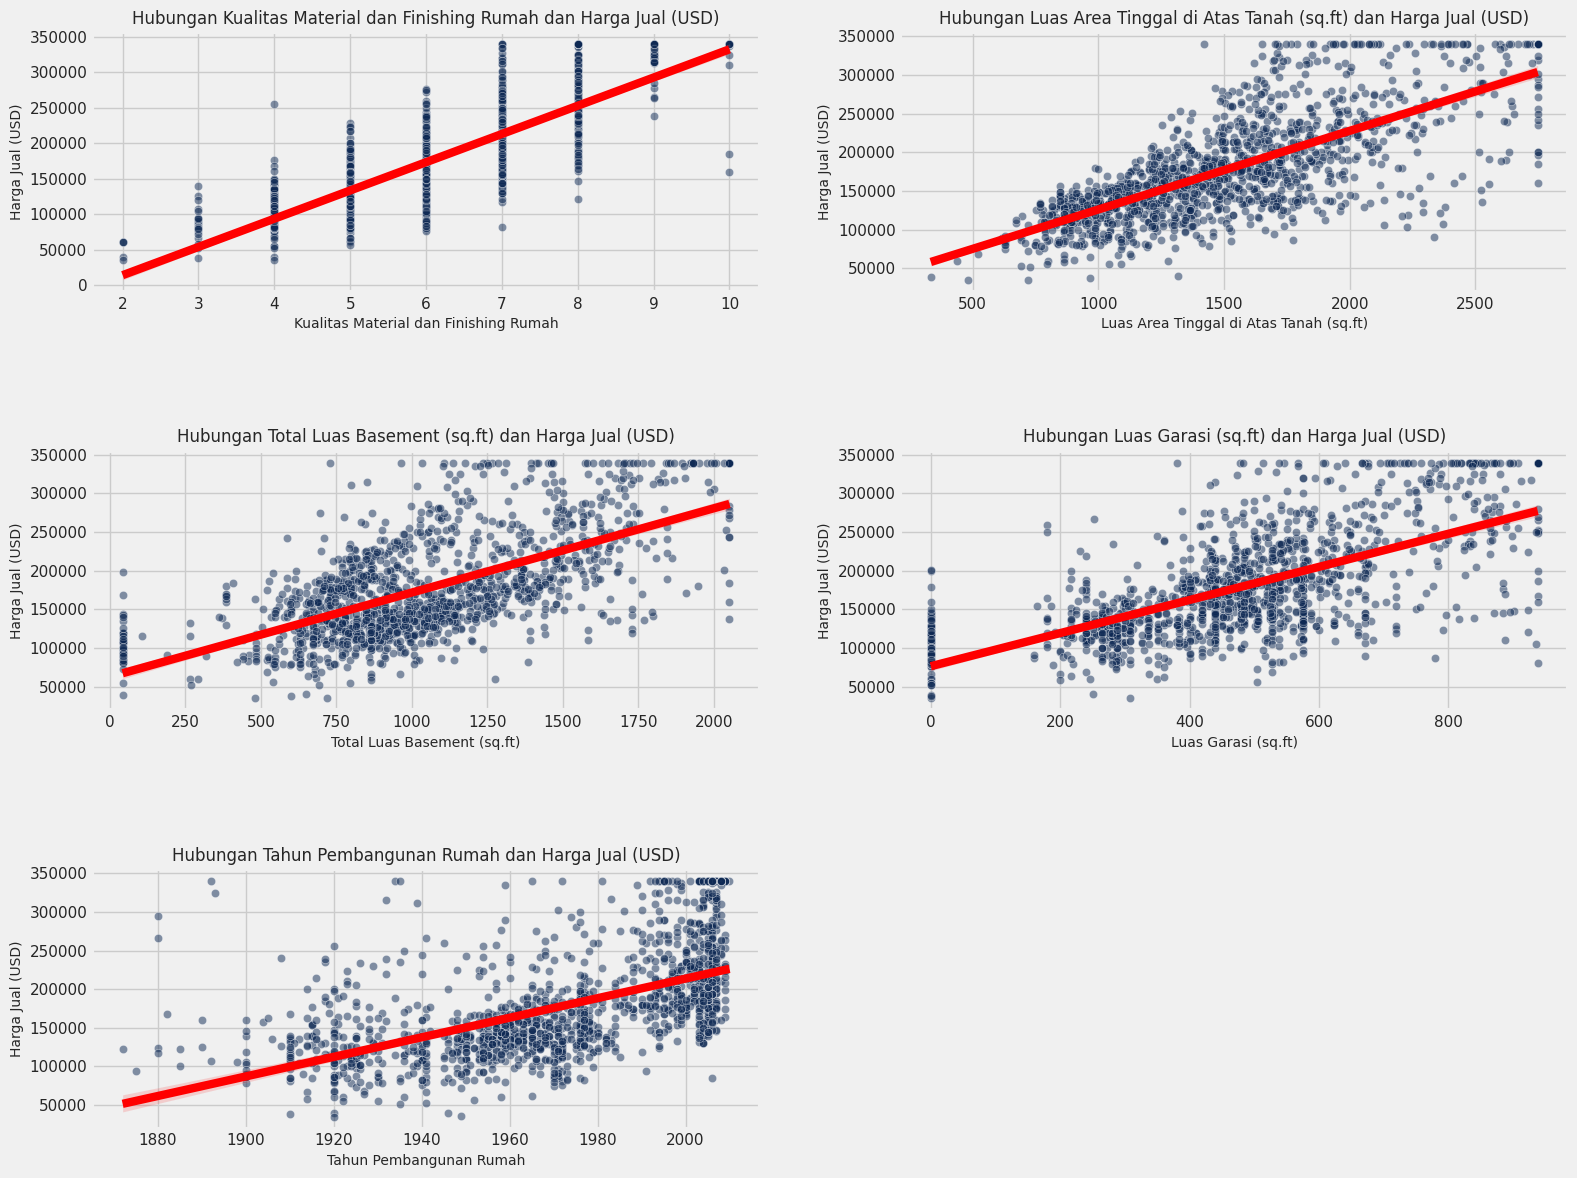

In [ ]:
# Contoh penggunaan fungsi untuk hubungan fitur numerik dengan target
key_numeric_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
plot_numeric_vs_target(cleaned_data, 'SalePrice', features=key_numeric_features, n_cols=2, figsize=(16, 12))


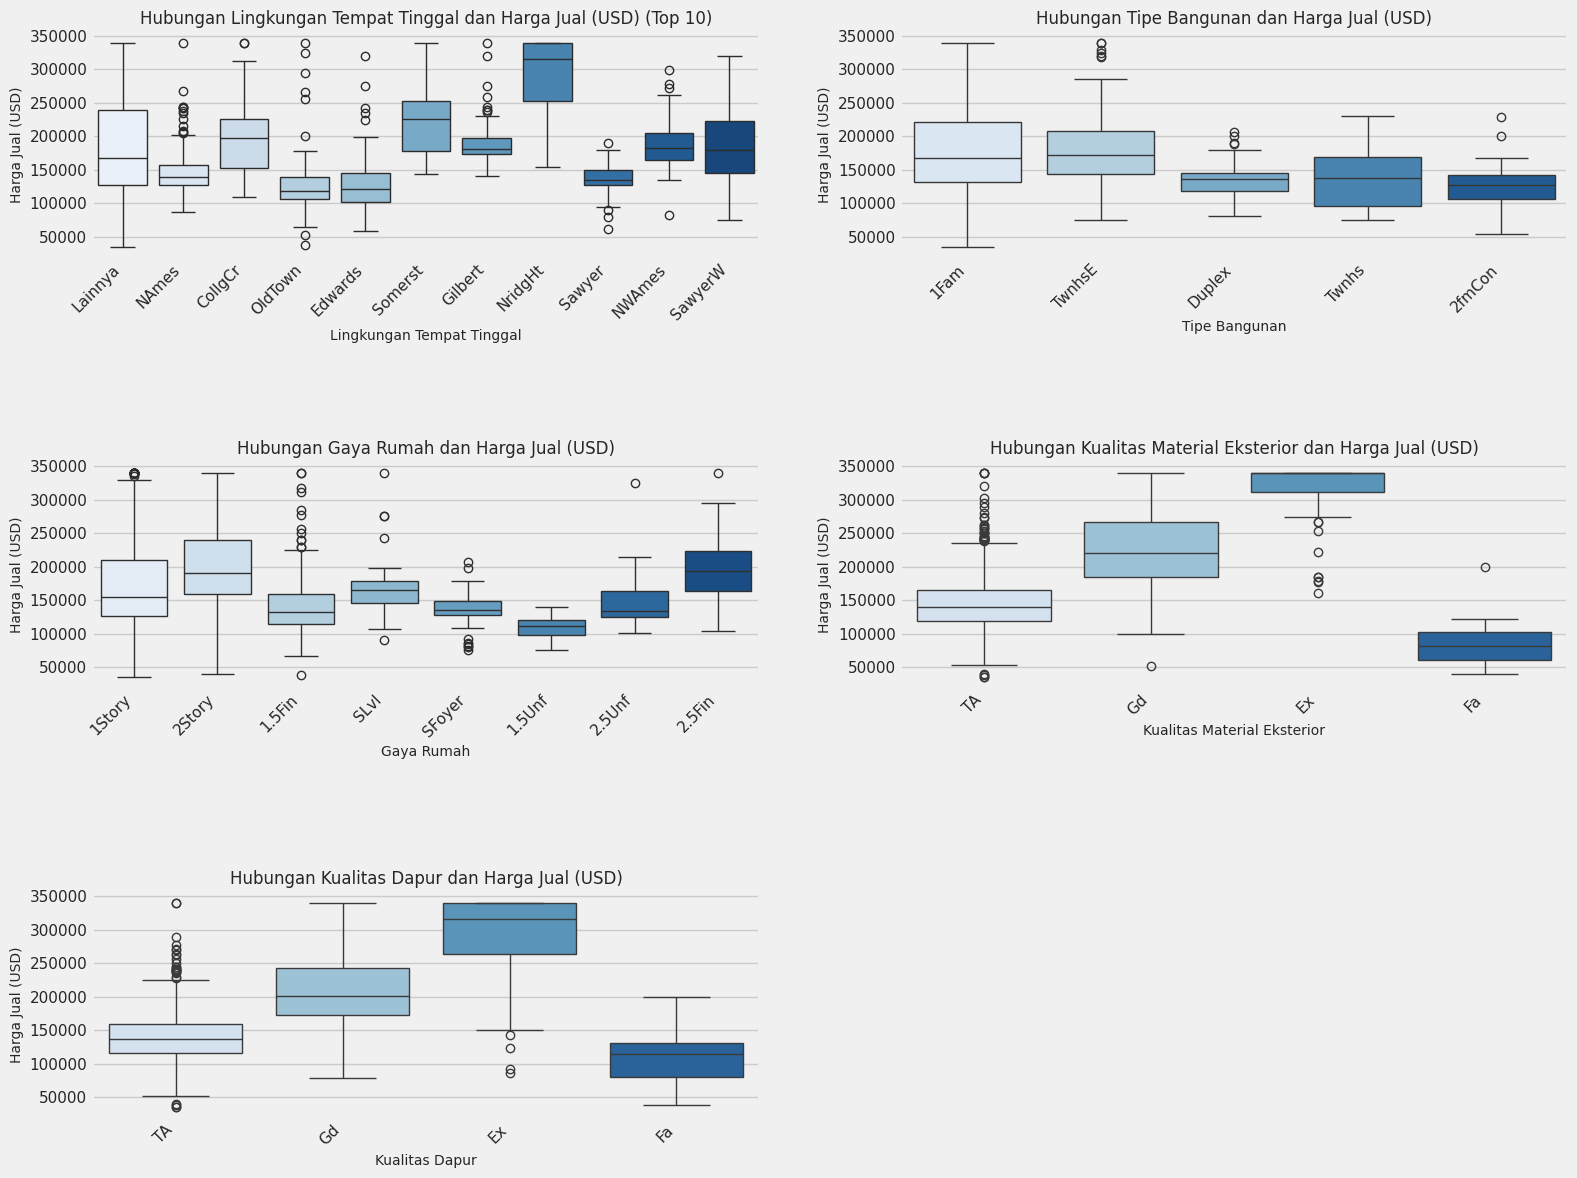

In [ ]:
# Contoh penggunaan fungsi untuk hubungan fitur kategorikal dengan target
key_categorical_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'KitchenQual']
plot_categorical_vs_target(cleaned_data, 'SalePrice', features=key_categorical_features, n_cols=2, figsize=(16, 12))


# **Feature Engineering**

In [ ]:
train_ID = cleaned_data['Id']
test_ID = test_data['Id']
target = cleaned_data['SalePrice']

In [ ]:
# Gabungkan data untuk preprocessing
all_data = pd.concat([cleaned_data.drop(['Id', 'SalePrice'], axis=1),
                      test_data.drop(['Id'], axis=1)])

In [ ]:
print(f"Total baris dataset gabungan: {all_data.shape[0]}")
print(f"Total kolom dataset gabungan: {all_data.shape[1]}")

Total baris dataset gabungan: 2919
Total kolom dataset gabungan: 79


## **1.1 Transformasi Log untuk Fitur dengan Distribusi Miring**

Distribusi yang sangat miring dapat memengaruhi performa model. Transformasi log membantu membuat distribusi lebih mendekati normal.


In [ ]:
def apply_log_transform(df, numeric_cols=None, skew_threshold=0.75, plot=True, n_cols=3, figsize=(18, 15)):
    """
    Menerapkan transformasi log pada fitur numerik dengan skewness di atas threshold

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    numeric_cols : list, optional
        Kolom-kolom numerik yang akan diperiksa. Default: semua kolom numerik
    skew_threshold : float, optional
        Threshold skewness untuk melakukan transformasi. Default: 0.75
    plot : bool, optional
        Apakah akan membuat plot perbandingan sebelum dan sesudah. Default: True
    n_cols : int, optional
        Jumlah kolom dalam grid plot. Default: 3
    figsize : tuple, optional
        Ukuran gambar. Default: (18, 15)

    Returns:
    --------
    pandas.DataFrame
        DataFrame dengan fitur-fitur yang sudah ditransformasi
    list
        Nama fitur-fitur yang ditransformasi
    """
    # Copy DataFrame untuk menghindari modifikasi pada original
    df_result = df.copy()

    # Jika tidak ada kolom yang ditentukan, gunakan semua kolom numerik
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Hitung skewness untuk semua kolom numerik
    skewed_feats = df[numeric_cols].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)

    # Identifikasi fitur yang skewed di atas threshold
    high_skew = skewed_feats[abs(skewed_feats) > skew_threshold]
    skewed_features = high_skew.index.tolist()

    # Dictionary untuk menyimpan data sebelum transformasi (untuk plot)
    before_transform = {}

    # Terapkan transformasi log(x+1) pada fitur-fitur yang skewed
    for feat in skewed_features:
        # Simpan data sebelum transformasi
        if plot:
            before_transform[feat] = df_result[feat].copy()

        # Tangani nilai negatif atau nol
        min_val = df_result[feat].min()
        if min_val <= 0:
            # Jika ada nilai <= 0, tambahkan offset sebelum log transform
            offset = abs(min_val) + 1 if min_val < 0 else 1
            df_result[feat] = np.log1p(df_result[feat] + offset)
        else:
            # Jika semua nilai positif, gunakan log1p biasa
            df_result[feat] = np.log1p(df_result[feat])

    # Plot perbandingan distribusi sebelum dan sesudah transformasi
    if plot and skewed_features:
        # Hitung jumlah baris yang diperlukan dalam grid
        n_rows = (len(skewed_features) + n_cols - 1) // n_cols

        # Buat plot grid
        fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=figsize)

        # Ratakan axes
        axes = axes.flatten()

        # Loop untuk membuat plot untuk setiap fitur
        for i, feat in enumerate(skewed_features):
            # Plot distribusi sebelum transformasi
            sns.histplot(before_transform[feat].dropna(), kde=True, ax=axes[i*2], color='#0E2954')
            axes[i*2].set_title(f'Sebelum Log Transform: {feat}', fontsize=12)
            axes[i*2].set_xlabel(feat, fontsize=10)
            axes[i*2].set_ylabel('Frekuensi', fontsize=10)

            # Plot distribusi setelah transformasi
            sns.histplot(df_result[feat].dropna(), kde=True, ax=axes[i*2+1], color='#ff6d00')
            axes[i*2+1].set_title(f'Setelah Log Transform: {feat}', fontsize=12)
            axes[i*2+1].set_xlabel(f'Log({feat})', fontsize=10)
            axes[i*2+1].set_ylabel('Frekuensi', fontsize=10)

        # Sembunyikan subplot yang tidak digunakan
        for j in range(len(skewed_features)*2, n_rows*n_cols*2):
            axes[j].set_visible(False)

        plt.tight_layout(h_pad=3, w_pad=3)
        plt.show()

        # Cetak informasi fitur-fitur yang ditransformasi
        print(f"Jumlah fitur yang ditransformasi: {len(skewed_features)}")
        print(f"Fitur-fitur yang ditransformasi: {skewed_features}")

    return df_result, skewed_features

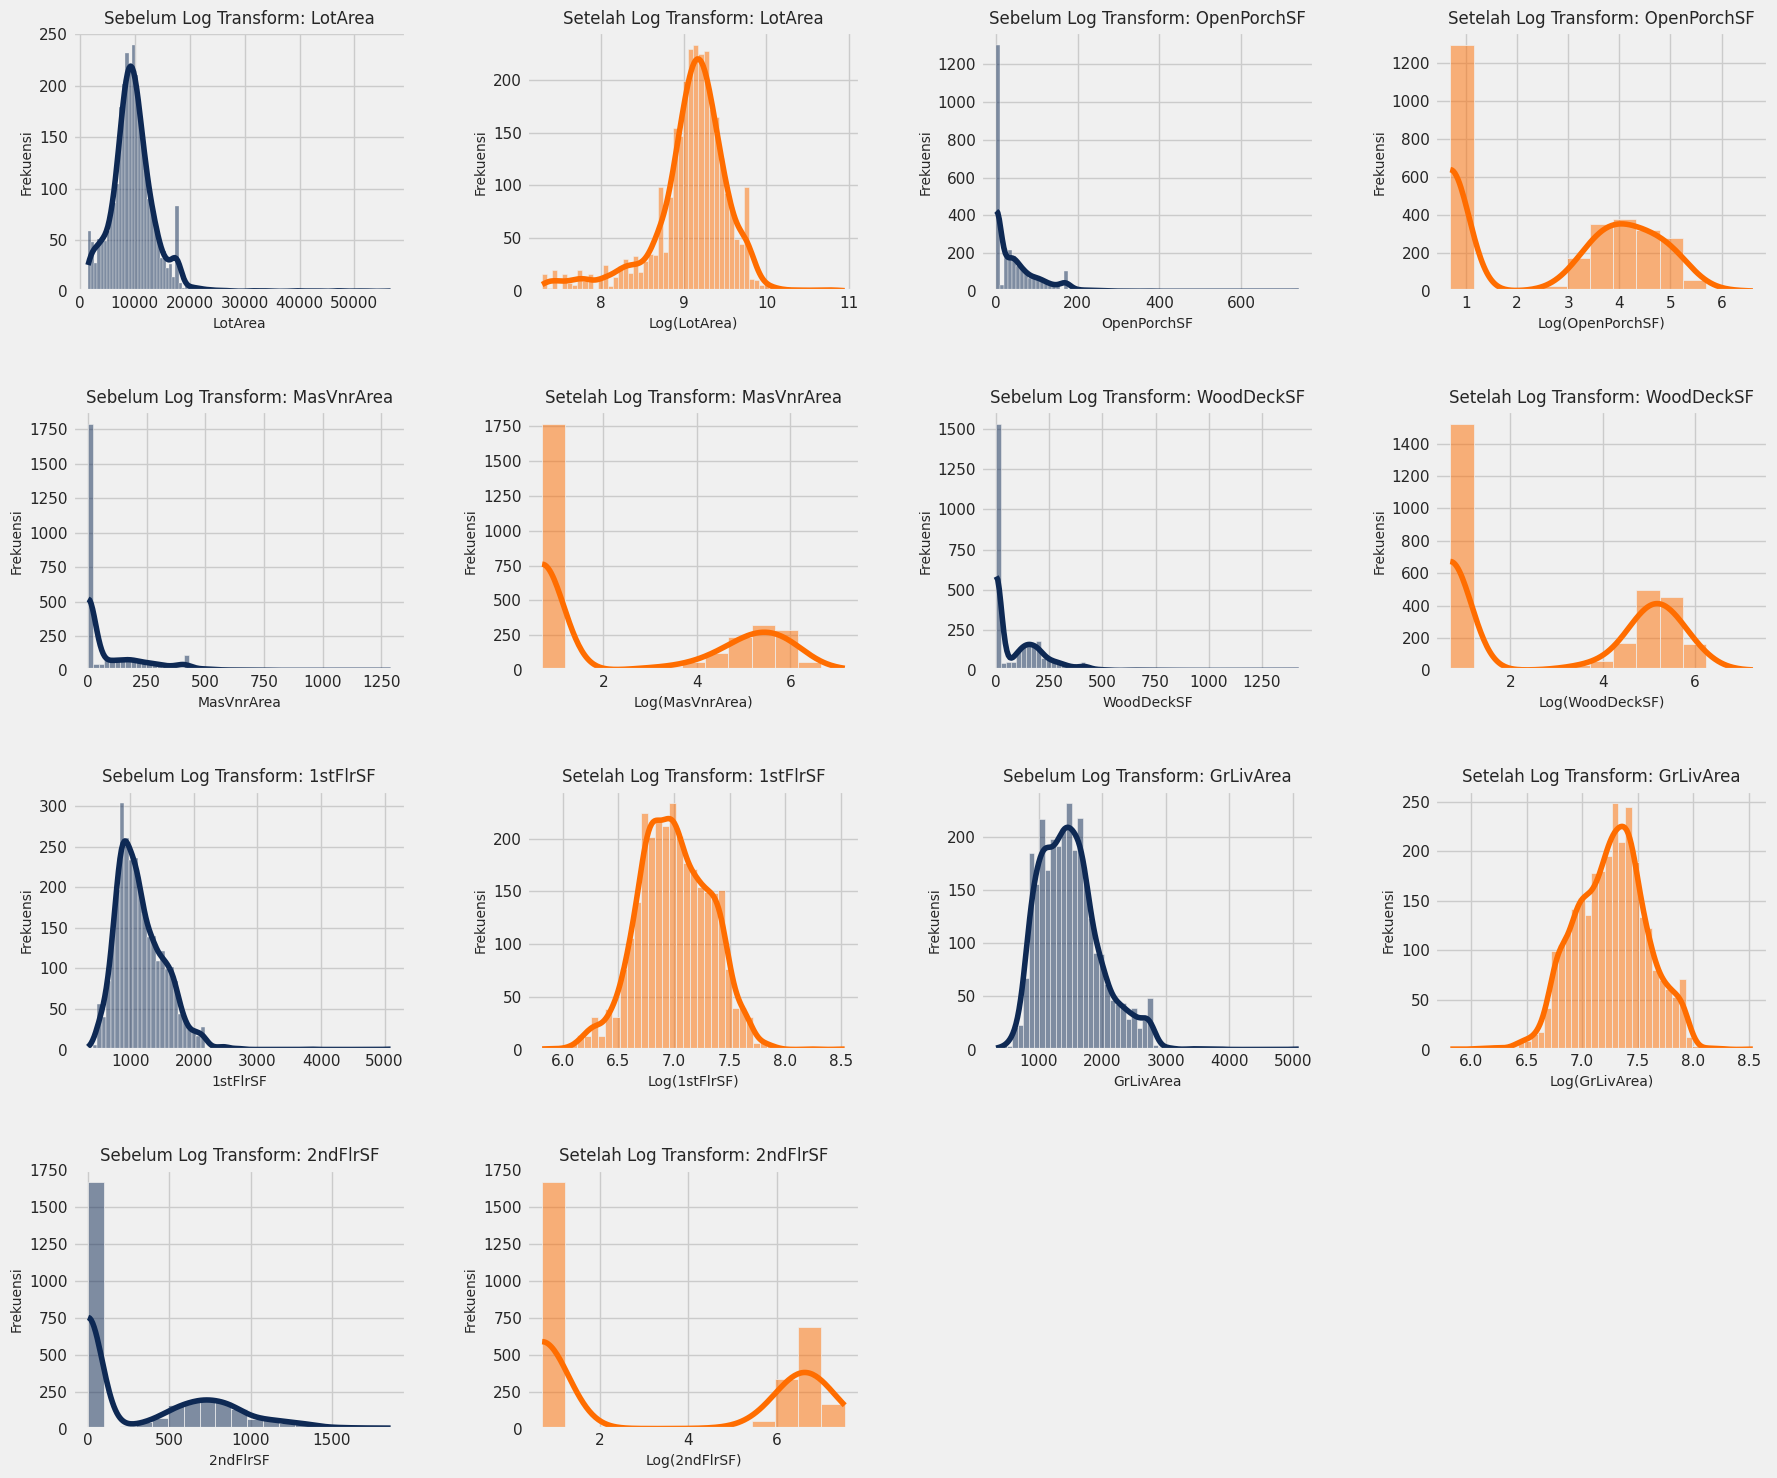

Jumlah fitur yang ditransformasi: 7
Fitur-fitur yang ditransformasi: ['LotArea', 'OpenPorchSF', 'MasVnrArea', 'WoodDeckSF', '1stFlrSF', 'GrLivArea', '2ndFlrSF']


In [ ]:
# Pilih beberapa fitur numerik yang cenderung skewed
numeric_columns = ['LotArea', 'LotFrontage', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
                   '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

all_data_log_transformed, transformed_features = apply_log_transform(
    all_data,
    numeric_cols=numeric_columns,
    skew_threshold=0.75,
    n_cols=2
)

## **1.2 Konversi Fitur Ordinal ke Numerik**

In [ ]:
def convert_ordinal_features(df):
    """
    Mengkonversi fitur-fitur ordinal ke numerik

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data

    Returns:
    --------
    pandas.DataFrame
        DataFrame dengan fitur-fitur ordinal yang sudah dikonversi
    """
    # Copy DataFrame untuk menghindari modifikasi pada original
    df_result = df.copy()

    # 1. Mapping untuk fitur-fitur kualitas (ExterQual, ExterCond, BsmtQual, dll.)
    quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'None': 0, 'NA': 0}
    quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

    for col in quality_cols:
        if col in df_result.columns:
            df_result[col] = df_result[col].fillna('None').map(quality_map)

    # 2. Mapping untuk BsmtExposure
    exposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'NA': 0}
    if 'BsmtExposure' in df_result.columns:
        df_result['BsmtExposure'] = df_result['BsmtExposure'].fillna('None').map(exposure_map)

    # 3. Mapping untuk BsmtFinType1 dan BsmtFinType2
    finish_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'NA': 0}
    if 'BsmtFinType1' in df_result.columns:
        df_result['BsmtFinType1'] = df_result['BsmtFinType1'].fillna('None').map(finish_map)
    if 'BsmtFinType2' in df_result.columns:
        df_result['BsmtFinType2'] = df_result['BsmtFinType2'].fillna('None').map(finish_map)

    # 4. Mapping untuk GarageFinish
    garage_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3, 'NA': 0}
    if 'GarageFinish' in df_result.columns:
        df_result['GarageFinish'] = df_result['GarageFinish'].fillna('None').map(garage_map)

    # 5. Mapping untuk Fence
    fence_map = {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4, 'NA': 0}
    if 'Fence' in df_result.columns:
        df_result['Fence'] = df_result['Fence'].fillna('None').map(fence_map)

    # 6. Mapping untuk Functional
    functional_map = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8, 'NA': 0}
    if 'Functional' in df_result.columns:
        df_result['Functional'] = df_result['Functional'].fillna('None').map(functional_map)

    # 7. Mapping untuk LotShape
    lotshape_map = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
    if 'LotShape' in df_result.columns:
        df_result['LotShape'] = df_result['LotShape'].map(lotshape_map)

    # 8. Mapping untuk LandSlope
    landslope_map = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
    if 'LandSlope' in df_result.columns:
        df_result['LandSlope'] = df_result['LandSlope'].map(landslope_map)

    # 9. Mapping untuk Season
    season_map = {'Winter': 1, 'Fall': 2, 'Spring': 3, 'Summer': 4}
    if 'Season' in df_result.columns:
        df_result['Season'] = df_result['Season'].map(season_map)

    # 10. Mapping untuk PavedDrive
    paved_map = {'N': 0, 'P': 1, 'Y': 2}
    if 'PavedDrive' in df_result.columns:
        df_result['PavedDrive'] = df_result['PavedDrive'].map(paved_map)

    # Tampilkan informasi fitur-fitur yang dikonversi
    ordinal_features = quality_cols + ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                      'GarageFinish', 'Fence', 'Functional', 'LotShape',
                                      'LandSlope', 'Season', 'PavedDrive']

    print(f"Jumlah fitur ordinal yang dikonversi: {len(ordinal_features)}")
    print(f"Fitur-fitur ordinal yang dikonversi: {ordinal_features}")

    return df_result

In [ ]:
all_data_ordinal_converted = convert_ordinal_features(all_data_log_transformed)


Jumlah fitur ordinal yang dikonversi: 20
Fitur-fitur ordinal yang dikonversi: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Fence', 'Functional', 'LotShape', 'LandSlope', 'Season', 'PavedDrive']


In [ ]:
print("\nStatistik deskriptif untuk beberapa fitur ordinal yang dikonversi:")
all_data_ordinal_converted[['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageQual', 'LotShape']].describe()



Statistik deskriptif untuk beberapa fitur ordinal yang dikonversi:


ExterQual  KitchenQual  BsmtQual  GarageQual  LotShape
count   2919.000     2919.000  2919.000    2919.000  2919.000
mean       3.397        3.511     3.478       2.801     3.600
std        0.580        0.662     0.905       0.716     0.570
min        2.000        2.000     0.000       0.000     1.000
25%        3.000        3.000     3.000       3.000     3.000
50%        3.000        3.000     4.000       3.000     4.000
75%        4.000        4.000     4.000       3.000     4.000
max        5.000        5.000     5.000       5.000     4.000

# **Feature Selection**

Feature Selection adalah proses memilih subset fitur yang paling relevant dengan variabel target. Ini membantu mengurangi dimensi, menghindari overfitting, dan meningkatkan interpretabilitas model.


## **2.1 One-Hot Encoding untuk Fitur Kategorikal**

Mengubah fitur kategorikal menjadi representasi biner yang dapat dipahami oleh model machine learning.


In [ ]:
def apply_one_hot_encoding(df, categorical_cols=None, drop_first=True, max_categories=10):
    """
    Menerapkan one-hot encoding pada fitur-fitur kategorikal

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    categorical_cols : list, optional
        Kolom-kolom kategorikal yang akan di-encode. Default: semua kolom object
    drop_first : bool, optional
        Apakah akan menghapus kolom pertama untuk menghindari multikolinearitas. Default: True
    max_categories : int, optional
        Maksimum kategori yang akan di-encode. Jika lebih, gunakan encoding lain. Default: 10

    Returns:
    --------
    pandas.DataFrame
        DataFrame dengan fitur-fitur kategorikal yang sudah di-encode
    """
    # Copy DataFrame untuk menghindari modifikasi pada original
    df_result = df.copy()

    # Jika tidak ada kolom yang ditentukan, gunakan semua kolom kategorikal
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Fitur yang akan diproses dengan one-hot encoding
    ohe_features = []

    # Fitur yang akan diproses dengan label encoding
    le_features = []

    # Cek jumlah kategori unik untuk setiap fitur
    for col in categorical_cols:
        if col in df_result.columns:
            n_unique = df_result[col].nunique()

            # Jika jumlah kategori <= max_categories, gunakan one-hot encoding
            if n_unique <= max_categories:
                ohe_features.append(col)
            # Jika jumlah kategori > max_categories, gunakan label encoding
            else:
                le_features.append(col)

    # Terapkan one-hot encoding untuk fitur-fitur dengan kategori sedikit
    for col in ohe_features:
        # Buat dummy variables
        dummies = pd.get_dummies(df_result[col], prefix=col, drop_first=drop_first)

        # Tambahkan dummy variables ke DataFrame hasil
        df_result = pd.concat([df_result, dummies], axis=1)

        # Hapus kolom original
        df_result.drop(col, axis=1, inplace=True)

    # Terapkan label encoding untuk fitur-fitur dengan kategori banyak
    for col in le_features:
        # Inisialisasi LabelEncoder
        le = LabelEncoder()

        # Fit dan transform kolom
        df_result[col + '_encoded'] = le.fit_transform(df_result[col].astype(str))

        # Hapus kolom original
        df_result.drop(col, axis=1, inplace=True)

    # Tampilkan informasi encoding
    print(f"Jumlah fitur dengan one-hot encoding: {len(ohe_features)}")
    print(f"Fitur-fitur dengan one-hot encoding: {ohe_features}")

    print(f"\nJumlah fitur dengan label encoding: {len(le_features)}")
    print(f"Fitur-fitur dengan label encoding: {le_features}")

    print(f"\nTotal kolom setelah encoding: {df_result.shape[1]}")

    return df_result

In [ ]:
remaining_cat_cols = all_data_ordinal_converted.select_dtypes(include=['object']).columns.tolist()
print(f"Fitur kategorikal yang tersisa: {remaining_cat_cols}")


Fitur kategorikal yang tersisa: ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
all_data_encoded = apply_one_hot_encoding(all_data_ordinal_converted, categorical_cols=remaining_cat_cols)


Jumlah fitur dengan one-hot encoding: 21
Fitur-fitur dengan one-hot encoding: ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

Jumlah fitur dengan label encoding: 3
Fitur-fitur dengan label encoding: ['Neighborhood', 'Exterior1st', 'Exterior2nd']

Total kolom setelah encoding: 152


## **2.2 Seleksi Fitur Berdasarkan Korelasi dan Pentingnya Fitur**

Memilih fitur-fitur yang memiliki hubungan paling kuat dengan variabel target.


In [ ]:
def select_features_by_correlation(df, target, threshold=0.05, method='pearson', plot=True, figsize=(12, 8)):
    """
    Memilih fitur berdasarkan korelasi dengan target

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    target : pandas.Series
        Variabel target
    threshold : float, optional
        Threshold korelasi minimum. Default: 0.05
    method : str, optional
        Metode korelasi ('pearson', 'spearman', 'kendall'). Default: 'pearson'
    plot : bool, optional
        Apakah akan membuat plot korelasi. Default: True
    figsize : tuple, optional
        Ukuran gambar. Default: (12, 8)

    Returns:
    --------
    list
        List fitur-fitur yang memiliki korelasi >= threshold dengan target
    """
    # Gabungkan data dengan target untuk menghitung korelasi
    df_with_target = df.copy()
    df_with_target['target'] = target.reset_index(drop=True)

    # Hitung korelasi
    correlation = df_with_target.corr(method=method)['target'].sort_values(ascending=False)

    # Filter berdasarkan threshold
    selected_features = correlation[abs(correlation) >= threshold].index.tolist()

    # Hapus target dari list fitur
    if 'target' in selected_features:
        selected_features.remove('target')

    # Plot korelasi
    if plot:
        plt.figure(figsize=figsize)

        # Batasi jumlah fitur yang ditampilkan jika terlalu banyak
        if len(selected_features) > 30:
            top_features = correlation[abs(correlation) >= threshold].nlargest(30).index.tolist()
            if 'target' in top_features:
                top_features.remove('target')

            sns.barplot(x=correlation[top_features], y=top_features, palette='Blues_r')
            plt.title(f'Top 30 Fitur dengan Korelasi Tertinggi dengan Target ({method.capitalize()})', fontsize=16)
        else:
            sns.barplot(x=correlation[selected_features], y=selected_features, palette='Blues_r')
            plt.title(f'Fitur-fitur dengan Korelasi >= {threshold} dengan Target ({method.capitalize()})', fontsize=16)

        plt.xlabel('Koefisien Korelasi', fontsize=12)
        plt.ylabel('Fitur', fontsize=12)
        plt.tight_layout()
        plt.show()

    print(f"Jumlah fitur yang dipilih berdasarkan korelasi (threshold={threshold}): {len(selected_features)}")

    return selected_features


In [ ]:
train_processed = all_data_encoded.iloc[:len(train_data)]
test_processed = all_data_encoded.iloc[len(train_data):]


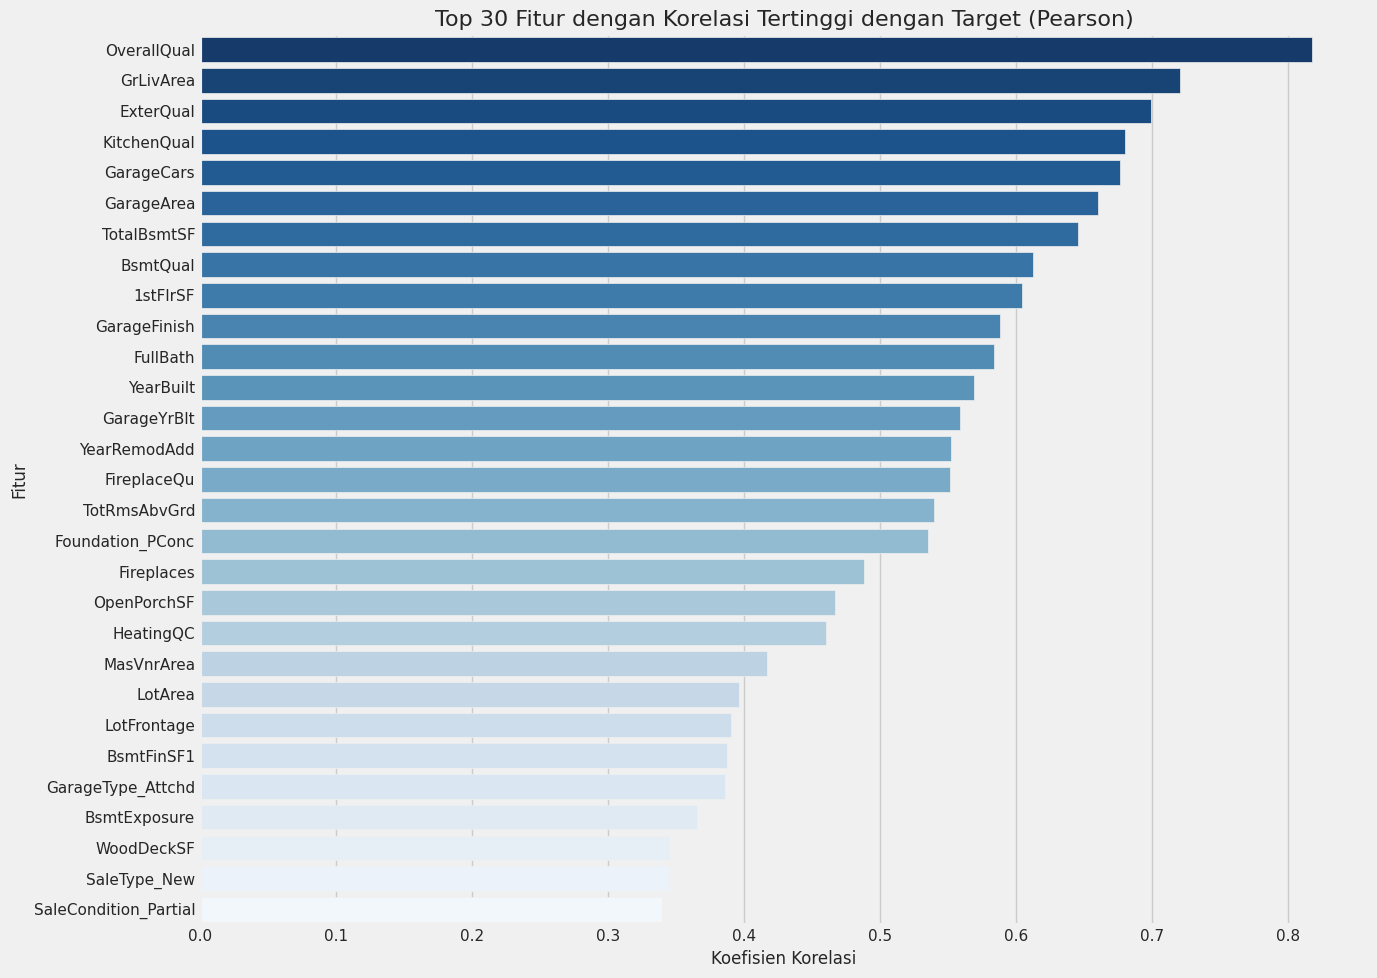

Jumlah fitur yang dipilih berdasarkan korelasi (threshold=0.1): 77


In [ ]:
# Pastikan index target diatur ulang agar sesuai dengan train_processed
target_reset = target.reset_index(drop=True)
selected_features_correlation = select_features_by_correlation(
    train_processed,
    target_reset,
    threshold=0.1,
    method='pearson',
    figsize=(14, 10)
)

## **2.3 Identifikasi dan Penanganan Multikolinearitas**

Multikolinearitas terjadi ketika fitur-fitur independen saling berkorelasi tinggi, yang dapat menyebabkan ketidakstabilan model.


In [ ]:
def handle_multicollinearity(df, threshold=0.8, plot=True, figsize=(14, 12)):
    """
    Mengidentifikasi dan menangani multikolinearitas antar fitur

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    threshold : float, optional
        Threshold korelasi untuk mendeteksi multikolinearitas. Default: 0.8
    plot : bool, optional
        Apakah akan membuat plot korelasi. Default: True
    figsize : tuple, optional
        Ukuran gambar. Default: (14, 12)

    Returns:
    --------
    pandas.DataFrame
        DataFrame tanpa fitur-fitur yang multikolinear
    list
        Fitur-fitur yang dihapus karena multikolinear
    """
    # Copy DataFrame untuk menghindari modifikasi pada original
    df_result = df.copy()

    # Hitung korelasi
    correlation = df_result.corr().abs()

    # Bentuk matriks segitiga atas
    upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

    # Identifikasi pasangan fitur dengan korelasi tinggi
    high_corr_pairs = [(col1, col2, correlation.loc[col1, col2])
                       for col1 in correlation.columns
                       for col2 in correlation.columns
                       if col1 < col2 and correlation.loc[col1, col2] >= threshold]

    # Urutkan berdasarkan nilai korelasi (dari tertinggi)
    high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

    # Plot heatmap korelasi
    if plot and high_corr_pairs:
        plt.figure(figsize=figsize)

        # Ciptakan dataframe untuk visualisasi
        pair_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

        # Batasi jumlah pasangan yang ditampilkan jika terlalu banyak
        if len(pair_df) > 20:
            pair_df = pair_df.head(20)

        sns.barplot(x='Correlation', y=pair_df.apply(lambda x: f"{x['Feature1']} - {x['Feature2']}", axis=1),
                   data=pair_df, palette='Blues_r')
        plt.title(f'Pasangan Fitur dengan Korelasi >= {threshold}', fontsize=16)
        plt.xlabel('Koefisien Korelasi', fontsize=12)
        plt.ylabel('Pasangan Fitur', fontsize=12)
        plt.tight_layout()
        plt.show()

    # Tentukan fitur mana yang akan dihapus
    # Prioritaskan mempertahankan fitur dengan nama lebih pendek atau tanpa suffix
    features_to_drop = set()

    for col1, col2, corr in high_corr_pairs:
        # Jika salah satu fitur sudah akan dihapus, skip
        if col1 in features_to_drop or col2 in features_to_drop:
            continue

        # Biarkan fitur dengan nama lebih pendek
        if len(col1) > len(col2):
            features_to_drop.add(col1)
        elif len(col1) < len(col2):
            features_to_drop.add(col2)
        # Jika sama panjang, prioritaskan yang tidak memiliki suffix '_encoded' atau tidak dimulai dengan nama fitur lain
        elif '_encoded' in col1:
            features_to_drop.add(col1)
        elif '_encoded' in col2:
            features_to_drop.add(col2)
        # Jika masih sama, hapus yang kedua
        else:
            features_to_drop.add(col2)

    # Konversi set ke list
    features_to_drop = list(features_to_drop)

    # Tampilkan informasi
    print(f"Jumlah pasangan fitur dengan korelasi >= {threshold}: {len(high_corr_pairs)}")
    print(f"Jumlah fitur yang akan dihapus: {len(features_to_drop)}")

    if len(features_to_drop) > 0:
        print(f"Fitur-fitur yang akan dihapus karena multikolinear: {features_to_drop}")

        # Hapus fitur-fitur
        df_result = df_result.drop(features_to_drop, axis=1)

    return df_result, features_to_drop

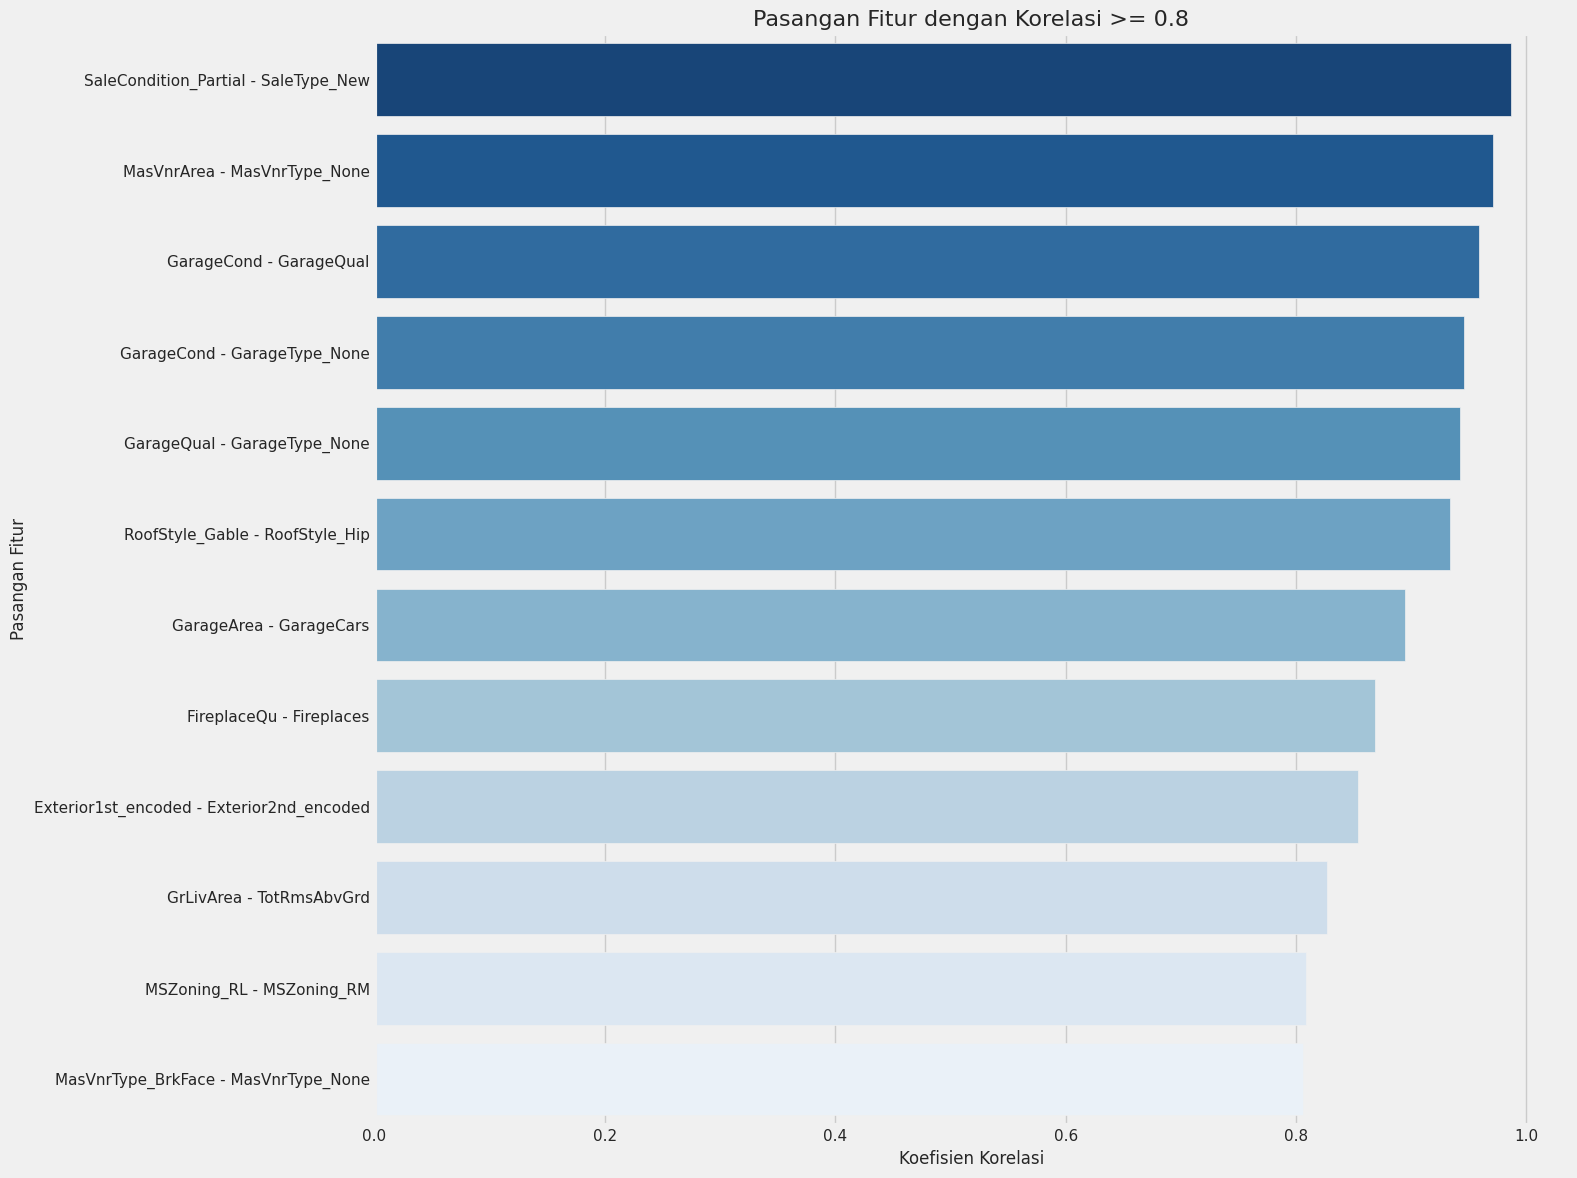

Jumlah pasangan fitur dengan korelasi >= 0.8: 12
Jumlah fitur yang akan dihapus: 10
Fitur-fitur yang akan dihapus karena multikolinear: ['RoofStyle_Gable', 'GarageQual', 'MasVnrType_None', 'Exterior1st_encoded', 'GarageType_None', 'MSZoning_RM', 'SaleCondition_Partial', 'GarageCars', 'FireplaceQu', 'TotRmsAbvGrd']


In [ ]:
train_processed_no_multicol, dropped_features = handle_multicollinearity(
    train_processed[selected_features_correlation],
    threshold=0.8,
    figsize=(16, 12)
)

In [ ]:
test_processed_no_multicol = test_processed[selected_features_correlation].drop(dropped_features, axis=1)

print(f"\nJumlah fitur sebelum penanganan multikolinearitas: {len(selected_features_correlation)}")
print(f"Jumlah fitur setelah penanganan multikolinearitas: {train_processed_no_multicol.shape[1]}")



Jumlah fitur sebelum penanganan multikolinearitas: 77
Jumlah fitur setelah penanganan multikolinearitas: 67


In [ ]:
train_processed_no_multicol

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0               7      7.445          4            4     548.000      856.000   
1               6      7.141          3            3     460.000     1262.000   
2               7      7.488          4            4     608.000      920.000   
3               7      7.449          3            4     642.000      756.000   
4               8      7.696          4            4     836.000     1145.000   
...           ...        ...        ...          ...         ...          ...   
1455            6      7.407          3            3     460.000      953.000   
1456            6      7.637          3            3     500.000     1542.000   
1457            7      7.758          5            4     252.000     1152.000   
1458            5      6.984          3            4     240.000     1078.000   
1459            5      7.136          4            3     276.000     1256.000   

      BsmtQual  1stFlrSF  GarageFinish  FullBath  ...  BldgType_Duplex  \
0            4     6.753             2         2  ...            False   
1            4     7.141             2         2  ...            False   
2            4     6.825             2         2  ...            False   
3            3     6.869             1         1  ...            False   
4            4     7.044             2         2  ...            False   
...        ...       ...           ...       ...  ...              ...   
1455         4     6.861             2         2  ...            False   
1456         4     7.637             1         2  ...            False   
1457         3     7.081             2         2  ...            False   
1458         3     6.984             1         1  ...            False   
1459         3     7.136             3         1  ...            False   

      Condition1_Feedr  SaleCondition_Normal  Foundation_Slab  \
0                False                  True            False   
1                 True                  True            False   
2                False                  True            False   
3                False                 False            False   
4                False                  True            False   
...                ...                   ...              ...   
1455             False                  True            False   
1456             False                  True            False   
1457             False                  True            False   
1458             False                  True            False   
1459             False                  True            False   

      Electrical_FuseF  Fence  SaleType_WD  LotShape  Foundation_CBlock  \
0                False      0         True         4              False   
1                False      0         True         4               True   
2                False      0         True         3              False   
3                False      0         True         3              False   
4                False      0         True         3              False   
...                ...    ...          ...       ...                ...   
1455             False      0         True         4              False   
1456             False      3         True         4               True   
1457             False      4         True         4              False   
1458             False      0         True         4               True   
1459             False      0         True         4               True   

      GarageType_Detchd  
0                 False  
1                 False  
2                 False  
3                  True  
4                 False  
...                 ...  
1455              False  
1456              False  
1457              False  
1458              False  
1459              False  

[1460 rows x 67 columns]

In [ ]:
# Hitung korelasi antar fitur dengan target
correlation_with_target = train_processed_no_multicol.corrwith(target.squeeze()).abs()

# Ambil 15 fitur dengan korelasi tertinggi terhadap target
top_15_features = correlation_with_target.sort_values(ascending=False).head(15).index.tolist()

# Ambil hanya fitur-fitur top 15 dari data hasil multikolinearitas
train_top_15 = train_processed_no_multicol[top_15_features]


In [ ]:
train_top_15


OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0               7      7.445          4            4     548.000      856.000   
1               6      7.141          3            3     460.000     1262.000   
2               7      7.488          4            4     608.000      920.000   
3               7      7.449          3            4     642.000      756.000   
4               8      7.696          4            4     836.000     1145.000   
...           ...        ...        ...          ...         ...          ...   
1455            6      7.407          3            3     460.000      953.000   
1456            6      7.637          3            3     500.000     1542.000   
1457            7      7.758          5            4     252.000     1152.000   
1458            5      6.984          3            4     240.000     1078.000   
1459            5      7.136          4            3     276.000     1256.000   

      BsmtQual  1stFlrSF  GarageFinish  FullBath  YearBuilt  GarageYrBlt  \
0            4     6.753             2         2       2003     2003.000   
1            4     7.141             2         2       1976     1976.000   
2            4     6.825             2         2       2001     2001.000   
3            3     6.869             1         1       1915     1998.000   
4            4     7.044             2         2       2000     2000.000   
...        ...       ...           ...       ...        ...          ...   
1455         4     6.861             2         2       1999     1999.000   
1456         4     7.637             1         2       1978     1978.000   
1457         3     7.081             2         2       1941     1941.000   
1458         3     6.984             1         1       1950     1950.000   
1459         3     7.136             3         1       1965     1965.000   

      YearRemodAdd  Foundation_PConc  Fireplaces  
0             2003              True       0.000  
1             1976             False       1.000  
2             2002              True       1.000  
3             1970             False       1.000  
4             2000              True       1.000  
...            ...               ...         ...  
1455          2000              True       1.000  
1456          1988             False       2.000  
1457          2006             False       2.000  
1458          1996             False       0.000  
1459          1965             False       0.000  

[1460 rows x 15 columns]

# **Scaling Data**

Scaling adalah proses mengubah skala fitur-fitur agar memiliki rentang yang seragam


In [ ]:
def scale_features(train_df, test_df, scaler_type='robust', numeric_cols=None):
    """
    Melakukan scaling pada fitur-fitur numerik

    Parameters:
    -----------
    train_df : pandas.DataFrame
        DataFrame training yang akan discaling
    test_df : pandas.DataFrame
        DataFrame testing yang akan discaling
    scaler_type : str, optional
        Jenis scaler yang digunakan ('standard', 'robust', 'minmax'). Default: 'robust'
    numeric_cols : list, optional
        Kolom-kolom numerik yang akan discaling. Default: semua kolom

    Returns:
    --------
    tuple
        (DataFrame training yang discaling, DataFrame testing yang discaling, objek scaler)
    """
    # Copy DataFrame untuk menghindari modifikasi pada original
    train_result = train_df.copy()
    test_result = test_df.copy()

    # Jika tidak ada kolom yang ditentukan, gunakan semua kolom
    if numeric_cols is None:
        numeric_cols = train_df.columns.tolist()

    # Inisialisasi scaler berdasarkan tipe
    if scaler_type.lower() == 'standard':
        scaler = StandardScaler()
    elif scaler_type.lower() == 'robust':
        scaler = RobustScaler()
    elif scaler_type.lower() == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaler_type harus salah satu dari: 'standard', 'robust', 'minmax'")

    # Fit scaler pada data training dan transform
    train_result[numeric_cols] = scaler.fit_transform(train_result[numeric_cols])

    # Transform data testing menggunakan scaler yang sama
    test_result[numeric_cols] = scaler.transform(test_result[numeric_cols])

    # Tampilkan informasi
    print(f"Scaling dilakukan pada {len(numeric_cols)} fitur menggunakan {scaler_type.capitalize()} Scaler")

    # Bandingkan distribusi sebelum dan sesudah scaling (untuk fitur pertama)
    if len(numeric_cols) > 0:
        first_col = numeric_cols[0]

        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(train_df[first_col], kde=True, color='#0E2954')
        plt.title(f'Distribusi {first_col} Sebelum Scaling', fontsize=12)
        plt.xlabel(first_col, fontsize=10)
        plt.ylabel('Frekuensi', fontsize=10)

        plt.subplot(1, 2, 2)
        sns.histplot(train_result[first_col], kde=True, color='#ff6d00')
        plt.title(f'Distribusi {first_col} Setelah {scaler_type.capitalize()} Scaling', fontsize=12)
        plt.xlabel(f'{first_col} (Scaled)', fontsize=10)
        plt.ylabel('Frekuensi', fontsize=10)

        plt.tight_layout()
        plt.show()

    return train_result, test_result, scaler

Scaling dilakukan pada 15 fitur menggunakan Robust Scaler


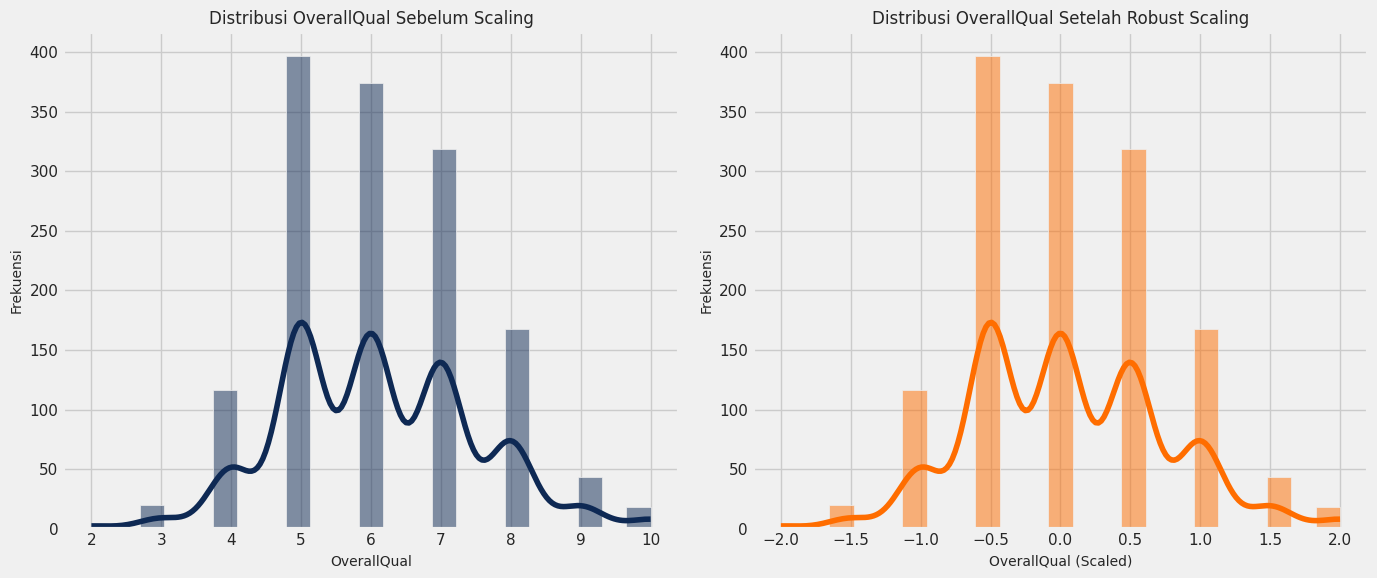

In [ ]:
train_scaled, test_scaled, scaler = scale_features(
    train_top_15,
    test_processed_no_multicol,
    scaler_type='robust'
)

In [ ]:
# Lihat statistik deskriptif data yang telah discaling
print("\nStatistik deskriptif data training setelah scaling:")
(train_scaled.describe().T[['mean', 'std', 'min', 'max']])


Statistik deskriptif data training setelah scaling:


mean   std    min   max
OverallQual       0.050 0.689 -2.000 2.000
GrLivArea        -0.054 0.717 -3.259 1.390
ExterQual         0.396 0.574 -1.000 2.000
KitchenQual       0.512 0.664 -1.000 2.000
GarageArea       -0.039 0.858 -1.988 1.898
TotalBsmtSF       0.117 0.792 -1.890 2.110
BsmtQual         -0.511 0.876 -4.000 1.000
1stFlrSF          0.031 0.684 -2.587 1.502
GarageFinish     -0.284 0.893 -2.000 1.000
FullBath         -0.435 0.551 -2.000 1.000
YearBuilt        -0.038 0.657 -2.196 0.804
GarageYrBlt      -0.075 0.719 -1.942 0.767
YearRemodAdd     -0.247 0.558 -1.189 0.432
Foundation_PConc  0.443 0.497  0.000 1.000
Fireplaces       -0.389 0.639 -1.000 1.500

In [ ]:
final_train, final_test =train_scaled, test_scaled

In [ ]:
# Lihat beberapa baris data yang telah diproses
print("\nData Training setelah preprocessing:")
(final_train.head())


Data Training setelah preprocessing:


OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0        0.500      0.343      1.000        1.000       0.282       -0.270   
1        0.000     -0.328      0.000        0.000      -0.083        0.538   
2        0.500      0.439      1.000        1.000       0.530       -0.142   
3        0.500      0.352      0.000        1.000       0.671       -0.469   
4        1.000      0.897      1.000        1.000       1.474        0.305   

   BsmtQual  1stFlrSF  GarageFinish  FullBath  YearBuilt  GarageYrBlt  \
0     0.000    -0.524         0.000     0.000      0.652        0.605   
1     0.000     0.328         0.000     0.000      0.065       -0.023   
2     0.000    -0.366         0.000     0.000      0.609        0.558   
3    -1.000    -0.270        -1.000    -1.000     -1.261        0.488   
4     0.000     0.114         0.000     0.000      0.587        0.535   

   YearRemodAdd  Foundation_PConc  Fireplaces  
0         0.243             1.000      -1.000  
1        -0.486             0.000       0.000  
2         0.216             1.000       0.000  
3        -0.649             0.000       0.000  
4         0.162             1.000       0.000

In [ ]:
print("\nData Testing setelah preprocessing:")
(final_test.head())


Data Testing setelah preprocessing:


OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0       -0.500     -1.084      0.000        0.000       1.035       -0.218   
1        0.000     -0.214      0.000        1.000      -0.696        0.672   
2       -0.500      0.236      0.000        0.000       0.008       -0.126   
3        0.000      0.202      0.000        1.000      -0.041       -0.130   
4        1.000     -0.296      1.000        1.000       0.108        0.574   

   BsmtQual  1stFlrSF  GarageFinish  FullBath  ...  BldgType_Duplex  \
0    -1.000    -0.424        -1.000    -1.000  ...            False   
1    -1.000     0.441        -1.000    -1.000  ...            False   
2     0.000    -0.347         1.000     0.000  ...            False   
3    -1.000    -0.352         1.000     0.000  ...            False   
4     0.000     0.359         0.000     0.000  ...            False   

   Condition1_Feedr  SaleCondition_Normal  Foundation_Slab  Electrical_FuseF  \
0              True                  True            False             False   
1             False                  True            False             False   
2             False                  True            False             False   
3             False                  True            False             False   
4             False                  True            False             False   

   Fence  SaleType_WD  LotShape  Foundation_CBlock  GarageType_Detchd  
0      3         True         4               True              False  
1      0         True         3               True              False  
2      3         True         3              False              False  
3      0         True         3              False              False  
4      0         True         3              False              False  

[5 rows x 67 columns]

In [ ]:
target

0      208500.000
1      181500.000
2      223500.000
3      140000.000
4      250000.000
          ...    
1455   175000.000
1456   210000.000
1457   266500.000
1458   142125.000
1459   147500.000
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
final_train

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0           0.500      0.343      1.000        1.000       0.282       -0.270   
1           0.000     -0.328      0.000        0.000      -0.083        0.538   
2           0.500      0.439      1.000        1.000       0.530       -0.142   
3           0.500      0.352      0.000        1.000       0.671       -0.469   
4           1.000      0.897      1.000        1.000       1.474        0.305   
...           ...        ...        ...          ...         ...          ...   
1455        0.000      0.260      0.000        0.000      -0.083       -0.077   
1456        0.000      0.768      0.000        0.000       0.083        1.096   
1457        0.500      1.035      2.000        1.000      -0.944        0.319   
1458       -0.500     -0.676      0.000        1.000      -0.994        0.172   
1459       -0.500     -0.338      1.000        0.000      -0.845        0.526   

      BsmtQual  1stFlrSF  GarageFinish  FullBath  YearBuilt  GarageYrBlt  \
0        0.000    -0.524         0.000     0.000      0.652        0.605   
1        0.000     0.328         0.000     0.000      0.065       -0.023   
2        0.000    -0.366         0.000     0.000      0.609        0.558   
3       -1.000    -0.270        -1.000    -1.000     -1.261        0.488   
4        0.000     0.114         0.000     0.000      0.587        0.535   
...        ...       ...           ...       ...        ...          ...   
1455     0.000    -0.289         0.000     0.000      0.565        0.512   
1456     0.000     1.417        -1.000     0.000      0.109        0.023   
1457    -1.000     0.195         0.000     0.000     -0.696       -0.837   
1458    -1.000    -0.018        -1.000    -1.000     -0.500       -0.628   
1459    -1.000     0.317         1.000    -1.000     -0.174       -0.279   

      YearRemodAdd  Foundation_PConc  Fireplaces  
0            0.243             1.000      -1.000  
1           -0.486             0.000       0.000  
2            0.216             1.000       0.000  
3           -0.649             0.000       0.000  
4            0.162             1.000       0.000  
...            ...               ...         ...  
1455         0.162             1.000       0.000  
1456        -0.162             0.000       1.000  
1457         0.324             0.000       1.000  
1458         0.054             0.000      -1.000  
1459        -0.784             0.000      -1.000  

[1460 rows x 15 columns]

In [ ]:
# Gabungkan
final_df_train = pd.concat([final_train, target], axis=1)


In [ ]:
final_df_train

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  TotalBsmtSF  \
0           0.500      0.343      1.000        1.000       0.282       -0.270   
1           0.000     -0.328      0.000        0.000      -0.083        0.538   
2           0.500      0.439      1.000        1.000       0.530       -0.142   
3           0.500      0.352      0.000        1.000       0.671       -0.469   
4           1.000      0.897      1.000        1.000       1.474        0.305   
...           ...        ...        ...          ...         ...          ...   
1455        0.000      0.260      0.000        0.000      -0.083       -0.077   
1456        0.000      0.768      0.000        0.000       0.083        1.096   
1457        0.500      1.035      2.000        1.000      -0.944        0.319   
1458       -0.500     -0.676      0.000        1.000      -0.994        0.172   
1459       -0.500     -0.338      1.000        0.000      -0.845        0.526   

      BsmtQual  1stFlrSF  GarageFinish  FullBath  YearBuilt  GarageYrBlt  \
0        0.000    -0.524         0.000     0.000      0.652        0.605   
1        0.000     0.328         0.000     0.000      0.065       -0.023   
2        0.000    -0.366         0.000     0.000      0.609        0.558   
3       -1.000    -0.270        -1.000    -1.000     -1.261        0.488   
4        0.000     0.114         0.000     0.000      0.587        0.535   
...        ...       ...           ...       ...        ...          ...   
1455     0.000    -0.289         0.000     0.000      0.565        0.512   
1456     0.000     1.417        -1.000     0.000      0.109        0.023   
1457    -1.000     0.195         0.000     0.000     -0.696       -0.837   
1458    -1.000    -0.018        -1.000    -1.000     -0.500       -0.628   
1459    -1.000     0.317         1.000    -1.000     -0.174       -0.279   

      YearRemodAdd  Foundation_PConc  Fireplaces  SalePrice  
0            0.243             1.000      -1.000 208500.000  
1           -0.486             0.000       0.000 181500.000  
2            0.216             1.000       0.000 223500.000  
3           -0.649             0.000       0.000 140000.000  
4            0.162             1.000       0.000 250000.000  
...            ...               ...         ...        ...  
1455         0.162             1.000       0.000 175000.000  
1456        -0.162             0.000       1.000 210000.000  
1457         0.324             0.000       1.000 266500.000  
1458         0.054             0.000      -1.000 142125.000  
1459        -0.784             0.000      -1.000 147500.000  

[1460 rows x 16 columns]

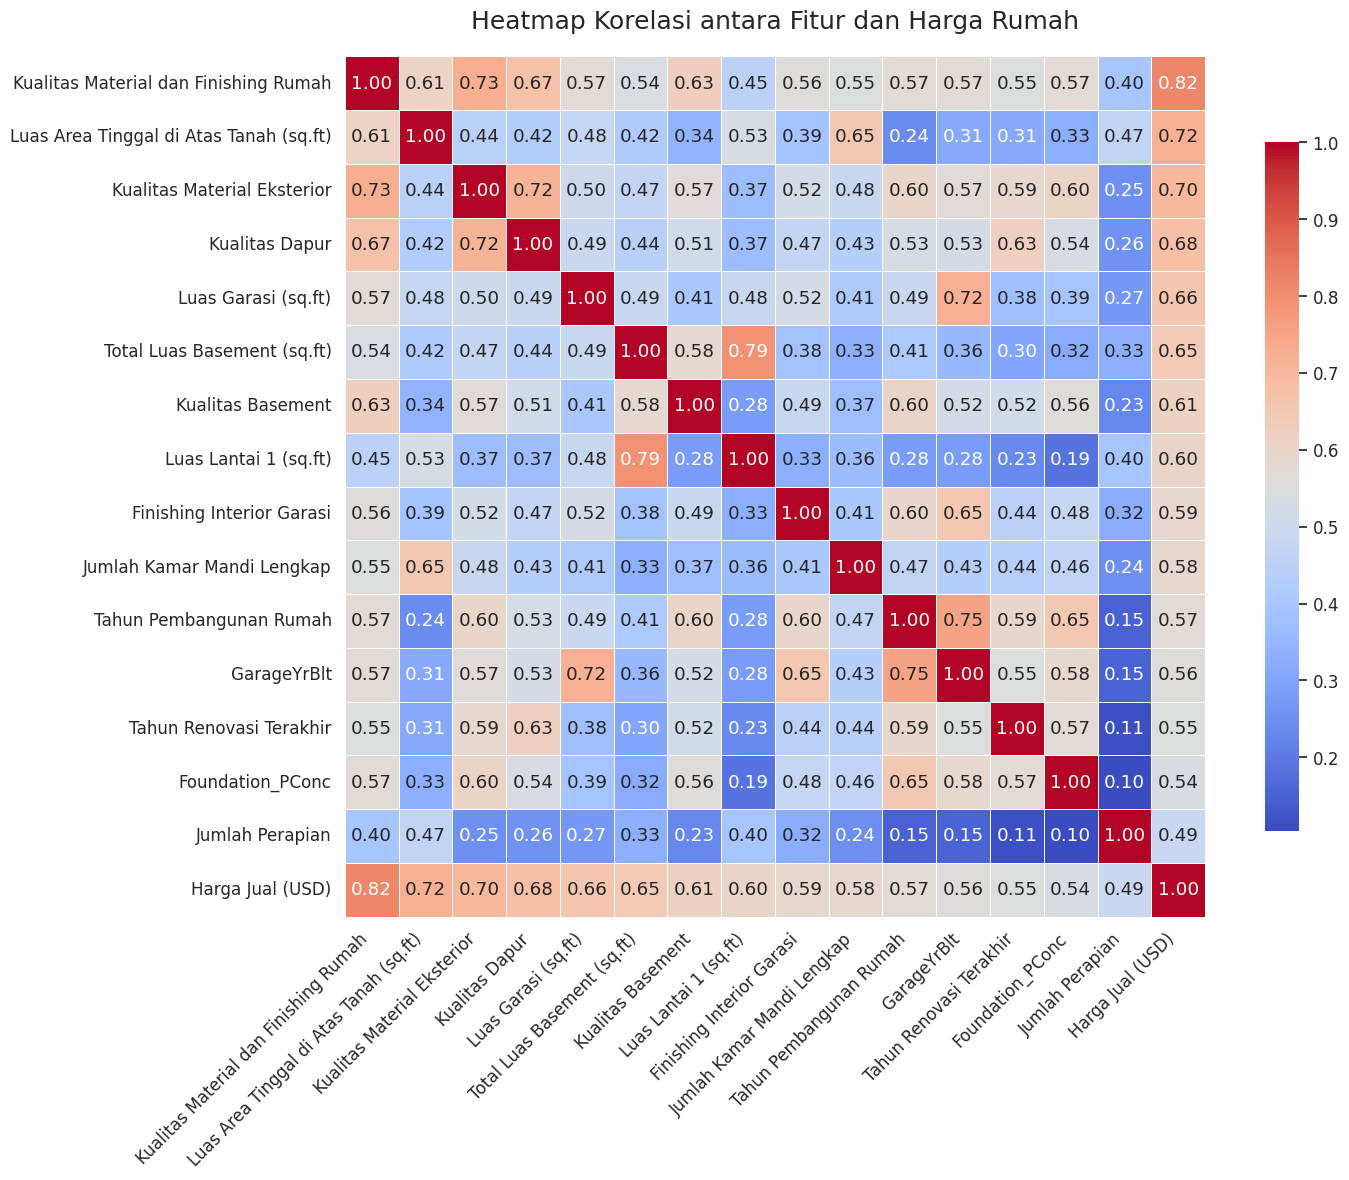

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping nama kolom jadi deskriptif
renamed_df = final_df_train.rename(columns=descriptive_names)

# Hitung korelasi
corr_matrix = renamed_df.corr()

# Set style visual
sns.set(style="white", font_scale=1.1)

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap Korelasi antara Fitur dan Harga Rumah", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Plot.png')
plt.show()


In [ ]:
# Pastikan kolom yang digunakan sama dengan train_top_15
final_df_test = final_test[train_top_15.columns]


# **Modeling & Evaluasi**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('fivethirtyeight')
sns.set_palette('Blues_r')

In [ ]:
# Fungsi untuk evaluasi model regresi (perbaikan untuk kompatibilitas)
def eval_regression(ytest, pred):
    """Evaluasi model regresi dengan berbagai metrik"""
    mae = mean_absolute_error(ytest, pred)
    mse = mean_squared_error(ytest, pred)  # Tanpa parameter squared
    rmse = np.sqrt(mse)                    # Hitung RMSE secara manual
    r2 = r2_score(ytest, pred)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 score: {r2:.2f}")

    return mae, rmse, r2

# Fungsi untuk menampilkan feature importance model tree-based
def show_feature_importance(model, X):
    """Menampilkan feature importance dari model tree-based"""
    if hasattr(model, 'feature_importances_'):
        # Dapatkan feature importance
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)

        # Plot top 20 feature importance
        plt.figure(figsize=(12, 10))
        feat_importances.nlargest(15).plot(kind='barh', color='#0E2954')
        plt.title('Top 15 Fitur Terpenting untuk Prediksi Harga Rumah', fontsize=16)
        plt.xlabel('Skor Pentingnya Fitur', fontsize=12)
        plt.ylabel('Fitur', fontsize=12)
        plt.gca().invert_yaxis()  # Membalik urutan untuk menampilkan yang tertinggi di atas
        plt.tight_layout()
        plt.savefig('feature_importance.png')  # Simpan ke file PNG
        plt.show()
    else:
        print("Model tidak memiliki atribut feature_importances_")

# Fungsi untuk menampilkan koefisien model linear
def show_linear_coefficients(model, X):
    """Menampilkan koefisien dari model linear (Linear Regression, Ridge, Lasso, ElasticNet)"""
    if hasattr(model, 'coef_'):
        # Dapatkan koefisien dan intercept
        koefisien = model.coef_
        intercept = model.intercept_
        print(f'Koefisien = {koefisien}')
        print(f'Bias (intercept) = {intercept}')

        # Buat DataFrame untuk koefisien dan nama fitur
        feature_names = X.columns
        fitur_penting = pd.DataFrame({
            'Fitur': feature_names,
            'Koefisien': koefisien
        })

        # Urutkan berdasarkan nilai koefisien (absolute) untuk melihat yang paling berpengaruh
        fitur_penting_abs = fitur_penting.copy()
        fitur_penting_abs['Abs_Koefisien'] = fitur_penting_abs['Koefisien'].abs()
        fitur_penting_abs = fitur_penting_abs.sort_values(by='Abs_Koefisien', ascending=False)

        # Tampilkan top 20 koefisien berdasarkan nilai absolut
        print("Top 17 Fitur Berdasarkan Nilai Absolut Koefisien:")
        display(fitur_penting_abs.head(20))

        # Visualisasi koefisien terurut dengan Plotly
        # Pilih top 30 fitur berdasarkan nilai absolut
        top_features = fitur_penting_abs.head(15)['Fitur'].values
        fitur_penting_plot = fitur_penting[fitur_penting['Fitur'].isin(top_features)]
        fitur_penting_plot = fitur_penting_plot.sort_values(by='Koefisien', ascending=True)

        # Buat plot bar dengan Plotly
        fig = px.bar(
            fitur_penting_plot,
            x='Koefisien',
            y='Fitur',
            orientation='h',
            text_auto=True,
            color='Koefisien',
            color_continuous_scale='Blues'
        )

        fig.update_layout(
            width=1200,
            height=600,
            title='<b>Feature Importance Berdasarkan Koefisien Model Linear</b>',
            xaxis_title='Koefisien',
            yaxis_title='Fitur',
            showlegend=False,
            paper_bgcolor='rgb(255, 255, 255, 1)',
            plot_bgcolor='rgb(255, 255, 255, 0)',
        )

        fig.write_image('linear_coefficients.png')  # Simpan ke file PNG
        fig.show()

        return fitur_penting
    else:
        print("Model tidak memiliki atribut coef_ (bukan model linear)")
        return None

# Fungsi utama untuk proses modeling
def run_modeling_pipeline(final_train, final_test, log_transform=True):
    """
    Menjalankan proses modeling untuk prediksi harga rumah

    Parameters:
    -----------
    final_train : pandas.DataFrame
        Data training yang telah diproses
    final_test : pandas.DataFrame
        Data testing yang telah diproses
    log_transform : bool, optional
        Apakah akan melakukan transformasi log pada target. Default: True

    Returns:
    --------
    tuple
        (Model terbaik, DataFrame hasil evaluasi, DataFrame prediksi)
    """
    print("=== Memulai Proses Modeling ===")

    # Persiapkan data untuk modeling
    if 'Id' in final_train.columns:
        X = final_train.drop(['Id', 'SalePrice'], axis=1)
    else:
        X = final_train.drop(['SalePrice'], axis=1)

    y = final_train['SalePrice']

    # Cek distribusi target
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(y, kde=True, color='#0E2954')
    plt.title('Distribusi Target Original', fontsize=14)
    plt.xlabel('Harga', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(y), kde=True, color='#ff6d00')
    plt.title('Distribusi Target setelah Log Transform', fontsize=14)
    plt.xlabel('Log(Harga)', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    plt.tight_layout()
    plt.savefig('target_distribution.png')  # Simpan ke file PNG
    plt.show()

    # Log transform target jika diperlukan
    if log_transform:
        print("Menerapkan log transform pada target...")
        y_transformed = np.log1p(y)
    else:
        y_transformed = y

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    print(f"Jumlah fitur: {X.shape[1]}")
    print(f"Data training: {X_train.shape[0]} sampel")
    print(f"Data validasi: {X_val.shape[0]} sampel")

    # Definisikan model-model yang akan dievaluasi
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.001),
        "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5),
        "Decision Tree": DecisionTreeRegressor(max_depth=8),
        "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=15),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
        "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1)
    }

    # Dictionary untuk menyimpan hasil evaluasi
    results = {
        "Model": [],
        "MAE": [],
        "RMSE": [],
        "R²": []
    }

    # Variabel untuk menyimpan model terbaik
    best_model = None
    best_score = -float('inf')

    # Latih dan evaluasi setiap model
    for model_name, model in models.items():
        print(f"\nEvaluasi Model: {model_name}")
        print("-" * 50)

        # Latih model
        try:
            model.fit(X_train, y_train)

            # Prediksi
            y_pred_transformed = model.predict(X_val)

            # Transform kembali ke skala asli untuk evaluasi
            if log_transform:
                y_val_original = np.expm1(y_val)
                y_pred_original = np.expm1(y_pred_transformed)
            else:
                y_val_original = y_val
                y_pred_original = y_pred_transformed

            # Evaluasi
            mae, rmse, r2 = eval_regression(y_val_original, y_pred_original)

            # Simpan hasil
            results["Model"].append(model_name)
            results["MAE"].append(mae)
            results["RMSE"].append(rmse)
            results["R²"].append(r2)

            # Update model terbaik
            if r2 > best_score:
                best_score = r2
                best_model = model

            # Tampilkan feature importance berdasarkan jenis model
            if model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
                print("\nFeature Importance berdasarkan Gini Importance:")
                show_feature_importance(model, X_train)
            elif model_name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet"]:
                print("\nFeature Importance berdasarkan Koefisien:")
                show_linear_coefficients(model, X_train)

        except Exception as e:
            print(f"Error melatih model {model_name}: {str(e)}")

    # Buat DataFrame hasil evaluasi
    results_df = pd.DataFrame(results)
    print("\nRangkuman Hasil Evaluasi Model:")
    print(results_df)

    # Visualisasikan hasil evaluasi
    plt.figure(figsize=(15, 10))

    # Plot MAE
    plt.subplot(2, 2, 1)
    sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_r')
    plt.title('Mean Absolute Error (MAE)', fontsize=14)
    plt.xlabel('MAE (Lebih rendah lebih baik)', fontsize=12)
    plt.savefig('mae_plot.png')  # Simpan ke file PNG

    # Plot RMSE
    plt.subplot(2, 2, 2)
    sns.barplot(x='RMSE', y='Model', data=results_df, palette='Blues_r')
    plt.title('Root Mean Squared Error (RMSE)', fontsize=14)
    plt.xlabel('RMSE (Lebih rendah lebih baik)', fontsize=12)
    plt.savefig('rmse_plot.png')  # Simpan ke file PNG

    # Plot R²
    plt.subplot(2, 2, 3)
    sns.barplot(x='R²', y='Model', data=results_df, palette='Blues')
    plt.title('R² Score', fontsize=14)
    plt.xlabel('R² (Lebih tinggi lebih baik)', fontsize=12)
    plt.savefig('r2_plot.png')  # Simpan ke file PNG

    # Scatter plot untuk model terbaik
    best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']

    plt.subplot(2, 2, 4)
    best_pred = best_model.predict(X_val)

    if log_transform:
        best_val = np.expm1(y_val)
        best_pred = np.expm1(best_pred)
    else:
        best_val = y_val

    plt.scatter(best_val, best_pred, alpha=0.5, color='#0E2954')
    plt.plot([best_val.min(), best_val.max()], [best_val.min(), best_val.max()], 'r--')
    plt.title(f'Prediksi vs Aktual ({best_model_name})', fontsize=14)
    plt.xlabel('Harga Aktual', fontsize=12)
    plt.ylabel('Harga Prediksi', fontsize=12)
    plt.savefig('prediction_vs_actual.png')  # Simpan ke file PNG
    plt.tight_layout()
    plt.show()

    # Buat residual plot untuk model terbaik
    plt.figure(figsize=(10, 6))
    residuals = best_val - best_pred
    plt.scatter(best_pred, residuals, alpha=0.5, color='#0E2954')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot untuk {best_model_name}', fontsize=14)
    plt.xlabel('Prediksi', fontsize=12)
    plt.ylabel('Residual (Aktual - Prediksi)', fontsize=12)
    plt.tight_layout()
    plt.savefig('residual_plot.png')  # Simpan ke file PNG
    plt.show()

    # Tampilkan feature importance untuk model terbaik berdasarkan jenis model
    print(f"\nFeature Importance untuk Model Terbaik ({best_model_name}):")
    if best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
        show_feature_importance(best_model, X)
    elif best_model_name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet"]:
        show_linear_coefficients(best_model, X)

    # Latih model terbaik pada seluruh data training
    print(f"\nMelatih {best_model_name} pada seluruh data training...")
    best_model.fit(X, y_transformed)

    # Persiapkan data testing
    if 'Id' in final_test.columns:
        test_features = final_test.drop(['Id'], axis=1)
        test_ids = final_test['Id']
    else:
        test_features = final_test
        test_ids = range(len(final_test))

    # Proses prediksi untuk data test
    test_predictions = best_model.predict(test_features)

    # Transform kembali ke skala asli
    if log_transform:
        test_predictions = np.expm1(test_predictions)

    # Kembalikan hasil prediksi dalam DataFrame
    prediction_df = pd.DataFrame({
        'Id': test_ids,
        'SalePrice': test_predictions
    })

    return best_model, results_df, prediction_df


In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00


=== Memulai Proses Modeling ===


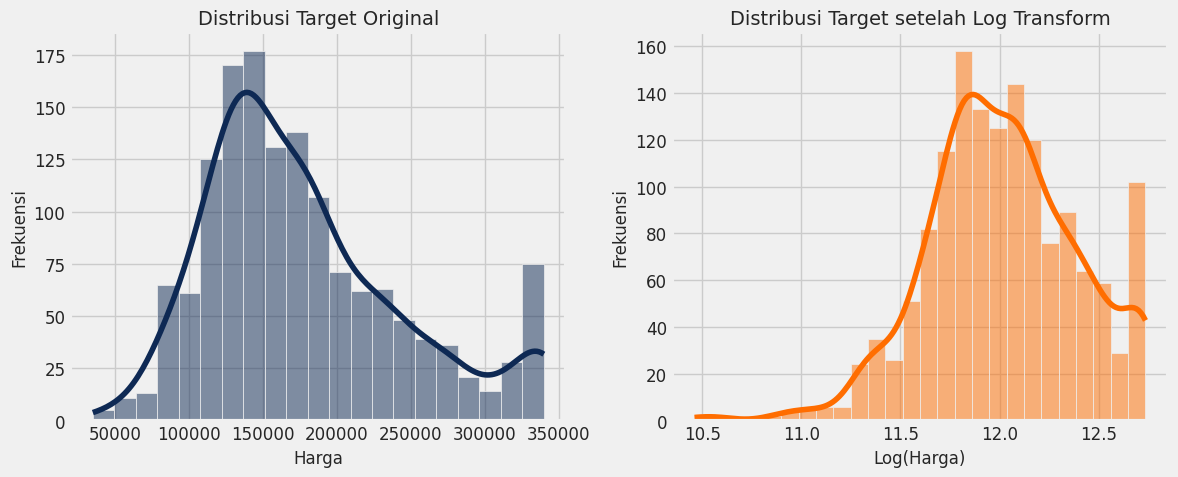

Menerapkan log transform pada target...
Jumlah fitur: 15
Data training: 1168 sampel
Data validasi: 292 sampel

Evaluasi Model: Linear Regression
--------------------------------------------------
MAE: 16949.68
RMSE: 23211.44
R2 score: 0.89

Feature Importance berdasarkan Koefisien:
Koefisien = [ 0.11298656  0.17090428 -0.00518838  0.03263276  0.05751201  0.03911105
  0.02722986  0.03555403  0.02396956 -0.02788018  0.07427835 -0.00694817
  0.07554357  0.00573188  0.06166418]
Bias (intercept) = 12.053120777580606
Top 17 Fitur Berdasarkan Nilai Absolut Koefisien:


Fitur  Koefisien  Abs_Koefisien
1          GrLivArea      0.171          0.171
0        OverallQual      0.113          0.113
12      YearRemodAdd      0.076          0.076
10         YearBuilt      0.074          0.074
14        Fireplaces      0.062          0.062
4         GarageArea      0.058          0.058
5        TotalBsmtSF      0.039          0.039
7           1stFlrSF      0.036          0.036
3        KitchenQual      0.033          0.033
9           FullBath     -0.028          0.028
6           BsmtQual      0.027          0.027
8       GarageFinish      0.024          0.024
11       GarageYrBlt     -0.007          0.007
13  Foundation_PConc      0.006          0.006
2          ExterQual     -0.005          0.005

Error melatih model Linear Regression: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Evaluasi Model: Ridge Regression
--------------------------------------------------
MAE: 16951.19
RMSE: 23215.36
R2 score: 0.89

Feature Importance berdasarkan Koefisien:
Koefisien = [ 0.1126807   0.17014144 -0.00481924  0.03273902  0.05742314  0.03899096
  0.02742405  0.03583539  0.02405045 -0.02709781  0.07359099 -0.00659519
  0.07514085  0.00590304  0.06172046]
Bias (intercept) = 12.053206735671655
Top 17 Fitur Berdasarkan Nilai Absolut Koefisien:


Fitur  Koefisien  Abs_Koefisien
1          GrLivArea      0.170          0.170
0        OverallQual      0.113          0.113
12      YearRemodAdd      0.075          0.075
10         YearBuilt      0.074          0.074
14        Fireplaces      0.062          0.062
4         GarageArea      0.057          0.057
5        TotalBsmtSF      0.039          0.039
7           1stFlrSF      0.036          0.036
3        KitchenQual      0.033          0.033
6           BsmtQual      0.027          0.027
9           FullBath     -0.027          0.027
8       GarageFinish      0.024          0.024
11       GarageYrBlt     -0.007          0.007
13  Foundation_PConc      0.006          0.006
2          ExterQual     -0.005          0.005

Error melatih model Ridge Regression: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Evaluasi Model: Lasso Regression
--------------------------------------------------
MAE: 16917.94
RMSE: 23200.12
R2 score: 0.89

Feature Importance berdasarkan Koefisien:
Koefisien = [ 0.11227758  0.16533678  0.          0.03173649  0.0546649   0.0397177
  0.02794881  0.03465095  0.0236353  -0.01542218  0.06756811  0.
  0.07116691  0.          0.0606236 ]
Bias (intercept) = 12.058083803161217
Top 17 Fitur Berdasarkan Nilai Absolut Koefisien:


Fitur  Koefisien  Abs_Koefisien
1          GrLivArea      0.165          0.165
0        OverallQual      0.112          0.112
12      YearRemodAdd      0.071          0.071
10         YearBuilt      0.068          0.068
14        Fireplaces      0.061          0.061
4         GarageArea      0.055          0.055
5        TotalBsmtSF      0.040          0.040
7           1stFlrSF      0.035          0.035
3        KitchenQual      0.032          0.032
6           BsmtQual      0.028          0.028
8       GarageFinish      0.024          0.024
9           FullBath     -0.015          0.015
2          ExterQual      0.000          0.000
11       GarageYrBlt      0.000          0.000
13  Foundation_PConc      0.000          0.000

Error melatih model Lasso Regression: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Evaluasi Model: ElasticNet
--------------------------------------------------
MAE: 16934.79
RMSE: 23214.53
R2 score: 0.89

Feature Importance berdasarkan Koefisien:
Koefisien = [ 0.11204894  0.16791169 -0.          0.03151016  0.05472989  0.03946805
  0.02757454  0.03536148  0.02334237 -0.02138412  0.06906134 -0.
  0.07275782  0.00212588  0.06134955]
Bias (intercept) = 12.055298462496348
Top 17 Fitur Berdasarkan Nilai Absolut Koefisien:


Fitur  Koefisien  Abs_Koefisien
1          GrLivArea      0.168          0.168
0        OverallQual      0.112          0.112
12      YearRemodAdd      0.073          0.073
10         YearBuilt      0.069          0.069
14        Fireplaces      0.061          0.061
4         GarageArea      0.055          0.055
5        TotalBsmtSF      0.039          0.039
7           1stFlrSF      0.035          0.035
3        KitchenQual      0.032          0.032
6           BsmtQual      0.028          0.028
8       GarageFinish      0.023          0.023
9           FullBath     -0.021          0.021
13  Foundation_PConc      0.002          0.002
2          ExterQual     -0.000          0.000
11       GarageYrBlt     -0.000          0.000

Error melatih model ElasticNet: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Evaluasi Model: Decision Tree
--------------------------------------------------
MAE: 21441.81
RMSE: 31324.98
R2 score: 0.80

Feature Importance berdasarkan Gini Importance:


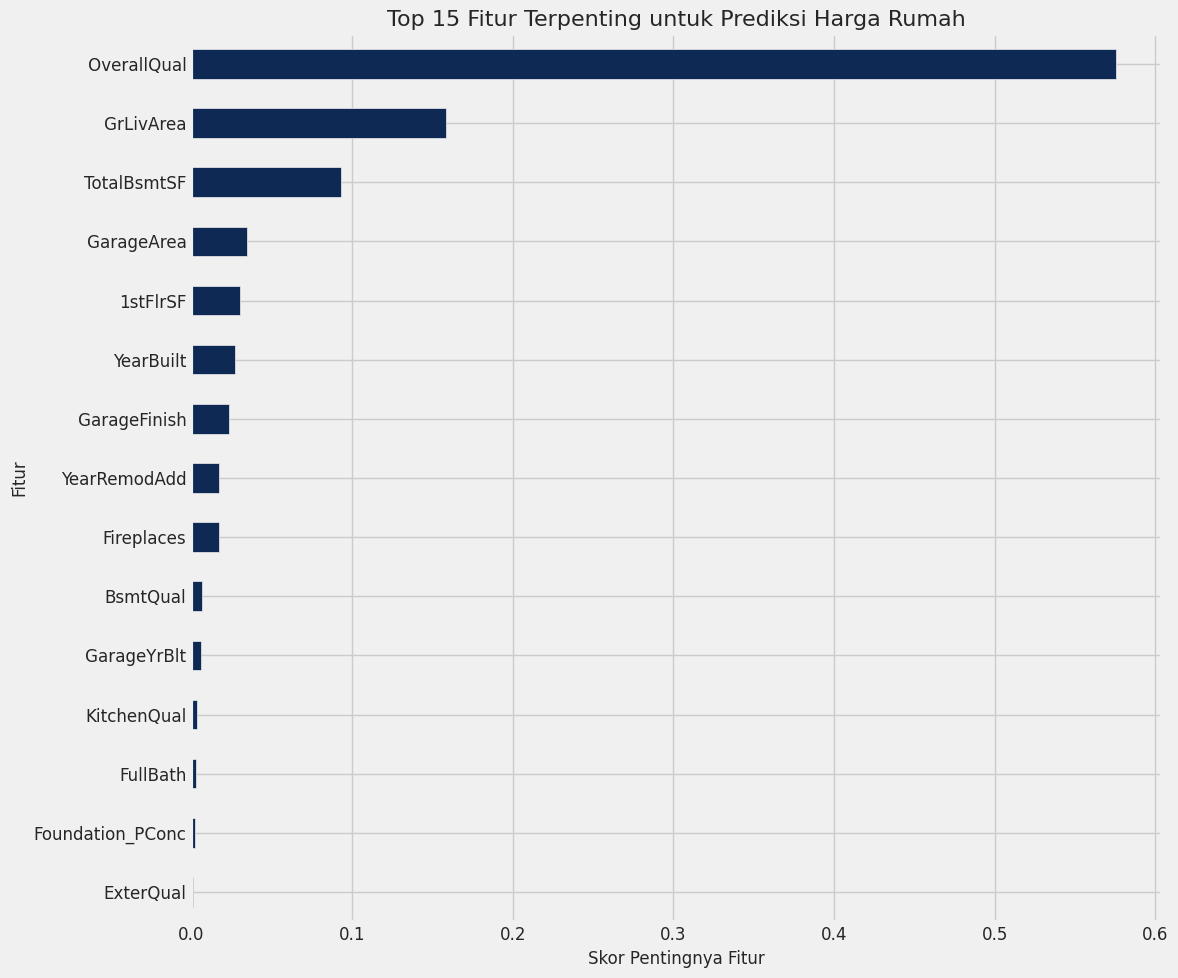


Evaluasi Model: Random Forest
--------------------------------------------------
MAE: 16375.89
RMSE: 23364.98
R2 score: 0.89

Feature Importance berdasarkan Gini Importance:


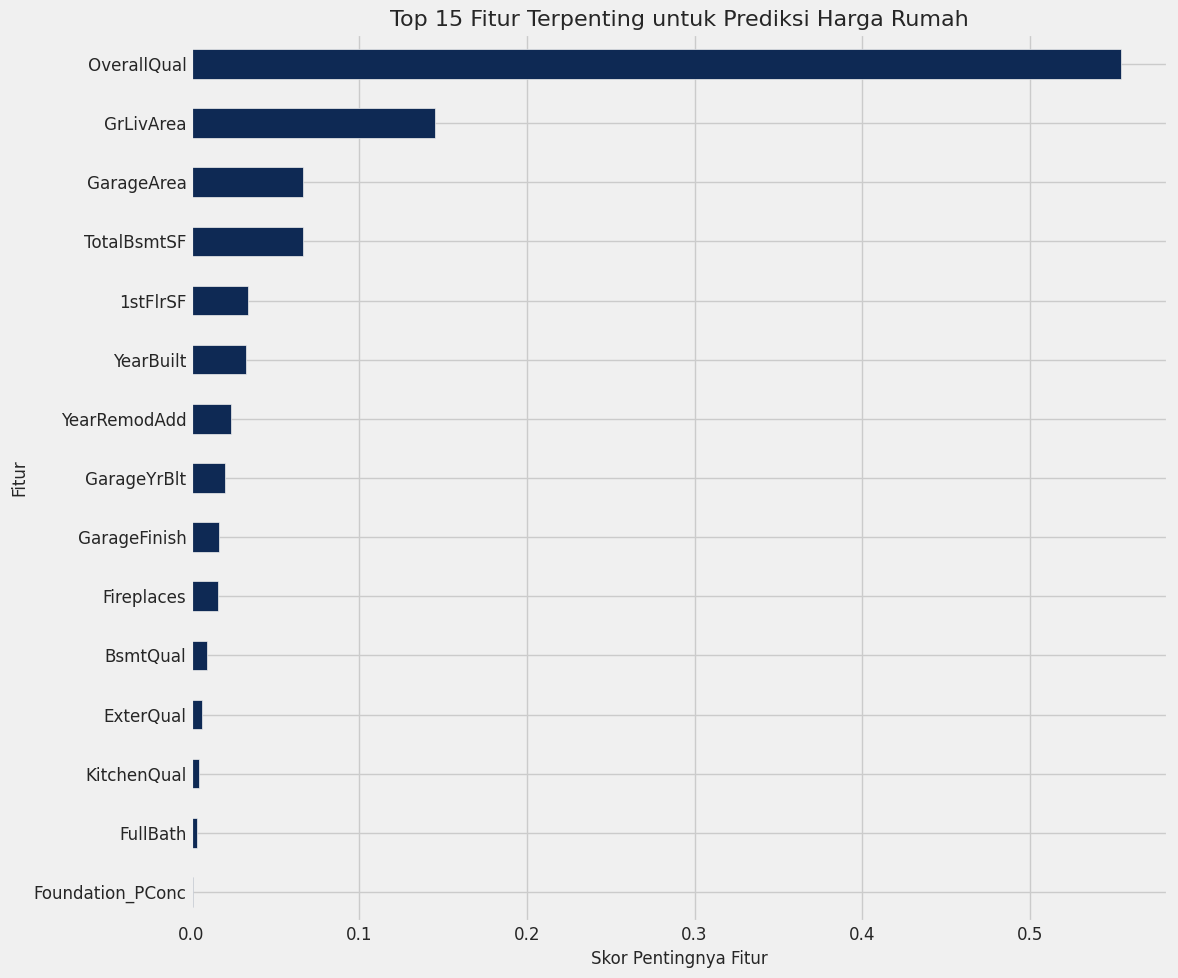


Evaluasi Model: Gradient Boosting
--------------------------------------------------
MAE: 16210.44
RMSE: 22693.11
R2 score: 0.89

Feature Importance berdasarkan Gini Importance:


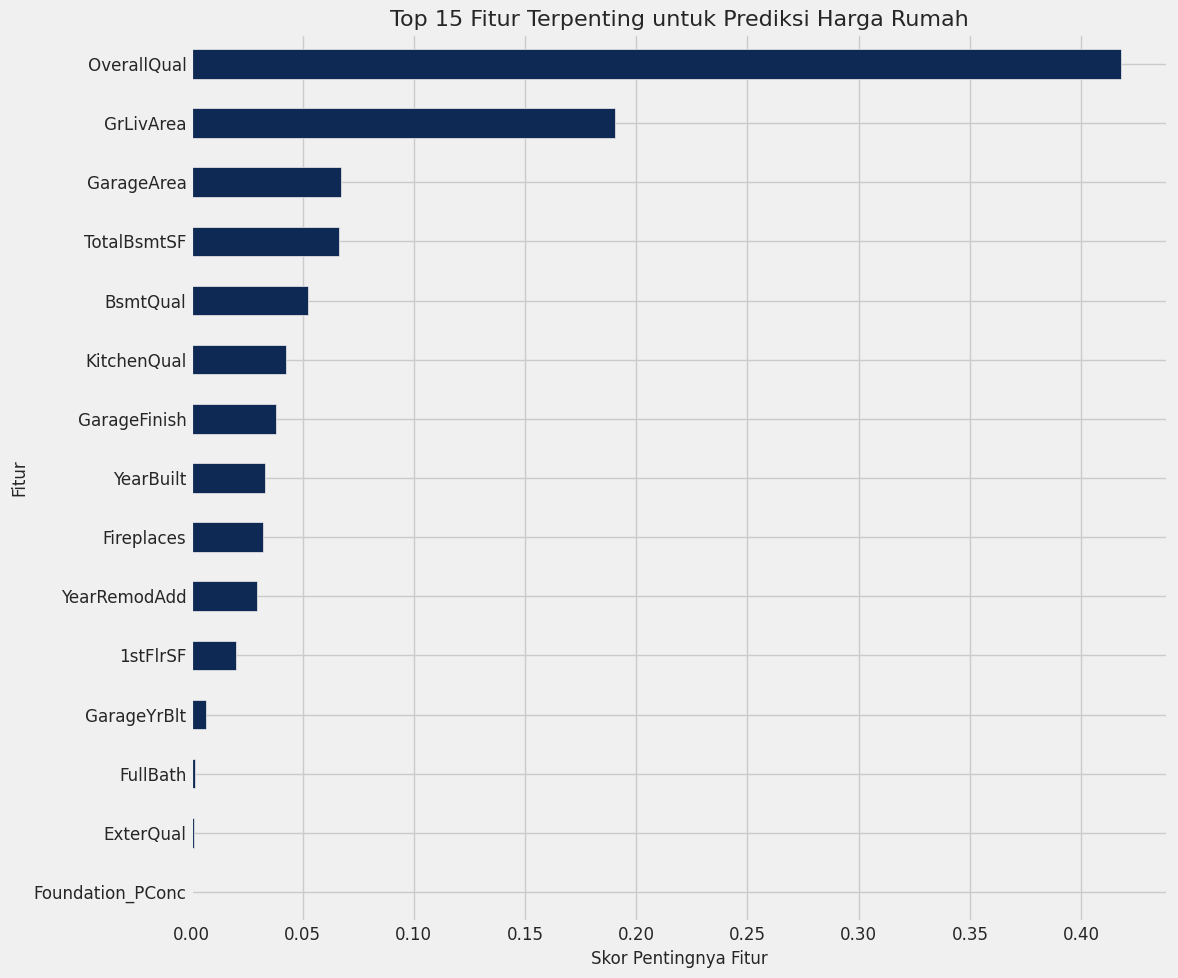


Evaluasi Model: SVR
--------------------------------------------------
MAE: 16526.52
RMSE: 22358.82
R2 score: 0.90

Rangkuman Hasil Evaluasi Model:
               Model       MAE      RMSE    R²
0  Linear Regression 16949.677 23211.442 0.890
1   Ridge Regression 16951.192 23215.360 0.890
2   Lasso Regression 16917.938 23200.118 0.890
3         ElasticNet 16934.786 23214.530 0.890
4      Decision Tree 21441.812 31324.981 0.799
5      Random Forest 16375.893 23364.978 0.888
6  Gradient Boosting 16210.440 22693.114 0.895
7                SVR 16526.516 22358.821 0.898


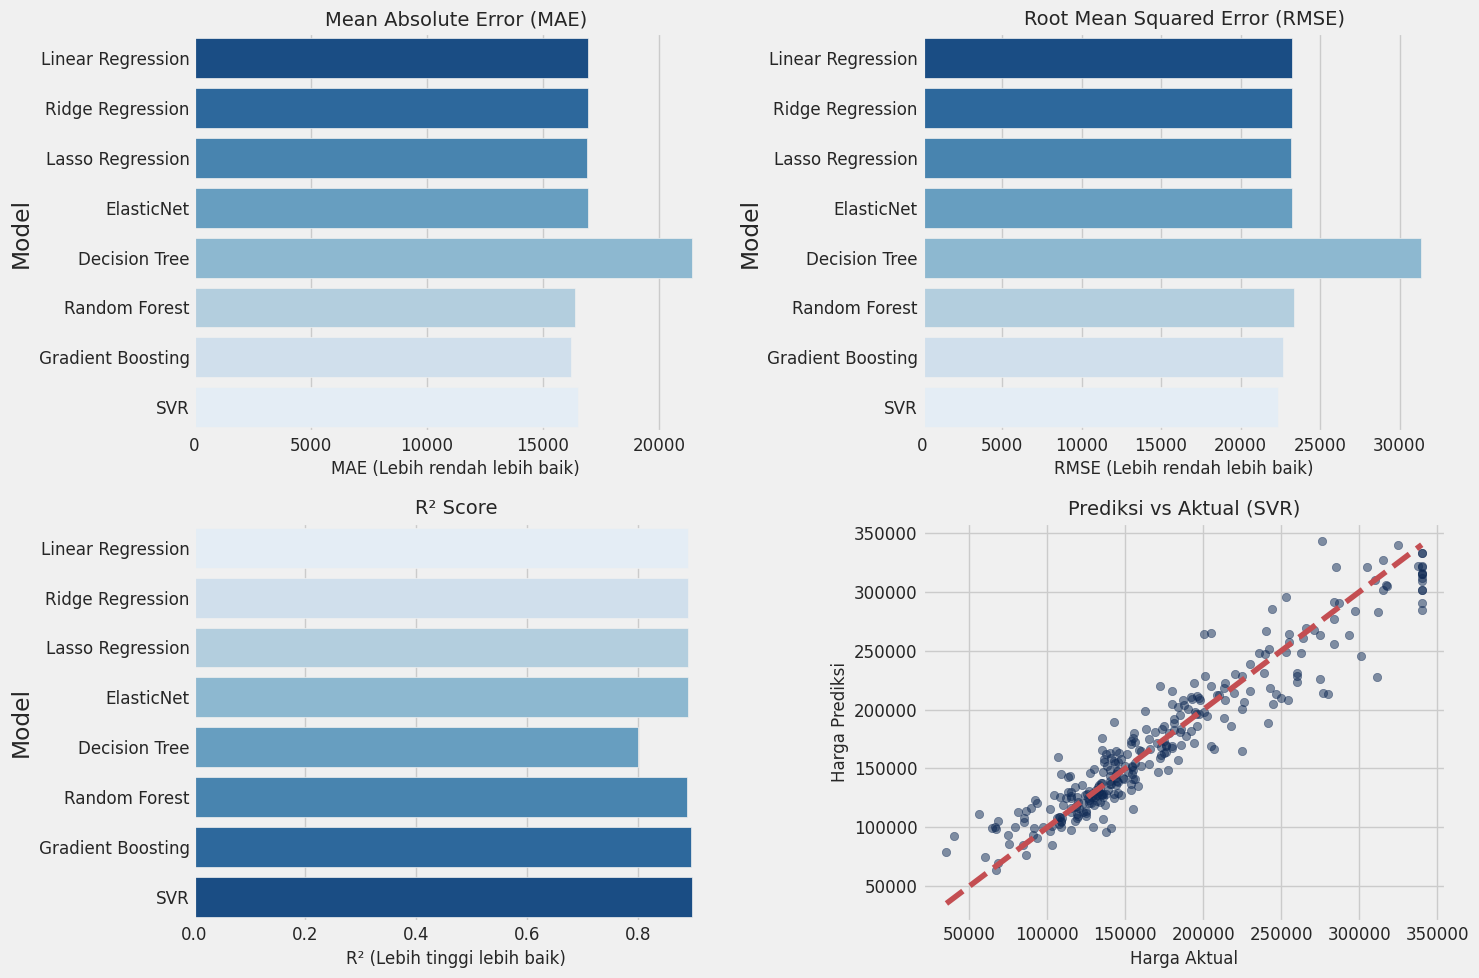

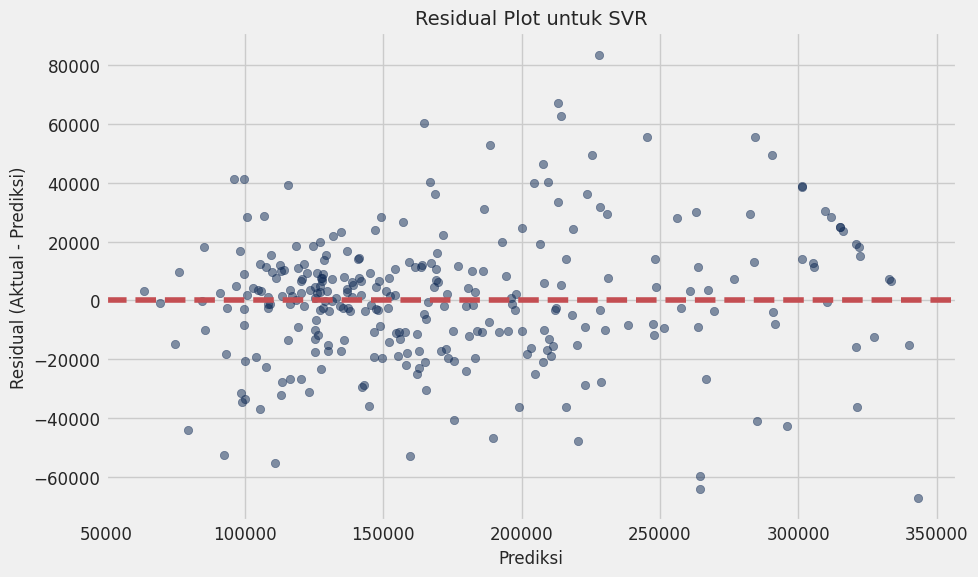


Feature Importance untuk Model Terbaik (SVR):

Melatih SVR pada seluruh data training...

Model Terbaik: SVR
R² Score: 0.8978
RMSE: 22358.82
MAE: 16526.52


In [ ]:
best_model, results_df, submission = run_modeling_pipeline(final_df_train, final_df_test)

# Tampilkan model terbaik dan metriks
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
print(f"\nModel Terbaik: {best_model_name}")
print(f"R² Score: {results_df.loc[results_df['R²'].idxmax(), 'R²']:.4f}")
print(f"RMSE: {results_df.loc[results_df['R²'].idxmax(), 'RMSE']:.2f}")
print(f"MAE: {results_df.loc[results_df['R²'].idxmax(), 'MAE']:.2f}")

Melatih model SVR...
=== Analisis Overfitting/Underfitting SVR ===
--------------------------------------------------
Training Set Performance:
  MAE: 13830.74
  RMSE: 18863.33
  R²: 0.9194

Validation Set Performance:
  MAE: 16526.52
  RMSE: 22358.82
  R²: 0.8978

Performance Gap:
  RMSE Gap: 3495.49
  R² Gap: 0.0217

✅ Model WELL-FITTED: Performa seimbang


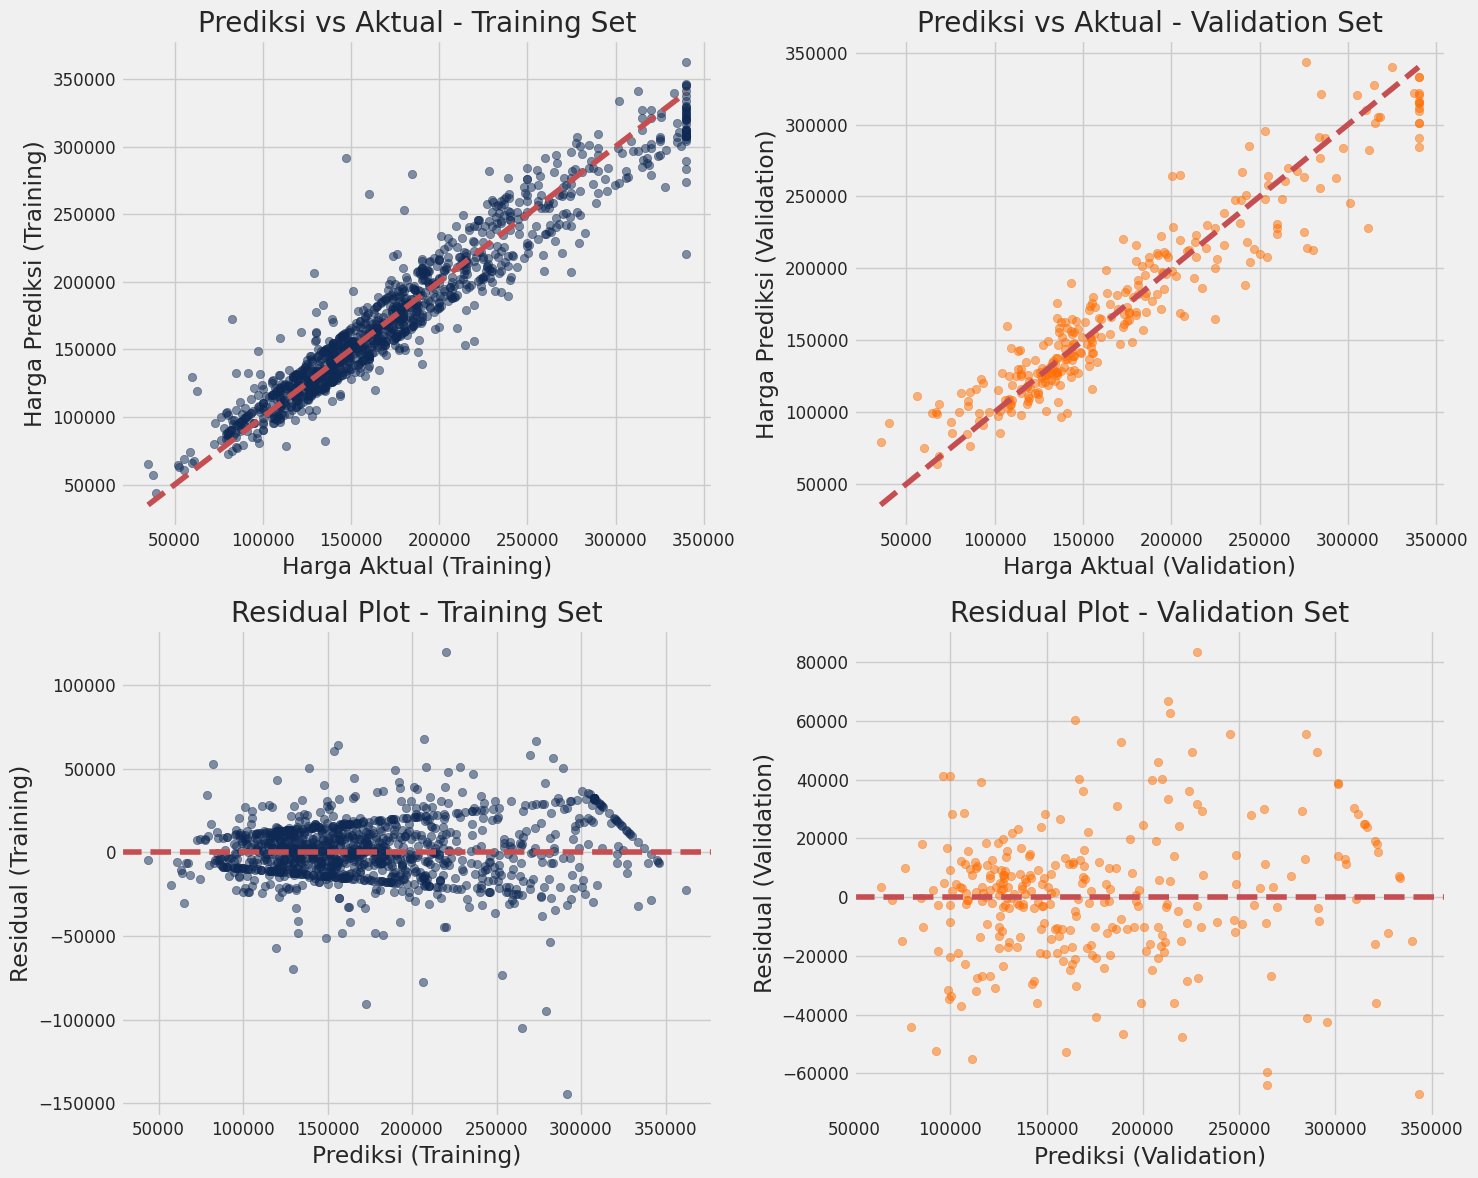

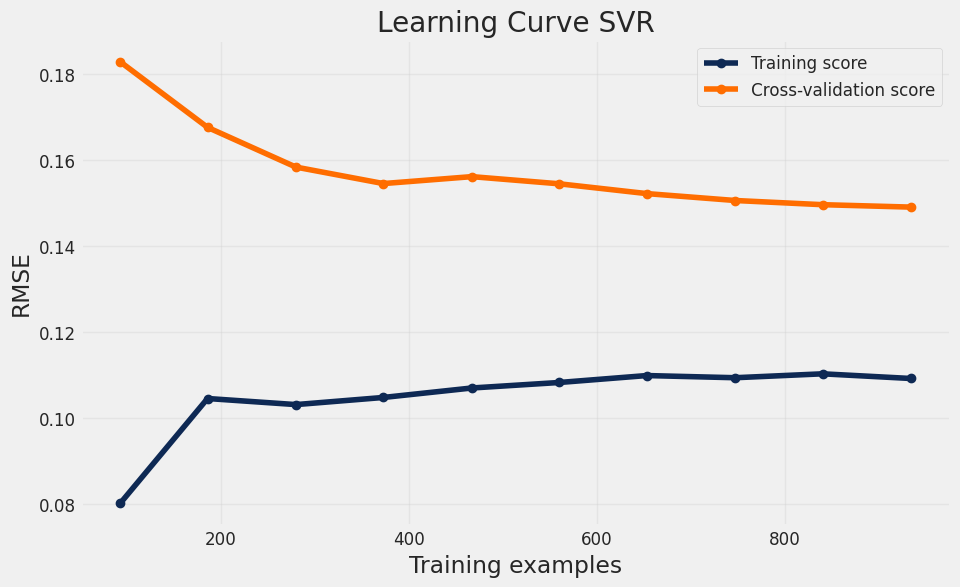

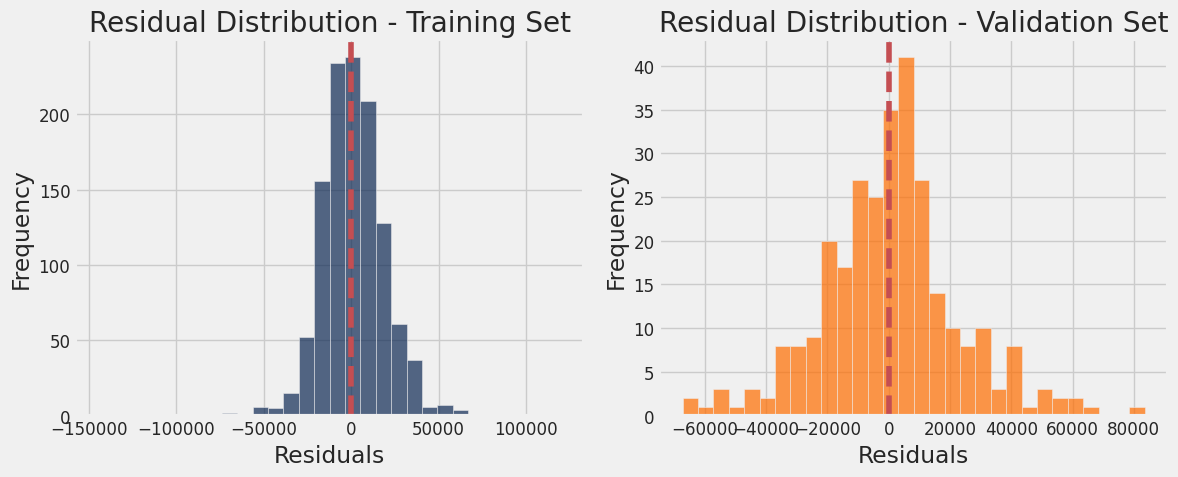


Melatih SVR pada seluruh data training...

Prediksi disimpan ke 'svr_submission.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

def analyze_svr_overfitting(X_train, X_val, y_train, y_val, model, log_transform=True):
    """
    Analisis overfitting/underfitting untuk model SVR
    """
    # 1. Evaluasi performa pada training dan validation set
    print("=== Analisis Overfitting/Underfitting SVR ===")
    print("-" * 50)

    # Prediksi pada training set
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Transform kembali ke skala asli jika menggunakan log transform
    if log_transform:
        y_train_original = np.expm1(y_train)
        y_train_pred_original = np.expm1(y_train_pred)
        y_val_original = np.expm1(y_val)
        y_val_pred_original = np.expm1(y_val_pred)
    else:
        y_train_original = y_train
        y_train_pred_original = y_train_pred
        y_val_original = y_val
        y_val_pred_original = y_val_pred

    # Hitung metrik untuk training set
    train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
    train_mse = mean_squared_error(y_train_original, y_train_pred_original)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train_original, y_train_pred_original)

    # Hitung metrik untuk validation set
    val_mae = mean_absolute_error(y_val_original, y_val_pred_original)
    val_mse = mean_squared_error(y_val_original, y_val_pred_original)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val_original, y_val_pred_original)

    print(f"Training Set Performance:")
    print(f"  MAE: {train_mae:.2f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print(f"  R²: {train_r2:.4f}")
    print(f"\nValidation Set Performance:")
    print(f"  MAE: {val_mae:.2f}")
    print(f"  RMSE: {val_rmse:.2f}")
    print(f"  R²: {val_r2:.4f}")

    # Analisis gap performa
    rmse_gap = val_rmse - train_rmse
    r2_gap = train_r2 - val_r2

    print(f"\nPerformance Gap:")
    print(f"  RMSE Gap: {rmse_gap:.2f}")
    print(f"  R² Gap: {r2_gap:.4f}")

    # Interpretasi
    if rmse_gap > train_rmse * 0.2 or r2_gap > 0.1:
        print("\n⚠️ Indikasi OVERFITTING: Performa validation jauh lebih buruk dari training")
    elif train_r2 < 0.6 and val_r2 < 0.6:
        print("\n⚠️ Indikasi UNDERFITTING: Performa buruk pada kedua dataset")
    else:
        print("\n✅ Model WELL-FITTED: Performa seimbang")

    # 2. Visualisasi
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot prediksi vs aktual untuk training set
    axes[0, 0].scatter(y_train_original, y_train_pred_original, alpha=0.5, color='#0E2954')
    axes[0, 0].plot([y_train_original.min(), y_train_original.max()],
                    [y_train_original.min(), y_train_original.max()], 'r--')
    axes[0, 0].set_xlabel('Harga Aktual (Training)')
    axes[0, 0].set_ylabel('Harga Prediksi (Training)')
    axes[0, 0].set_title('Prediksi vs Aktual - Training Set')

    # Plot prediksi vs aktual untuk validation set
    axes[0, 1].scatter(y_val_original, y_val_pred_original, alpha=0.5, color='#ff6d00')
    axes[0, 1].plot([y_val_original.min(), y_val_original.max()],
                    [y_val_original.min(), y_val_original.max()], 'r--')
    axes[0, 1].set_xlabel('Harga Aktual (Validation)')
    axes[0, 1].set_ylabel('Harga Prediksi (Validation)')
    axes[0, 1].set_title('Prediksi vs Aktual - Validation Set')

    # Residual plot untuk training set
    train_residuals = y_train_original - y_train_pred_original
    axes[1, 0].scatter(y_train_pred_original, train_residuals, alpha=0.5, color='#0E2954')
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Prediksi (Training)')
    axes[1, 0].set_ylabel('Residual (Training)')
    axes[1, 0].set_title('Residual Plot - Training Set')

    # Residual plot untuk validation set
    val_residuals = y_val_original - y_val_pred_original
    axes[1, 1].scatter(y_val_pred_original, val_residuals, alpha=0.5, color='#ff6d00')
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_xlabel('Prediksi (Validation)')
    axes[1, 1].set_ylabel('Residual (Validation)')
    axes[1, 1].set_title('Residual Plot - Validation Set')

    plt.tight_layout()
    plt.savefig('svr_overfitting_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Learning Curve
    plt.figure(figsize=(10, 6))

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )

    # Convert negative MSE to RMSE
    train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
    train_scores_std = np.sqrt(-train_scores.std(axis=1))
    val_scores_mean = np.sqrt(-val_scores.mean(axis=1))
    val_scores_std = np.sqrt(-val_scores.std(axis=1))

    plt.plot(train_sizes, train_scores_mean, 'o-', color="#0E2954", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="#ff6d00", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#0E2954")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="#ff6d00")
    plt.xlabel('Training examples')
    plt.ylabel('RMSE')
    plt.title('Learning Curve SVR')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('svr_learning_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 4. Error Distribution Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(train_residuals, bins=30, color='#0E2954', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution - Training Set')
    plt.axvline(x=0, color='r', linestyle='--')

    plt.subplot(1, 2, 2)
    plt.hist(val_residuals, bins=30, color='#ff6d00', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution - Validation Set')
    plt.axvline(x=0, color='r', linestyle='--')

    plt.tight_layout()
    plt.savefig('svr_residual_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    return train_rmse, val_rmse, train_r2, val_r2

# Fungsi untuk menjalankan SVR modeling dengan analisis
def run_svr_analysis(final_train, final_test, log_transform=True):
    """
    Menjalankan SVR modeling dengan analisis overfitting
    """
    # Persiapkan data
    if 'Id' in final_train.columns:
        X = final_train.drop(['Id', 'SalePrice'], axis=1)
    else:
        X = final_train.drop(['SalePrice'], axis=1)

    y = final_train['SalePrice']

    # Log transform jika diperlukan
    if log_transform:
        y_transformed = np.log1p(y)
    else:
        y_transformed = y

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Buat model SVR dengan parameter yang sama
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # Latih model
    print("Melatih model SVR...")
    svr_model.fit(X_train, y_train)

    # Analisis overfitting/underfitting
    analyze_svr_overfitting(X_train, X_val, y_train, y_val, svr_model, log_transform)

    # Latih model pada seluruh data training
    print("\nMelatih SVR pada seluruh data training...")
    svr_model.fit(X, y_transformed)

    # Persiapkan data testing
    if 'Id' in final_test.columns:
        test_features = final_test.drop(['Id'], axis=1)
        test_ids = final_test['Id']
    else:
        test_features = final_test
        test_ids = range(len(final_test))

    # Proses prediksi untuk data test
    test_predictions = svr_model.predict(test_features)

    # Transform kembali ke skala asli
    if log_transform:
        test_predictions = np.expm1(test_predictions)

    # Kembalikan hasil prediksi dalam DataFrame
    submission = pd.DataFrame({
        'Id': test_ids,
        'SalePrice': test_predictions
    })

    return svr_model, submission

# Jalankan analisis SVR
svr_model, submission = run_svr_analysis(final_df_train, final_df_test)

# Simpan hasil prediksi
submission.to_csv('svr_submission.csv', index=False)
print("\nPrediksi disimpan ke 'svr_submission.csv'")

=== SVR Hyperparameter Tuning ===

1. Evaluasi Model Baseline (default parameters)...

2. Grid Search untuk parameter optimal...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Parameter terbaik dari RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.1, 'C': 1}
Best CV score: 0.1398

3. Fine-tuning dengan Grid Search...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Parameter terbaik dari Grid Search: {'C': 1, 'epsilon': 0.05, 'gamma': 0.02, 'kernel': 'rbf'}
Best CV score: 0.1379

4. Evaluasi model dengan parameter optimal...

5. Evaluasi berbagai konfigurasi model...

Ringkasan Hasil Evaluasi:
                    train_mae  train_rmse  train_r2   val_mae  val_rmse  \
model                                                                     
Baseline (default)  13554.508   18345.792     0.924 16638.280 22651.383   
RBF high C          13038.088   16067.044     0.942 21504.239 30373.508   
RBF low C           16220.508   22913.363     0.881 

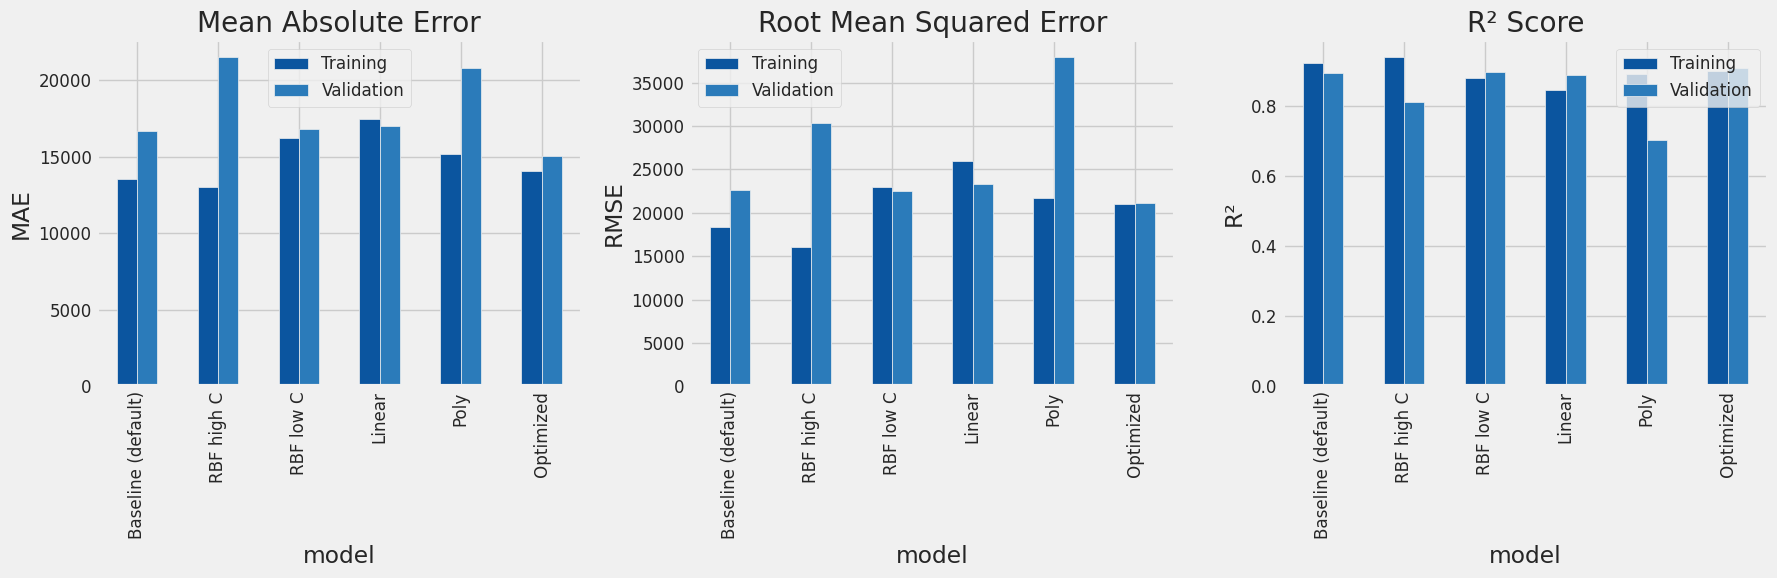

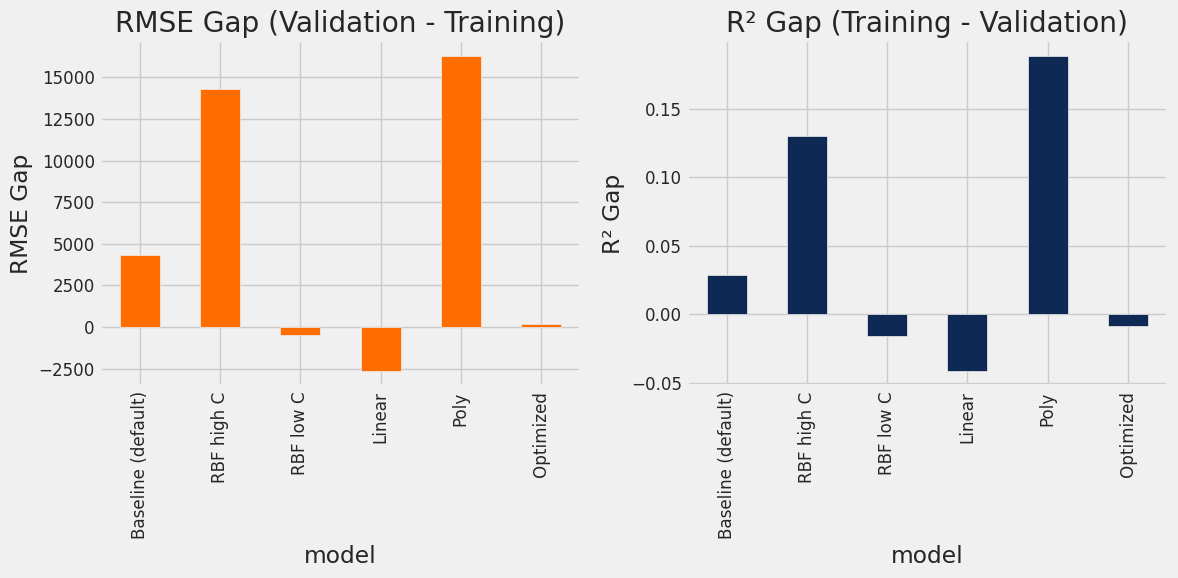


6. Cross-validation untuk stabilitas model...


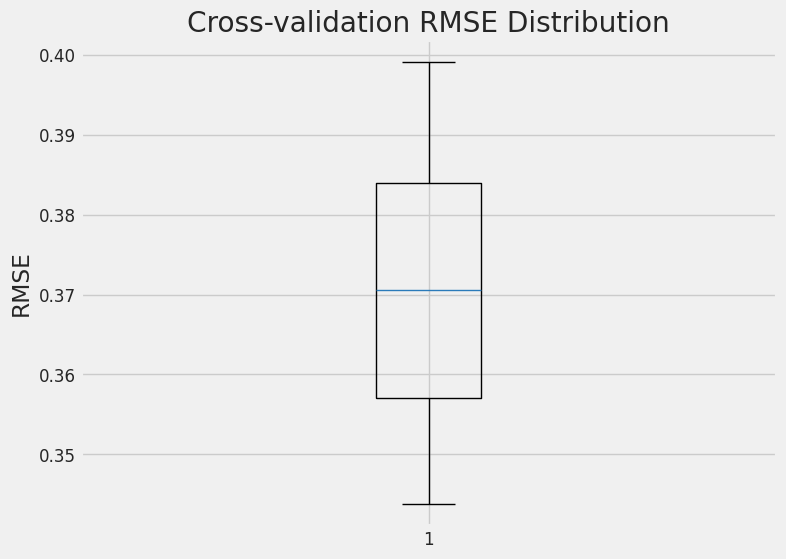

Cross-validation RMSE: 0.3714 (+/- nan)

7. Analisis pengaruh parameter...


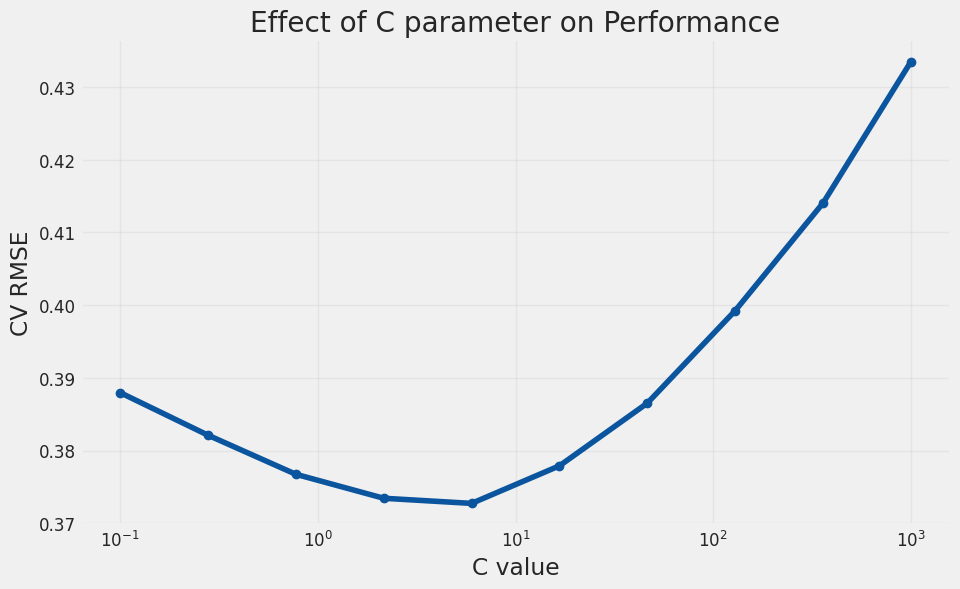


8. Membuat prediksi dengan model terbaik...

Prediksi dengan model optimal disimpan ke 'optimized_svr_submission.csv'

Parameter Optimal untuk SVR:
  C: 1
  epsilon: 0.05
  gamma: 0.02
  kernel: rbf


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def evaluate_svr_model(model, X_train, X_val, y_train, y_val, log_transform=True):
    """
    Evaluasi model SVR
    """
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Transform kembali ke skala asli
    if log_transform:
        y_train_original = np.expm1(y_train)
        y_train_pred_original = np.expm1(y_train_pred)
        y_val_original = np.expm1(y_val)
        y_val_pred_original = np.expm1(y_val_pred)
    else:
        y_train_original = y_train
        y_train_pred_original = y_train_pred
        y_val_original = y_val
        y_val_pred_original = y_val_pred

    # Hitung metrik
    metrics = {
        'train_mae': mean_absolute_error(y_train_original, y_train_pred_original),
        'train_rmse': np.sqrt(mean_squared_error(y_train_original, y_train_pred_original)),
        'train_r2': r2_score(y_train_original, y_train_pred_original),
        'val_mae': mean_absolute_error(y_val_original, y_val_pred_original),
        'val_rmse': np.sqrt(mean_squared_error(y_val_original, y_val_pred_original)),
        'val_r2': r2_score(y_val_original, y_val_pred_original)
    }

    return metrics

def plot_evaluation_results(results_df):
    """
    Visualisasi hasil evaluasi model
    """
    # Plot perbandingan metrik
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot MAE
    results_df[['train_mae', 'val_mae']].plot(kind='bar', ax=axes[0])
    axes[0].set_title('Mean Absolute Error')
    axes[0].set_ylabel('MAE')
    axes[0].legend(['Training', 'Validation'])

    # Plot RMSE
    results_df[['train_rmse', 'val_rmse']].plot(kind='bar', ax=axes[1])
    axes[1].set_title('Root Mean Squared Error')
    axes[1].set_ylabel('RMSE')
    axes[1].legend(['Training', 'Validation'])

    # Plot R²
    results_df[['train_r2', 'val_r2']].plot(kind='bar', ax=axes[2])
    axes[2].set_title('R² Score')
    axes[2].set_ylabel('R²')
    axes[2].legend(['Training', 'Validation'])

    plt.tight_layout()
    plt.savefig('svr_models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot gap analysis
    plt.figure(figsize=(12, 6))
    results_df['rmse_gap'] = results_df['val_rmse'] - results_df['train_rmse']
    results_df['r2_gap'] = results_df['train_r2'] - results_df['val_r2']

    plt.subplot(1, 2, 1)
    results_df['rmse_gap'].plot(kind='bar', color='#ff6d00')
    plt.title('RMSE Gap (Validation - Training)')
    plt.ylabel('RMSE Gap')

    plt.subplot(1, 2, 2)
    results_df['r2_gap'].plot(kind='bar', color='#0E2954')
    plt.title('R² Gap (Training - Validation)')
    plt.ylabel('R² Gap')

    plt.tight_layout()
    plt.savefig('svr_gap_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def tune_svr_hyperparameters(final_train, final_test, log_transform=True):
    """
    Tuning hyperparameter untuk SVR
    """
    print("=== SVR Hyperparameter Tuning ===")

    # Persiapkan data
    if 'Id' in final_train.columns:
        X = final_train.drop(['Id', 'SalePrice'], axis=1)
    else:
        X = final_train.drop(['SalePrice'], axis=1)

    y = final_train['SalePrice']

    # Log transform
    if log_transform:
        y_transformed = np.log1p(y)
    else:
        y_transformed = y

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Standarisasi fitur
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # 1. Model baseline (parameter default)
    print("\n1. Evaluasi Model Baseline (default parameters)...")
    baseline_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    baseline_model.fit(X_train_scaled, y_train)
    baseline_metrics = evaluate_svr_model(baseline_model, X_train_scaled, X_val_scaled, y_train, y_val, log_transform)

    # 2. Grid Search untuk parameter terbaik
    print("\n2. Grid Search untuk parameter optimal...")

    param_grid = {
        'kernel': ['rbf', 'linear', 'poly'],
        'C': [0.1, 1, 10, 100, 1000],
        'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }

    # Untuk mempercepat, kita bisa gunakan RandomizedSearchCV
    random_search = RandomizedSearchCV(
        SVR(),
        param_distributions=param_grid,
        n_iter=50,  # Jumlah kombinasi yang dicoba
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train_scaled, y_train)

    print(f"\nParameter terbaik dari RandomizedSearchCV: {random_search.best_params_}")
    print(f"Best CV score: {-random_search.best_score_:.4f}")

    # 3. Grid Search lebih detail di sekitar parameter terbaik
    print("\n3. Fine-tuning dengan Grid Search...")

    best_params = random_search.best_params_

    # Buat grid yang lebih detail di sekitar parameter terbaik
    fine_param_grid = {
        'kernel': [best_params['kernel']],
        'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
        'epsilon': [best_params['epsilon'] * 0.5, best_params['epsilon'], best_params['epsilon'] * 2],
        'gamma': [best_params['gamma']] if isinstance(best_params['gamma'], str) else
                 [best_params['gamma'] * 0.5, best_params['gamma'], best_params['gamma'] * 2]
    }

    grid_search = GridSearchCV(
        SVR(),
        param_grid=fine_param_grid,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"\nParameter terbaik dari Grid Search: {grid_search.best_params_}")
    print(f"Best CV score: {-grid_search.best_score_:.4f}")

    # 4. Evaluasi model dengan parameter terbaik
    print("\n4. Evaluasi model dengan parameter optimal...")
    best_model = grid_search.best_estimator_
    best_metrics = evaluate_svr_model(best_model, X_train_scaled, X_val_scaled, y_train, y_val, log_transform)

    # 5. Buat beberapa variasi model untuk perbandingan
    print("\n5. Evaluasi berbagai konfigurasi model...")

    models = {
        'Baseline (default)': SVR(kernel='rbf', C=1.0, epsilon=0.1),
        'RBF high C': SVR(kernel='rbf', C=100.0, epsilon=0.1),
        'RBF low C': SVR(kernel='rbf', C=0.1, epsilon=0.1),
        'Linear': SVR(kernel='linear', C=1.0, epsilon=0.1),
        'Poly': SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1),
        'Optimized': best_model
    }

    results = []

    for name, model in models.items():
        if name != 'Optimized':  # Model optimized sudah dilatih
            model.fit(X_train_scaled, y_train)

        metrics = evaluate_svr_model(model, X_train_scaled, X_val_scaled, y_train, y_val, log_transform)
        metrics['model'] = name
        results.append(metrics)

    results_df = pd.DataFrame(results).set_index('model')

    # Tampilkan hasil
    print("\nRingkasan Hasil Evaluasi:")
    print(results_df)

    # Plot hasil
    plot_evaluation_results(results_df)

    # 6. Cross-validation untuk model terbaik
    print("\n6. Cross-validation untuk stabilitas model...")
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')

    plt.figure(figsize=(8, 6))
    plt.boxplot(np.sqrt(-cv_scores))
    plt.title('Cross-validation RMSE Distribution')
    plt.ylabel('RMSE')
    plt.savefig('svr_cv_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Cross-validation RMSE: {np.sqrt(-cv_scores.mean()):.4f} (+/- {np.sqrt(-cv_scores.std() * 2):.4f})")

    # 7. Analisis parameter influence
    if best_params['kernel'] == 'rbf':
        print("\n7. Analisis pengaruh parameter...")

        # Pengaruh C
        C_values = np.logspace(-1, 3, 10)
        c_scores = []

        for C in C_values:
            model = SVR(kernel='rbf', C=C, epsilon=best_params['epsilon'], gamma=best_params['gamma'])
            scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_root_mean_squared_error')
            c_scores.append(np.sqrt(-scores.mean()))

        plt.figure(figsize=(10, 6))
        plt.semilogx(C_values, c_scores, 'o-')
        plt.xlabel('C value')
        plt.ylabel('CV RMSE')
        plt.title('Effect of C parameter on Performance')
        plt.grid(True, alpha=0.3)
        plt.savefig('svr_c_parameter_effect.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 8. Prediksi dengan model terbaik
    print("\n8. Membuat prediksi dengan model terbaik...")

    # Latih ulang dengan seluruh data
    X_scaled = scaler.fit_transform(X)
    best_model.fit(X_scaled, y_transformed)

    # Prediksi data test
    if 'Id' in final_test.columns:
        test_features = final_test.drop(['Id'], axis=1)
        test_ids = final_test['Id']
    else:
        test_features = final_test
        test_ids = range(len(final_test))

    test_features_scaled = scaler.transform(test_features)
    test_predictions = best_model.predict(test_features_scaled)

    if log_transform:
        test_predictions = np.expm1(test_predictions)

    submission = pd.DataFrame({
        'Id': test_ids,
        'SalePrice': test_predictions
    })

    return best_model, results_df, submission, grid_search.best_params_

# Jalankan tuning hyperparameter
best_svr_model, results_comparison, submission, best_params = tune_svr_hyperparameters(final_df_train, final_df_test)

# Simpan hasil
submission.to_csv('optimized_svr_submission.csv', index=False)
print("\nPrediksi dengan model optimal disimpan ke 'optimized_svr_submission.csv'")

# Tampilkan parameter terbaik
print("\nParameter Optimal untuk SVR:")
for param, value in best_params.items():
    print(f"  {param}: {value}")